# Описание данных (продажи автомобилей в Казахстане 2019 год)

`Год` – год продажи (2019)  
`Месяц` – месяц продажи (январь - сентябрь)  
`Компания` – название автоцентра  
`Бренд` – название продаваемой марки автомобиля  
`Модель` – название модели автомобиля  
`Модификация` – модификация модели автомобиля    
`Год выпуска` – год производства автомобиля  
`Страна-производитель` – страна, где произведен автомобиль  
`Вид топлива` – бензин, дизель, электричество, гибрид  
`Объём двигателя` – объем двигателя автомобиля в литрах   
`Коробка передач` – тип коробки переключения передач (оставляем два варианта: автоматическая, механическая, то есть все что не механика ставим автомат, на DSG, S-Tronic и прочее делить не надо, равно как и количество передач)  
`Тип привода` – в итоге оставляем RWD – задний привод, FWD – передний привод, 4WD – полный привод, 2WD – все остальное (подключаемый полный привод и где нет четкого указания передний или задний это привод)  
`Сегмент` – сегмент, к которому относится авто  
`Регион` – регион продажи  
`Наименование дилерского центра` – совпадает с компанией 
`Тип клиента` – юридическое или физическое лицо 
`Форма расчета` – наличный и безналичный расчет
`Количество` – количество автомобилей в заказе  
`Цена USD` – цена автомобиля  
`Продажа USD` – цена заказа (цена авто умноженная на количество и за вычетом скидок если есть)  
`Область` – область продажи  
`Сегментация 2013` – сегмент автомобиля актуальный  
`Класс 2013` – класс автомобиля актуальный  
`Сегментация Eng` – английская сегментация  
`Локализация производства` – совпадает со страной производителем 

Признаки-категории:  
- `сегмент`  
- `класс`  
- `тип привода`     
- `коробка передач`   

**Задачи:**
Предобработка данных;  
Исследовательский анализ данных;  
Анализ рынка автомобилей Казахстана;  
Анализ позиции Меркур Авто.  

**Задания для работы:**   
**Анализ рынка (делим на коммерческий и некоммерческий транспорт):**  

Емкость рынка автомобилей: в денежном и количественном выражении;   
Марки лидеры на рынке автомобилей;  
Динамика рынка: общая, по сегментам;  
Продажи автомобилей в разрезе бренд / сегмент;   
Продажи по маркам;  
Продажи по регионам;  
Проверить гипотезу: средняя цена автомобиля зависит от уровня развития региона (средней заработной платы по региону);  
Продажи автоцентров.  

**Анализ положения Меркур Авто:**  
Посмотрим положение Меркур Авто по отношению к конкурентам  
Анализ внутреннего положения компании Меркур Авто на протяжении 2019 года  
Вывод по анализу положения Меркур Авто на автомобильном рынке Казахстана 

**Общий вывод по проекту Анализ рынка автомобилей в Казахстане**

# Анализ продаж автомобилей в Казахстане

# Предобработка данных:

**Импортируем необходимые библиотеки, настроим необходимые параметры для корректного отображения датафрейма и визуализаций. Прочитаем данные из csv-файла в датафрейм и сохраним в переменную `df`.**

In [1]:
import pandas as pd               # Импортируем библиотеку pandas
import numpy as np                # Импортируем библиотеку numpy
import matplotlib.pyplot as plt   # Импортирую библиотеку визуализации
import seaborn as sns             # Импортирую библиотеку визуализации
import statistics as st           # Импортирую модуль statistics
import re                         # Импортирую модуль для работы с текстом (регулярные выражения)
import missingno as mi            # Импортируем модуль для визуализации пропусков
import requests
import warnings
warnings.simplefilter('ignore')   # Избавимся от навязчивых сообщений об ошибках
from datetime import datetime     # Импортирую модуль для работы с датой и временем
%config IPCompleter.greedy=True

# расширим ширину отображения вывода
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# установим один стиль для всех визуализаций в проекте
plt.style.use('ggplot') 
sns.set_theme(font='Arial', font_scale=1.0)  # установка шрифта и масштаба шрифта

df = pd.read_csv("auto_kz_2019_датасет.csv", sep=';', decimal=',') # прочитаем csv-файл
df.head(5)

Год   Месяц     Компания Бренд Модель Модификация Год выпуска  \
0  2019     Май  Mercur Auto  Audi     A3        TFSI        2018   
1  2019  Август  Mercur Auto  Audi     A3        TFSI        2018   
2  2019  Апрель  Mercur Auto  Audi     A4        TFSI        2018   
3  2019    Июль  Mercur Auto  Audi     A4        TFSI        2018   
4  2019    Июль  Mercur Auto  Audi     A4        TFSI        2018   

  Страна-производитель Вид топлива Объём двиг, л, Коробка передач Тип привода  \
0             Германия      Бензин            1,4        S-tronic    передний   
1             Германия      Бензин            1,4        S-tronic    передний   
2             Германия      Бензин            1,4        S-Tronic         FWD   
3             Германия      Бензин            1,4        S-tronic    передний   
4             Германия      Бензин            1,4        S-tronic    передний   

                       Сегмент  Регион Наименование дилерского центра  \
0  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   
1  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   
2  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   
3  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   
4  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   

  Тип клиента Форма расчета  Количество  Цена, USD  Продажа, USD   Область  \
0   Физ. Лицо   безналичный        1.00   28115.00      28115.00  г.Алматы   
1    Юр. Лицо      наличный        1.00   32246.99      32246.99  г.Алматы   
2   Физ. Лицо   безналичный        1.00   32000.00      32000.00  г.Алматы   
3    Юр. Лицо   безналичный        1.00   31929.00      31929.00  г.Алматы   
4   Физ. Лицо      наличный        1.00   31929.00      31929.00  г.Алматы   

      Сегментация 2013 Класс 2013 Сегментация Eng Локализация производства  
0  Легковые автомобили    C класс               C                   Импорт  
1  Легковые автомобили    C класс               C                   Импорт  
2  Легковые автомобили    D класс               D                   Импорт  
3  Легковые автомобили    D класс               D                   Импорт  
4  Легковые автомобили    D класс               D                   Импорт

Меняем названия столбцов на английский и приведем к snake_case

In [2]:
columns_start = df.columns.tolist()

columns_end = ['year', 'month', 'company', 'brand', 'model', 'modification', 'release_year',
               'manufacturing_country', 'fuel_type', 'engine_volume', 'transmission_type',
               'drive_type', 'segment', 'region', 'dealer', 'client_type', 'payment_type',
         'quantity', 'price_usd', 'sell_price_usd', 'state', 'segment_2013', 'class_2013',
               'segment_eng', 'product_localization']

change_col_dict = {k:v for k, v in zip(columns_start, columns_end)}

df = df.rename(columns=change_col_dict)
df.head(5)

year   month      company brand model modification release_year  \
0  2019     Май  Mercur Auto  Audi    A3         TFSI         2018   
1  2019  Август  Mercur Auto  Audi    A3         TFSI         2018   
2  2019  Апрель  Mercur Auto  Audi    A4         TFSI         2018   
3  2019    Июль  Mercur Auto  Audi    A4         TFSI         2018   
4  2019    Июль  Mercur Auto  Audi    A4         TFSI         2018   

  manufacturing_country fuel_type engine_volume transmission_type drive_type  \
0              Германия    Бензин           1,4          S-tronic   передний   
1              Германия    Бензин           1,4          S-tronic   передний   
2              Германия    Бензин           1,4          S-Tronic        FWD   
3              Германия    Бензин           1,4          S-tronic   передний   
4              Германия    Бензин           1,4          S-tronic   передний   

                       segment  region              dealer client_type  \
0  Легковые автомобили Premium  Алматы  Mercur Auto Алматы   Физ. Лицо   
1  Легковые автомобили Premium  Алматы  Mercur Auto Алматы    Юр. Лицо   
2  Легковые автомобили Premium  Алматы  Mercur Auto Алматы   Физ. Лицо   
3  Легковые автомобили Premium  Алматы  Mercur Auto Алматы    Юр. Лицо   
4  Легковые автомобили Premium  Алматы  Mercur Auto Алматы   Физ. Лицо   

  payment_type  quantity  price_usd  sell_price_usd     state  \
0  безналичный      1.00   28115.00        28115.00  г.Алматы   
1     наличный      1.00   32246.99        32246.99  г.Алматы   
2  безналичный      1.00   32000.00        32000.00  г.Алматы   
3  безналичный      1.00   31929.00        31929.00  г.Алматы   
4     наличный      1.00   31929.00        31929.00  г.Алматы   

          segment_2013 class_2013 segment_eng product_localization  
0  Легковые автомобили    C класс           C               Импорт  
1  Легковые автомобили    C класс           C               Импорт  
2  Легковые автомобили    D класс           D               Импорт  
3  Легковые автомобили    D класс           D               Импорт  
4  Легковые автомобили    D класс           D               Импорт

**Выведем количество пропущенных значений для каждого столбца.**

In [3]:
df.isna().mean() # посмотрим долю пропусков

year                    0.00
month                   0.00
company                 0.00
brand                   0.00
model                   0.00
modification            0.09
release_year            0.01
manufacturing_country   0.00
fuel_type               0.08
engine_volume           0.11
transmission_type       0.08
drive_type              0.11
segment                 0.17
region                  0.00
dealer                  0.00
client_type             0.18
payment_type            0.65
quantity                0.00
price_usd               0.00
sell_price_usd          0.00
state                   0.00
segment_2013            0.00
class_2013              0.00
segment_eng             0.00
product_localization    0.00
dtype: float64

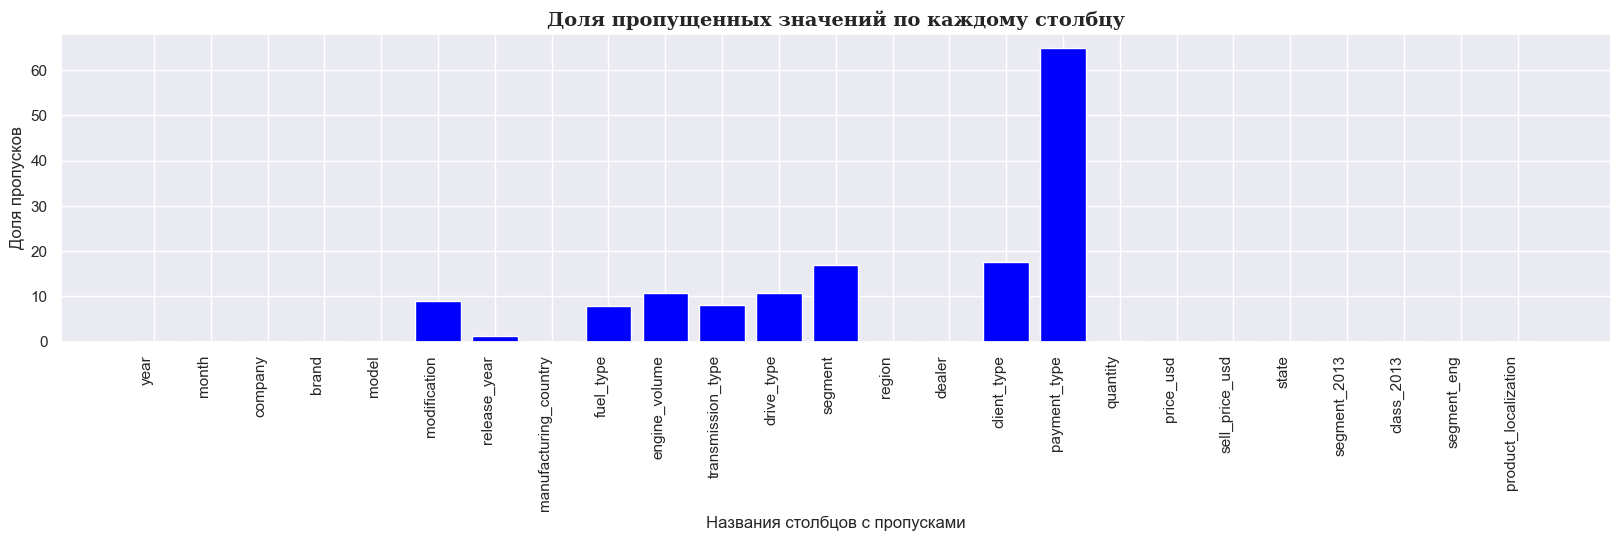

In [4]:
# напишем функцию для визуализации процента пропущенных значений
def visualize_missing_values(df):
    missing_percentage = df.isnull().mean() * 100
    plt.figure(figsize=(20, 4))
    plt.bar(missing_percentage.index, missing_percentage, color='blue')
    plt.title('Доля пропущенных значений по каждому столбцу', fontdict={'weight': 'bold', 'size': 14, 'family': 'serif'})
    plt.xticks(rotation=90, ha='right')
    plt.ylabel('Доля пропусков')
    plt.xlabel('Названия столбцов с пропусками')
    plt.show()

visualize_missing_values(df)

In [5]:
df.isna().sum()

year                         0
month                        0
company                      0
brand                        0
model                        0
modification              3591
release_year               501
manufacturing_country        0
fuel_type                 3140
engine_volume             4258
transmission_type         3255
drive_type                4289
segment                   6761
region                       0
dealer                       0
client_type               7047
payment_type             25928
quantity                     6
price_usd                    0
sell_price_usd               0
state                        0
segment_2013                 0
class_2013                   0
segment_eng                  0
product_localization         0
dtype: int64

**Видим, что в нашем датасете присутствуют большое количество пропусков: `payment_type`, `client_type` и `segment`**

Посмотрим тип данных в столбцах

In [6]:
df.dtypes

year                       int64
month                     object
company                   object
brand                     object
model                     object
modification              object
release_year              object
manufacturing_country     object
fuel_type                 object
engine_volume             object
transmission_type         object
drive_type                object
segment                   object
region                    object
dealer                    object
client_type               object
payment_type              object
quantity                 float64
price_usd                float64
sell_price_usd           float64
state                     object
segment_2013              object
class_2013                object
segment_eng               object
product_localization      object
dtype: object

**Из таблицы видно, что тип данных в столбцax `release_year`, `engine_volume`, `quantity`, `price_usd`, `sell_price_usd` отражен некорректно**

**Посмотрим уникальные значения по столбцам**

In [7]:
# получим уникальные значения для каждого столбца DataFrame
unique_values_per_column = {column: df[column].unique() for column in df}
unique_values_per_column

{'year': array([2019], dtype=int64),
 'month': array(['Май', 'Август', 'Апрель', 'Июль', 'Февраль', 'Июнь', 'Сентябрь',
        'Январь', 'Март'], dtype=object),
 'company': array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
        'Eurasia Motor Premium', 'Daewoo Bus Kazakhstan', 'Caspian Motors',
        'Каспиан Моторс', 'СемАЗ', 'Astana Motors', 'Astana Motors ',
        'Hyundai Com Trans Kazakhstan ', 'Nissan Manufacturing RUS',
        'СВС-ТРАНС', 'Allur Auto', 'Almaty Motors Premium', 'TERRA MOTORS',
        'ТК КАМАЗ', 'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
        'MAN Truck & Bus Kazakhstan', 'Автомир ГК', 'Autokapital',
        'Автокапитал', 'ММС Рус', 'MMC RUS', 'Mercur Autos',
        'УзАвто-Казахстан', 'Равон Моторс Казахстан',
        'Ravon Motors Kazakstan', 'Renault Россия', 'Scania Central Asia',
        'Subaru Kazakhstan', 'Volkswagen Group Rus', 'Автодом Motors KST',
        'Автомир-Центр', 'ТОО "Eurasia Motor Zhaik"',
        'Scandin

In [8]:
# присутствуют скрытые пробелы '\xa0' приведем их к корректному виду
df['release_year'] = df['release_year'].str.replace('\xa0', '', regex=True)
# исправим тип данных столбцов на соответствующий
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')
df["release_year"] = df["release_year"].dt.to_period("Y")

# исправим тип данных столбцов на соответствующий
df['quantity'] = df['quantity'].astype('Int8')

**Заполнять пропуски в столбце `release_year` не будем, так как нет возможности выяснить год выпуска для данных моделей брендов**

In [9]:
df.head(5)

year   month      company brand model modification release_year  \
0  2019     Май  Mercur Auto  Audi    A3         TFSI         2018   
1  2019  Август  Mercur Auto  Audi    A3         TFSI         2018   
2  2019  Апрель  Mercur Auto  Audi    A4         TFSI         2018   
3  2019    Июль  Mercur Auto  Audi    A4         TFSI         2018   
4  2019    Июль  Mercur Auto  Audi    A4         TFSI         2018   

  manufacturing_country fuel_type engine_volume transmission_type drive_type  \
0              Германия    Бензин           1,4          S-tronic   передний   
1              Германия    Бензин           1,4          S-tronic   передний   
2              Германия    Бензин           1,4          S-Tronic        FWD   
3              Германия    Бензин           1,4          S-tronic   передний   
4              Германия    Бензин           1,4          S-tronic   передний   

                       segment  region              dealer client_type  \
0  Легковые автомобили Premium  Алматы  Mercur Auto Алматы   Физ. Лицо   
1  Легковые автомобили Premium  Алматы  Mercur Auto Алматы    Юр. Лицо   
2  Легковые автомобили Premium  Алматы  Mercur Auto Алматы   Физ. Лицо   
3  Легковые автомобили Premium  Алматы  Mercur Auto Алматы    Юр. Лицо   
4  Легковые автомобили Premium  Алматы  Mercur Auto Алматы   Физ. Лицо   

  payment_type  quantity  price_usd  sell_price_usd     state  \
0  безналичный         1   28115.00        28115.00  г.Алматы   
1     наличный         1   32246.99        32246.99  г.Алматы   
2  безналичный         1   32000.00        32000.00  г.Алматы   
3  безналичный         1   31929.00        31929.00  г.Алматы   
4     наличный         1   31929.00        31929.00  г.Алматы   

          segment_2013 class_2013 segment_eng product_localization  
0  Легковые автомобили    C класс           C               Импорт  
1  Легковые автомобили    C класс           C               Импорт  
2  Легковые автомобили    D класс           D               Импорт  
3  Легковые автомобили    D класс           D               Импорт  
4  Легковые автомобили    D класс           D               Импорт

In [10]:
# преобразование столбцов 'year' и 'month' в столбец 'sale_date'
change_dict = {'январь':1, 'февраль':2, 'март':3, 'апрель':4, 'май':5, 'июнь':6, 'июль':7, 'август':8, 'сентябрь':9}
df.month = df.month.str.lower()
df.month = df.month.map(change_dict)
df['sale_date'] = df.year.astype('str') + '-' + df.month.astype('str')

# преобразум столбец 'sale_date' в тип datetime, применим метод strftime для форматирования даты
df['sale_date'] = pd.to_datetime(df['sale_date']).dt.strftime("%Y-%m")

In [11]:
# присутствуют лишние пробелы в конце значений в столбцах компания, вид топлива и модель, приведем их к корректному виду
col = ['company', 'model', 'fuel_type']
for column in col:
    df[column] = df[column].str.rstrip()

In [12]:
# создадим словарь для замены значений с транскрипцией на разных языках и замены названий одних и тех компаний, написанных
# с орфографическими ошибками на корректные названия
replacement_dict = {
    "Mercur Autos": "Mercur Auto",
    "MMC RUS": "ММС Рус",
    "Autokapital": "Автокапитал",
    "Ravon Motors Kazakstan": "Равон Моторс Казахстан",
    "Caspian Motors": "Каспиан Моторс",
    "Хино Моторс Казахстан": "Hino Motors"
}

# применяем словарь для замены значений в столбце компания
df['company'] = df['company'].replace(replacement_dict)

**Посмотрим какие виды топлива присутствуют в нашем датасете**

Посмотрим какие модели в нашем датасете имеют тип топлива равный `0`.

In [13]:
df.query('fuel_type == "0"')

year  month     company brand model modification release_year  \
37121  2019      1  БИПЭК АВТО   UAZ  3741         3741         2018   
37122  2019      1  БИПЭК АВТО   UAZ  3741         3741         2018   
37123  2019      1  БИПЭК АВТО   UAZ  3741         3741         2018   

      manufacturing_country fuel_type engine_volume transmission_type  \
37121  Республика Казахстан         0         2,693              5 МТ   
37122  Республика Казахстан         0         2,693              5 МТ   
37123  Республика Казахстан         0         2,693              5 МТ   

      drive_type                segment       region                  dealer  \
37121     Полный  Развозные автомобили   Талдыкорган  БИПЭК АВТО Талдыкорган   
37122     Полный  Развозные автомобили        Актобе       БИПЭК АВТО Актобе   
37123     Полный  Развозные автомобили         Актау        БИПЭК АВТО Актау   

      client_type payment_type  quantity  price_usd  sell_price_usd  \
37121         NaN          NaN         1   14200.00        14200.00   
37122         NaN          NaN         3   14200.00        42600.00   
37123         NaN          NaN         2   14200.00        28400.00   

                       state             segment_2013  \
37121    Алматинская область  Коммерческие автомобили   
37122    Актюбинская область  Коммерческие автомобили   
37123  Мангистауская область  Коммерческие автомобили   

                    class_2013 segment_eng    product_localization sale_date  
37121  Малотоннажные грузовики           N  Локальное производство   2019-01  
37122  Малотоннажные грузовики           N  Локальное производство   2019-01  
37123  Малотоннажные грузовики           N  Локальное производство   2019-01

In [14]:
# посмотрим какой тип топлива встречается чаще всего для данной модели в нашем датасете
df.loc[df['model'] == '3741', ['model', 'fuel_type']].mode()

model fuel_type
0  3741    Бензин

In [15]:
# посмотрим какие типы топлива вообще встречается чаще всего для данной модели в нашем датасете
unique_fuel_types = df.loc[df['model'] == '3741', 'fuel_type'].unique()
print("Уникальные значения в столбце 'fuel_type':", unique_fuel_types)

Уникальные значения в столбце 'fuel_type': ['0' 'Бензин' nan]


In [16]:
# заменяем все значения '0' и nan на 'Бензин' для модели 3741
df.loc[((df['fuel_type'] == '0') | (df['fuel_type'].isnull())) & (df['model'] == '3741'), 'fuel_type'] = 'Бензин'

In [17]:
# приведем значения столбца 'fuel_type' к нижнему регистру, сохранив пустые значения без изменений
df['fuel_type'] = df['fuel_type'].apply(lambda x: x.lower() if isinstance(x, str) else x)

In [18]:
df['fuel_type'].unique()

array(['бензин', 'дизель', nan, 'гибрид', '2', '1,6', 'электро',
       'электричество'], dtype=object)

In [19]:
# заменяем все значения 'электричество' на 'электро'
df.loc[df['fuel_type'] == 'электричество', 'fuel_type'] = 'электро'

df['fuel_type'].unique()

array(['бензин', 'дизель', nan, 'гибрид', '2', '1,6', 'электро'],
      dtype=object)

Посмотрим какие модели в нашем датасете имеют тип топлива равный `1,6` и `2`.

In [20]:
df.query('fuel_type == "1,6" | fuel_type == "2"')

year  month         company    brand    model modification  \
23723  2019      1  Renault Россия  Renault   Duster      E2GB4AG   
23724  2019      1  Renault Россия  Renault   Duster     E2GB4AGA   
23725  2019      1  Renault Россия  Renault   Duster     E2GB4AGA   
23726  2019      1  Renault Россия  Renault   Duster     E2GB4AGA   
23727  2019      1  Renault Россия  Renault   Duster      E2GB4AG   
23728  2019      1  Renault Россия  Renault   Duster      E1FB4JA   
23729  2019      1  Renault Россия  Renault   Duster     E1FB4AGA   
23730  2019      1  Renault Россия  Renault   Duster     E1FB4AGA   
23731  2019      1  Renault Россия  Renault   Duster      E1FB4AG   
23732  2019      1  Renault Россия  Renault   Duster      E1FB4AG   
23733  2019      1  Renault Россия  Renault   Duster      E1FB2JA   
23734  2019      1  Renault Россия  Renault   Duster      E0DB2JA   
23735  2019      1  Renault Россия  Renault   Duster      E0DB2JA   
23736  2019      1  Renault Россия  Renault   Duster      E0DB2JA   
23746  2019      1  Renault Россия  Renault   Duster    E2PGB4AGA   
23747  2019      1  Renault Россия  Renault   Duster      E2GB4AG   
23748  2019      1  Renault Россия  Renault   Duster     E1FB4AGA   
23749  2019      1  Renault Россия  Renault   Duster     E1FB4AGA   
23750  2019      1  Renault Россия  Renault   Duster     E1FB4AGA   
23751  2019      1  Renault Россия  Renault   Duster      E0DB2JA   
23752  2019      1  Renault Россия  Renault   Duster    E2PGB4AGA   
23753  2019      1  Renault Россия  Renault   Duster     E2GB4AGA   
23754  2019      1  Renault Россия  Renault   Duster      E1FB4JA   
23755  2019      1  Renault Россия  Renault   Duster      E1FB4AG   
23758  2019      1  Renault Россия  Renault   Duster    E2PGB4AGA   
23759  2019      1  Renault Россия  Renault   Duster     E2GB4AGA   
23760  2019      1  Renault Россия  Renault   Duster     E2GB4AGA   
23761  2019      1  Renault Россия  Renault   Duster     E2GB4AGA   
23762  2019      1  Renault Россия  Renault   Duster     E2GB4AGA   
23763  2019      1  Renault Россия  Renault   Duster      E1FB4JA   
23764  2019      1  Renault Россия  Renault   Duster      E1FB4JA   
23765  2019      1  Renault Россия  Renault   Duster      E1FB4AG   
24997  2019      1  Renault Россия  Renault  Sandero   SXP16PA5RB   
24998  2019      1  Renault Россия  Renault  Sandero    SXP16K5RB   
24999  2019      1  Renault Россия  Renault  Sandero    SXP16K5RB   
25002  2019      1  Renault Россия  Renault  Sandero   SUT16PA5RB   
25023  2019      1  Renault Россия  Renault  Sandero   SXP16PA5RB   

      release_year manufacturing_country fuel_type engine_volume  \
23723         2019  Российская Федерация         2            MT   
23724         2018  Российская Федерация         2            AT   
23725         2018  Российская Федерация         2            AT   
23726         2018  Российская Федерация         2            AT   
23727         2018  Российская Федерация         2            MT   
23728         2018  Российская Федерация       1,6            MT   
23729         2018  Российская Федерация         2            AT   
23730         2018  Российская Федерация         2            AT   
23731         2018  Российская Федерация         2            MT   
23732         2018  Российская Федерация         2            MT   
23733         2018  Российская Федерация       1,6            MT   
23734         2018  Российская Федерация       1,6            AT   
23735         2018  Российская Федерация       1,6            AT   
23736         2018  Российская Федерация       1,6            AT   
23746         2018  Российская Федерация         2            AT   
23747         2018  Российская Федерация         2            MT   
23748         2018  Российская Федерация         2            AT   
23749         2018  Российская Федерация         2            AT   
23750         2018  Российская Федерация         2            AT   
23751         2018  Росс

Из получившегося среза видно, что проблемы в нашем датасете только у бренда `Renault`, а точнее у моделей `Duster` и `Sandero`

Посмотрим срез с модификацией `E1FB4JA`

In [21]:
df.query('modification == "E1FB4JA"')

year  month         company    brand   model modification release_year  \
23728  2019      1  Renault Россия  Renault  Duster      E1FB4JA         2018   
23754  2019      1  Renault Россия  Renault  Duster      E1FB4JA         2018   
23763  2019      1  Renault Россия  Renault  Duster      E1FB4JA         2018   
23764  2019      1  Renault Россия  Renault  Duster      E1FB4JA         2018   
23843  2019      3  Renault Россия  Renault  Duster      E1FB4JA         2018   
24028  2019      5  Renault Россия  Renault  Duster      E1FB4JA         2018   
24149  2019      6  Renault Россия  Renault  Duster      E1FB4JA         2018   

      manufacturing_country fuel_type engine_volume transmission_type  \
23728  Российская Федерация       1,6            MT               4WD   
23754  Российская Федерация       1,6            MT               4WD   
23763  Российская Федерация       1,6            MT               4WD   
23764  Российская Федерация       1,6            MT               4WD   
23843  Российская Федерация       NaN           NaN               NaN   
24028  Российская Федерация       NaN           NaN               NaN   
24149  Российская Федерация    бензин           1,6                MT   

      drive_type     segment         region                   dealer  \
23728        4WD           0      Караганда  Кристалл Авто Караганда   
23754        4WD           0         Алматы        ASTER AUTO Алматы   
23763        4WD           0     Нур-Султан          Автоцентр Астэк   
23764        4WD           0  Петропавловск          Автоцентр Астэк   
23843        NaN         NaN      Караганда  Кристалл Авто Караганда   
24028        NaN  ASTER Auto         Алматы        ASTER AUTO Алматы   
24149        4WD         NaN        Шымкент       ASTER AUTO Шымкент   

      client_type payment_type  quantity  price_usd  sell_price_usd  \
23728         NaN          NaN         1   12249.61        12249.61   
23754         NaN          NaN         1   12249.61        12249.61   
23763         NaN          NaN         1   12249.61        12249.61   
23764         NaN          NaN         1   12249.61        12249.61   
23843   Физ. Лицо          NaN         1   12600.92        12600.92   
24028   Физ. Лицо          NaN         1   12534.21        12534.21   
24149   Физ. Лицо          NaN         1   12468.01        12468.01   

                              state  segment_2013         class_2013  \
23728        Карагандинская область  Внедорожники  Субкомпактные SUV   
23754                      г.Алматы  Внедорожники  Субкомпактные SUV   
23763                  г.Нур-Султан  Внедорожники  Субкомпактные SUV   
23764  Северо-Казахстанская область  Внедорожники  Субкомпактные SUV   
23843        Карагандинская область  Внедорожники  Субкомпактные SUV   
24028                      г.Алматы  Внедорожники  Субкомпактные SUV   
24149    Южно-Казахстанская область  Внедорожники  Субкомпактные SUV   

      segment_eng product_localization sale_date  
23728          K1               Импорт   2019-01  
23754          K1               Импорт   2019-01  
23763          K1               Импорт   2019-01  
23764          K1               Импорт   2019-01  
23843          K1               Импорт   2019-03  
24028          K1               Импорт   2019-05  
24149          K1               Импорт   2019-06

Из среза мы видим, что значения столбцов: `fuel_type`, `engine_volume`, `transmission_type`, `drive_type` некоторых строк  бренда `Renault` съехали вправо на одну ячейку.  
Cоздадим копию датасета со строками столбца `fuel_type` равными `1,6` и `2`, в котором подкорректируем значения столбцов: `fuel_type`, `engine_volume`, `transmission_type`, `drive_type`. Затем удалим строки столбца `fuel_type` равные `1,6` и `2` и заменим их на копию скорректированнного датасета.

In [22]:
# создадим копию датасета, в котором тип топлива равен 1,6 и 2.
df_copy = df.query('fuel_type == "1,6" | fuel_type == "2"')

display(f"Размер исходного датасета составляет {df.shape[0]} строк и {df.shape[1]} столбцов ")

# переименуем съехавшие столбцы
df_copy = df_copy.rename(columns={'fuel_type': 'engine_volume',
                        'engine_volume': 'transmission_type',
                        'transmission_type': 'drive_type_del'})

# удалим образовавшийся лишний столбец 'drive_type_del'
del df_copy['drive_type_del']

# добавляем недостающий столбец и заполним его пропусками
df_copy.insert(8, "fuel_type", np.NaN)

df_copy.head(5)

'Размер исходного датасета составляет 39966 строк и 26 столбцов '

year  month         company    brand   model modification release_year  \
23723  2019      1  Renault Россия  Renault  Duster      E2GB4AG         2019   
23724  2019      1  Renault Россия  Renault  Duster     E2GB4AGA         2018   
23725  2019      1  Renault Россия  Renault  Duster     E2GB4AGA         2018   
23726  2019      1  Renault Россия  Renault  Duster     E2GB4AGA         2018   
23727  2019      1  Renault Россия  Renault  Duster      E2GB4AG         2018   

      manufacturing_country  fuel_type engine_volume transmission_type  \
23723  Российская Федерация        NaN             2                MT   
23724  Российская Федерация        NaN             2                AT   
23725  Российская Федерация        NaN             2                AT   
23726  Российская Федерация        NaN             2                AT   
23727  Российская Федерация        NaN             2                MT   

      drive_type segment      region                   dealer client_type  \
23723        4WD       0     Уральск           Урал-Кров Авто         NaN   
23724        4WD       0  Нур-Султан     Кристалл Авто Астана         NaN   
23725        4WD       0  Нур-Султан     Кристалл Авто Астана         NaN   
23726        4WD       0   Кызылорда  Кристалл Авто Кызылорда         NaN   
23727        4WD       0   Караганда  Кристалл Авто Караганда         NaN   

      payment_type  quantity  price_usd  sell_price_usd  \
23723          NaN         1   12249.61        12249.61   
23724          NaN         1   12249.61        12249.61   
23725          NaN         1   12249.61        12249.61   
23726          NaN         1   12249.61        12249.61   
23727          NaN         1   12249.61        12249.61   

                               state  segment_2013         class_2013  \
23723  Западно-Казахстанская область  Внедорожники  Субкомпактные SUV   
23724                   г.Нур-Султан  Внедорожники  Субкомпактные SUV   
23725                   г.Нур-Султан  Внедорожники  Субкомпактные SUV   
23726         Кызылординская область  Внедорожники  Субкомпактные SUV   
23727         Карагандинская область  Внедорожники  Субкомпактные SUV   

      segment_eng product_localization sale_date  
23723          K1               Импорт   2019-01  
23724          K1               Импорт   2019-01  
23725          K1               Импорт   2019-01  
23726          K1               Импорт   2019-01  
23727          K1               Импорт   2019-01

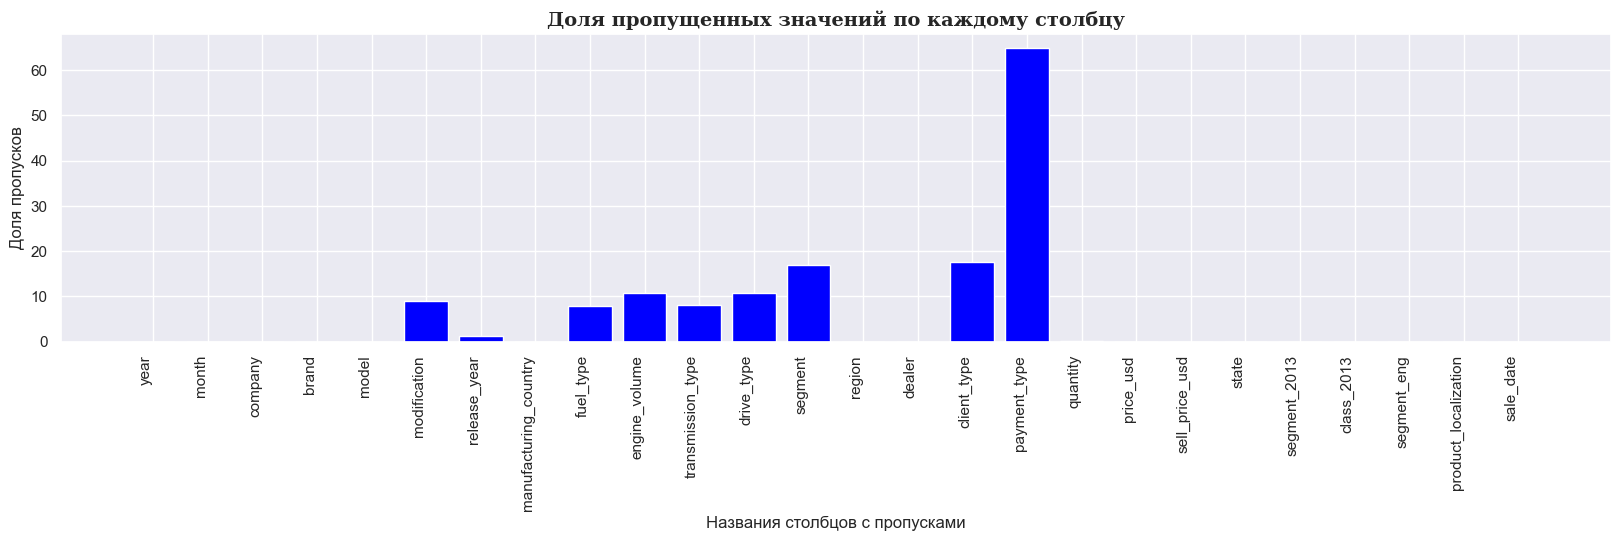

In [23]:
visualize_missing_values(df)

In [24]:
# удалим из столбца 'fuel_type' датасетa df некорректные значения '1,6' и '2'
df = df[(df['fuel_type'] != "1,6") & (df['fuel_type'] != "2")]

# добавим к исходному датасету скорректированный датасет
df = pd.concat([df, df_copy], sort=False, axis=0)
display(f"Размер датасета после обработки составляет {df.shape[0]} строк и {df.shape[1]} столбцов ")

'Размер датасета после обработки составляет 39966 строк и 26 столбцов '

Нам удалось не потерять ни одной стоки и ни одного столбца данных из исходного датасета.

In [25]:
df['fuel_type'].unique()

array(['бензин', 'дизель', nan, 'гибрид', 'электро'], dtype=object)

In [26]:
df.fuel_type.isna().sum()

3143

In [27]:
# посмотрим на топ-10 пропусков по столбцу fuel_type
df[df.fuel_type.isna()].model.value_counts().nlargest(10)

model
Duster      682
Sandero     440
S3          379
Logan       320
Kaptur      230
S5          158
3302        127
HFF6850G     73
Next         71
Arkana       55
Name: count, dtype: int64

Видим, что больше всего пропусков приходится на бренд Рено. В общей сложности в диапазоне 2500 пропусков

In [28]:
# посмотрим на наиболее часто встречающиеся типы топлива по моделям
fuel_type_nans = df[df.fuel_type.isna()].model.value_counts().nlargest(10).reset_index()['model'].tolist()
df[df.model.isin(fuel_type_nans)].groupby('model')['fuel_type'].value_counts()

model     fuel_type
3302      бензин       870
          дизель         1
Duster    бензин        25
HFF6850G  дизель       167
Next      бензин       303
          дизель        43
S3        бензин       907
S5        бензин       285
          дизель         4
Sandero   бензин         1
Name: count, dtype: int64

Заполним пропуски модой там, где это возможно

In [29]:
df['fuel_type'] = df.groupby('model')['fuel_type'].transform(lambda x: x.fillna(st.mode(x)))

In [30]:
df.fuel_type.isna().sum()

2138

Отавшиеся пропуски заполним заглушкой `unknown`

In [31]:
df['fuel_type'] = df['fuel_type'].fillna('unknown')

**Посмотрим, как у нас обстоят дела с объёмом двигателя**

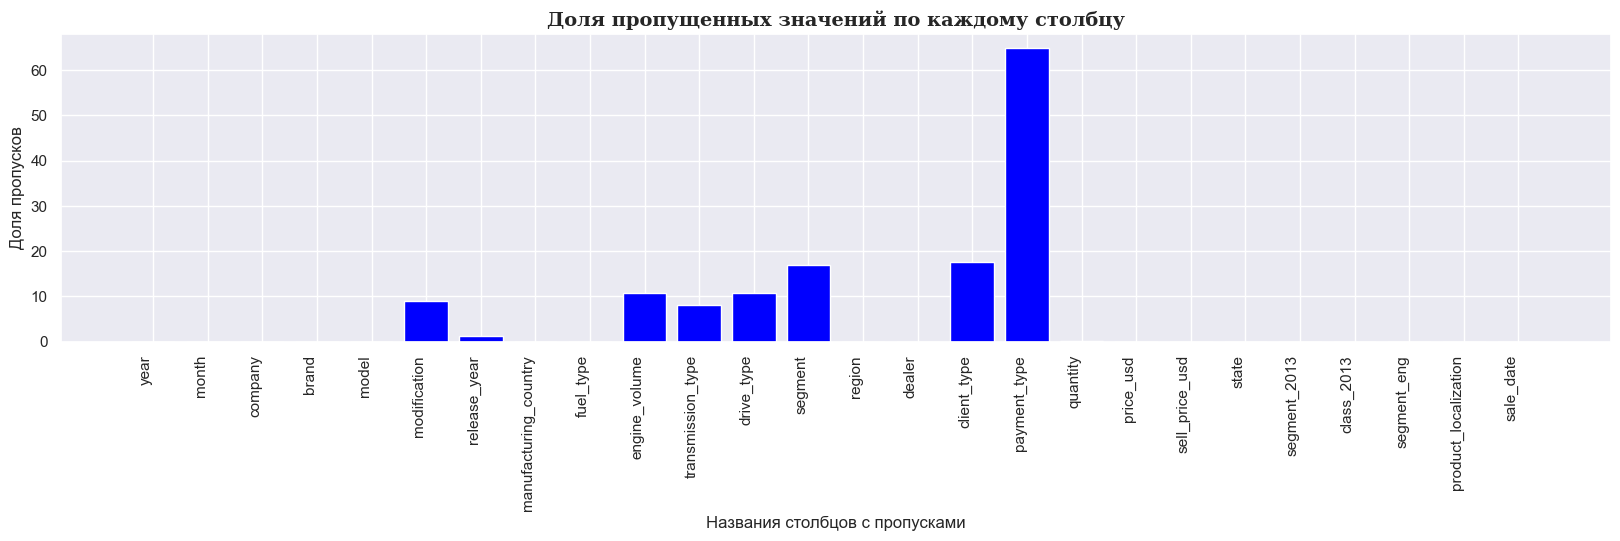

In [32]:
visualize_missing_values(df)

In [33]:
df.engine_volume.unique()

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,596', '2,4', '1,7',
       '26,7', '25,7', '24,7', '23,7', '22,7', '21,7', '20,7', '19,7',
       '18,7', '17,7', '16,7', '15,7', '14,7', '13,7', '12,7', '11,7',
       '10,7', '9,7', '8,7', '7,7', '6,7', '5,7', '4,7', '3,7', '2,7',
       '6,2', '1,4 Turbo', '2,5', '1,6', nan, '2,8', '4,3', '4,3,',
       '1,6 MPI', '2,0 MPI', '2,4 GDI', '2,4 MPI', '2,5 CRDI VGT',
       '2,5 CRDI WGT', '3,9', '7,5', '12,3', '1,6 T-GDI', '2,0 CRDI',
       '2.0', '3,5', '5,6', '5,2', '3,0 L', '1.6', '1.5', '5', '1,598',
       '1,248', '1,998', '2,359', '1,999', '3,342', '1,591', '3,47',
       '1,69', '1,774', '2.5', '2.7 ', '3.5', '2.7', '4.6', '4,6', '5.7',
       '1,8', '10,5', '4', '5,5', '12', '12,8', '11', '2,2', '1,2',
       '1,485', '13', '1,33', '#Н/Д', '4.0', '2.4G', '2,4G', '2.8',
       '2,693', '2,0', '3,8', '3.8', '1,2T', '3,6', '7,6', '4,9', '2.0h',
       '2,9', '400 Л.С.', '4,98 L,', '4,98', '88 KWH', '8,4 L,', '6,7L',
       '6,5'], d

In [34]:
# посмотрим на автомобили, объем двигателя которых измеряется в киловаттах
df.query('engine_volume == "88 KWH"')

year  month     company  brand          model modification  \
39818  2019      7  Allur Auto  ANKAI  HFF6124G03EV3          Bus   
39819  2019      7  Allur Auto  ANKAI  HFF6124G03EV3          Bus   
39820  2019      7  Allur Auto  ANKAI  HFF6124G03EV3          Bus   
39821  2019      7  Allur Auto  ANKAI  HFF6124G03EV3          Bus   
39822  2019      7  Allur Auto  ANKAI  HFF6124G03EV3          Bus   
39823  2019      7  Allur Auto  ANKAI  HFF6124G03EV3          Bus   
39824  2019      7  Allur Auto  ANKAI  HFF6124G03EV3          Bus   
39825  2019      7  Allur Auto  ANKAI  HFF6124G03EV3          Bus   
39826  2019      7  Allur Auto  ANKAI  HFF6124G03EV3          Bus   
39827  2019      7  Allur Auto  ANKAI  HFF6124G03EV3          Bus   

      release_year manufacturing_country fuel_type engine_volume  \
39818         2019  Республика Казахстан   электро        88 KWH   
39819         2019  Республика Казахстан   электро        88 KWH   
39820         2019  Республика Казахстан   электро        88 KWH   
39821         2019  Республика Казахстан   электро        88 KWH   
39822         2019  Республика Казахстан   электро        88 KWH   
39823         2019  Республика Казахстан   электро        88 KWH   
39824         2019  Республика Казахстан   электро        88 KWH   
39825         2019  Республика Казахстан   электро        88 KWH   
39826         2019  Республика Казахстан   электро        88 KWH   
39827         2019  Республика Казахстан   электро        88 KWH   

      transmission_type drive_type  segment    region             dealer  \
39818               NaN        2WD  автобус  Костанай  Allur Auto Almaty   
39819               NaN        2WD  автобус  Костанай  Allur Auto Almaty   
39820               NaN        2WD  автобус  Костанай  Allur Auto Almaty   
39821               NaN        2WD  автобус  Костанай  Allur Auto Almaty   
39822               NaN        2WD  автобус  Костанай  Allur Auto Almaty   
39823               NaN        2WD  автобус  Костанай  Allur Auto Almaty   
39824               NaN        2WD  автобус  Костанай  Allur Auto Almaty   
39825               NaN        2WD  автобус  Костанай  Allur Auto Almaty   
39826               NaN        2WD  автобус  Костанай  Allur Auto Almaty   
39827               NaN        2WD  автобус  Костанай  Allur Auto Almaty   

      client_type payment_type  quantity  price_usd  sell_price_usd  \
39818    Юр. Лицо  безналичный         1  307986.36       307986.36   
39819    Юр. Лицо  безналичный         1  307986.36       307986.36   
39820    Юр. Лицо  безналичный         1  307986.36       307986.36   
39821    Юр. Лицо  безналичный         1  307986.36       307986.36   
39822    Юр. Лицо  безналичный         1  307986.36       307986.36   
39823    Юр. Лицо  безналичный         1  307986.36       307986.36   
39824    Юр. Лицо  безналичный         1  307986.36       307986.36   
39825    Юр. Лицо  безналичный         1  307986.36       307986.36   
39826    Юр. Лицо  безналичный         1  307986.36       307986.36   
39827    Юр. Лицо  безналичный         1  307986.36       307986.36   

                      state             segment_2013        class_2013  \
39818  Костанайская область  Коммерческие автомобили  Большие автобусы   
39819  Костанайская область  Коммерческие автомобили  Большие автобусы   
39820  Костанайская область  Коммерческие автомобили  Большие автобусы   
39821  Костанайская область  Коммерческие автомобили  Большие автобусы   
39822  Костанайская область  Коммерческие автомобили  Большие автобусы   
39823  Костанайская область  Коммерческие автомобили  Большие автобусы   
39824  Костанайская область  Коммерческие автомобили  Большие автобусы   
39825  Костанайская область  Коммерческие автомобили  Большие автобусы   
39826  Костанайская область  Коммерческие автомобили  Большие автобусы   
39827  Костанайская область  Коммерческие автомобили  Большие автобусы   

      segment_eng    product_localization sale_date  
39818     

Это электоробусы, поэтому в столбце `engine_volume` для них поставим заглушку `0`

In [35]:
df.loc[df.engine_volume == "88 KWH", 'engine_volume'] = 0

In [36]:
# посмотрим на авто, объем двигателя которого #Н/Д"
df.query('engine_volume == "#Н/Д"')

year  month                  company   brand     model modification  \
31148  2019      2  Toyota Motor Kazakhstan  Toyota   Corolla            7   
31149  2019      2  Toyota Motor Kazakhstan  Toyota   Corolla            7   
32670  2019      4  Toyota Motor Kazakhstan  Toyota  HILUX DC           JT   
33070  2019      7  Toyota Motor Kazakhstan  Toyota  HILUX DC           NX   

      release_year manufacturing_country fuel_type engine_volume  \
31148         2019                Турция    бензин          #Н/Д   
31149         2019                Турция    бензин          #Н/Д   
32670         2019               Таиланд    бензин          #Н/Д   
33070         2019               Таиланд    бензин          #Н/Д   

      transmission_type drive_type   segment      region               dealer  \
31148              #Н/Д       #Н/Д  C класс   Нур-Султан  Тойота Центр Астана   
31149              #Н/Д       #Н/Д  C класс   Нур-Султан  Тойота Центр Астана   
32670              #Н/Д       #Н/Д   Пикапы       Алматы          Toyota City   
33070              #Н/Д       #Н/Д   Пикапы       Атырау  Тойота Центр Атырау   

      client_type payment_type  quantity  price_usd  sell_price_usd  \
31148   Физ. Лицо          NaN         1   42316.46        42316.46   
31149   Физ. Лицо          NaN         1   42316.46        42316.46   
32670    Юр. Лицо          NaN         1   30870.28        30870.28   
33070   Физ. Лицо          NaN         1   27012.46        27012.46   

                    state         segment_2013 class_2013 segment_eng  \
31148        г.Нур-Султан  Легковые автомобили    C класс           C   
31149        г.Нур-Султан  Легковые автомобили    C класс           C   
32670            г.Алматы               Пикапы   Pick-ups          K4   
33070  Атырауская область               Пикапы   Pick-ups          K4   

      product_localization sale_date  
31148               Импорт   2019-02  
31149               Импорт   2019-02  
32670               Импорт   2019-04  
33070               Импорт   2019-07

Таких автомобилей всего 4, поэтому не будем заморачиваться с ними - удалим

In [37]:
df = df.query('engine_volume != "#Н/Д"')

In [38]:
# посмотрим на авто, объем двигателя которого '400 Л.С.'
df.query('engine_volume == "400 Л.С."')

year  month                company   brand   model modification  \
39544  2019      2  Almaty Motors Premium  Jaguar  I-Pace   ЭЛЕКТРОКАР   
39545  2019      4  Almaty Motors Premium  Jaguar  I-Pace   ЭЛЕКТРОКАР   
39546  2019      6  Almaty Motors Premium  Jaguar  I-Pace   ЭЛЕКТРОКАР   

      release_year manufacturing_country fuel_type engine_volume  \
39544         2019                    UK   электро      400 Л.С.   
39545         2019                    UK   электро      400 Л.С.   
39546         2019                    UK   электро      400 Л.С.   

      transmission_type drive_type segment  region                 dealer  \
39544          РЕДУКТОР        4WD    SUV   Алматы  Almaty Motors Premium   
39545          РЕДУКТОР        4WD    SUV   Алматы  Almaty Motors Premium   
39546          РЕДУКТОР        4WD    SUV   Алматы  Almaty Motors Premium   

      client_type payment_type  quantity  price_usd  sell_price_usd     state  \
39544   Физ. Лицо     наличный         1  117236.97       117236.97  г.Алматы   
39545   Физ. Лицо     наличный         1  105388.79       105388.79  г.Алматы   
39546    Юр. Лицо  безналичный         1  120413.28       120413.28  г.Алматы   

       segment_2013      class_2013 segment_eng product_localization sale_date  
39544  Внедорожники  Компактные SUV          K1               Импорт   2019-02  
39545  Внедорожники  Компактные SUV          K1               Импорт   2019-04  
39546  Внедорожники  Компактные SUV          K1               Импорт   2019-06

Немного погуглив информацию о данном авто выяснил - объем двигателя для него равен `2 литра`

In [39]:
df.loc[df.engine_volume == "400 Л.С.", 'engine_volume'] = 0

Итак с наиболее проблемными объёмами двигателей автомобилей разобрались.

In [40]:
# заменим разделитель-запятую на точку
df['engine_volume'] = df['engine_volume'].str.replace(',', '.', regex=True)

In [41]:
df.engine_volume.unique()

array(['1.4', '2', '3', '4.4', '6.6', '1.5', '1.596', '2.4', '1.7',
       '26.7', '25.7', '24.7', '23.7', '22.7', '21.7', '20.7', '19.7',
       '18.7', '17.7', '16.7', '15.7', '14.7', '13.7', '12.7', '11.7',
       '10.7', '9.7', '8.7', '7.7', '6.7', '5.7', '4.7', '3.7', '2.7',
       '6.2', '1.4 Turbo', '2.5', '1.6', nan, '2.8', '4.3', '4.3.',
       '1.6 MPI', '2.0 MPI', '2.4 GDI', '2.4 MPI', '2.5 CRDI VGT',
       '2.5 CRDI WGT', '3.9', '7.5', '12.3', '1.6 T-GDI', '2.0 CRDI',
       '2.0', '3.5', '5.6', '5.2', '3.0 L', '5', '1.598', '1.248',
       '1.998', '2.359', '1.999', '3.342', '1.591', '3.47', '1.69',
       '1.774', '2.7 ', '4.6', '1.8', '10.5', '4', '5.5', '12', '12.8',
       '11', '2.2', '1.2', '1.485', '13', '1.33', '4.0', '2.4G', '2.693',
       '3.8', '1.2T', '3.6', '7.6', '4.9', '2.0h', '2.9', '4.98 L.',
       '4.98', '8.4 L.', '6.7L', '6.5'], dtype=object)

In [42]:
# заменим значения, которые не получилось заменить с помощью регулярок
repl_dict = {
    "2.0h": "2",
    "6.7L": "6.7"
}

# применяем словарь для замены значений в столбце компания
df['engine_volume'] = df['engine_volume'].replace(repl_dict)

# избавимся от букв и лишних точек в конце значений столбца engine_volume с помощью регулярных выражений
for index, value in enumerate(df['engine_volume']):
    match = re.search(r'\d+(\.\d+)?', str(value))
    if match:
        df.at[index, 'engine_volume'] = match.group(0)
    else:
        df.at[index, 'engine_volume'] = np.nan

# образуются строки, в которых практически во всех столбцах присутствуют пропуски, удалим их
df1 = df[df.isna().any(axis=1)].tail(4)
df = df.drop(df1.index)

In [43]:
# проверим корректность значений столбца
df.engine_volume.unique()

array(['1.4', '2', '3', '4.4', '6.6', '1.5', '1.596', '2.4', '1.7',
       '26.7', '25.7', '24.7', '23.7', '22.7', '21.7', '20.7', '19.7',
       '18.7', '17.7', '16.7', '15.7', '14.7', '13.7', '12.7', '11.7',
       '10.7', '9.7', '8.7', '7.7', '6.7', '5.7', '4.7', '3.7', '2.7',
       '6.2', '2.5', '1.6', nan, '2.8', '4.3', '2.0', '3.9', '7.5',
       '12.3', '3.5', '5.6', '5.2', '3.0', '5', '1.598', '1.248', '1.998',
       '2.359', '1.999', '3.342', '1.591', '3.47', '1.69', '1.774', '4.6',
       '1.8', '10.5', '4', '5.5', '12', '12.8', '11', '2.2', '1.2',
       '1.485', '13', '1.33', '4.0', '2.693', '3.8', '3.6', '7.6', '4.9',
       '2.9', '4.98', '8.4', '6.5'], dtype=object)

In [44]:
# исправим тип данных столбца на соответствующий
df['engine_volume'] = df['engine_volume'].astype('float16')

Проверим значения объема двигателя более 10 литров

In [45]:
df.query('engine_volume > 10')[['modification', 'brand', 'model', 'engine_volume']]

modification  \
399                                             легковой   
400                                             легковой   
401                                             легковой   
402                                             легковой   
403                                             легковой   
404                                             легковой   
405                                             легковой   
406                                             легковой   
407                                             легковой   
408                                             легковой   
409                                             легковой   
410                                             легковой   
411                                             легковой   
412                                             легковой   
413                                             легковой   
414                                             легковой   
415                                             легковой   
9699   Hyundai Trucks Universe Luxury Туристический А...   
9700                        Luxury Туристический Автобус   
20212                                 TGS 19.440 4x2 BLS   
20213                                 TGS 26.400 6x4 BLS   
20214                                 TGS 19.440 4x2 BLS   
20217                                  TGS 26.360 6x4 BL   
20221                                 TGX 18.440 4x2 BLS   
20222                                 TGS 26.400 6x4 BLS   
20386                                              2033A   
20387                                        1845 LS 4x2   
20389                                  Actros 3341 K 6x4   
20390                                 Actros 1845 LS 4x2   
20391                                 Actros 1845 LS 4x2   
20392                                 Actros 1848 LS 4x2   
20393                                 Actros 1848 LS 4x2   
20402                                             15 RHD   
20403                                             15 RHD   
25393                                        SXPA16PA5RB   
25394                                        SXPA16PA5RB   
25395                                        SXPA16PA5RB   
25396                                        SXPA16PA5RB   
25397                                        SUTA16PA5RB   
25398                                         SXPA16K5RB   
25399                                         SXPA16K5RB   
25400                                         SXPA16M5RB   
25401                                         SXPA16M5RB   
25402                                        SXPA16PA5RB   
39140  Автомобиль-самосвал SHACMAN Евро5 модель SX325...   
39141  Автомобиль-самосвал SHACMAN Евро5 модель SX325...   

                      brand        model  engine_volume  
399               Chevrolet         Niva          26.70  
400               Chevrolet         Niva          25.70  
401               Chevrolet         Niva          24.70  
402               Chevrolet         Niva          23.70  
403               Chevrolet         Niva          22.70  
404               Chevrolet         Niva          21.70  
405               Chevrolet         Niva          20.70  
406               Chevrolet         Niva          19.70  
407               Chevrolet         Niva          18.70  
408               Chevrolet         Niva          17.70  
409               Chevrolet         Niva          16.70  
410               Chevrolet         Niva          15.70  
411               Chevrolet         Niva          14.70  
412               Chevrolet         Niva          13.70  
413               Chevrolet         Niva          12.70  
414               Chevrolet         Niva          11.70  
415               Chevrolet         Niva          10.70  
9699    Hyundai Truck & Bus     Universe          12.30  
9700    Hyundai Truck & Bus     Universe          12.30  
20212                   MAN           TG          10.50  
20213

Из среза данных видно, что для автомобилей `Chevrolet Niva` объём двигателя указан неверно. На просторах интернета нашел информацию, что объем двигателя Шевроле Нива составляет от 1.7 до 1.8 л. Поэтому заполним столбец `engine_volume` значением `1.7`.

In [46]:
df.loc[(df['model'] == "Niva") & (df['brand'] == "Chevrolet"), 'engine_volume'] = 1.7

Интересная картина у на получилась с 13-ти литровыми Renault Sandero. По данным интернета наиболее распространенной комплектацией Renault Sandero являются авто с объемом двигателя 1.6 литра - заменим значения данного столбца для 13-ти литровых Renault Sandero на 1.6.

In [47]:
df.loc[(df['model'] == "Sandero") & (df['brand'] == "Renault") & (df['engine_volume'] == 13), 'engine_volume'] = 1.6

Посмотрим, как обстоят в нашем датасете дела с брендом KAMAZ

In [48]:
df.loc[(df['brand'] == "KAMAZ") & (df['engine_volume'].isnull())].shape[0]

892

Всего 892 пропуска по объему двигателя для данного бренда

In [49]:
df.loc[(df['brand'] == "KAMAZ") & (df['engine_volume'].isnull()), 'model'].unique()

array(['4308', '4311', '43118', '43253', '43502', '44108', '45142',
       '45143', '53215', '53504', '53605', '54115', '5490', '65111',
       '65115', '65116', '65117', '6520', '65206', '65225', '66052',
       '6606', '45141', '58815Z'], dtype=object)

**Погуглив информацию на официальном сайте Камаз выяснил, что бывают следующие разнообъемные модели КАМАЗ:**
* КАМАЗ `65111` - 11.76 и 6.7;  
* КАМАЗ `65115`, `66052` - 11.76 и 6.7;  
* КАМАЗ `65116` - 11.76, 10.8 и 6.7;
* КАМАЗ `65117` - 11.76, 10.8 и 6.7;
* КАМАЗ `45141` - 11.76 и 10.8;
* КАМАЗ `4308` - от 4.5 до 6.7;
* КАМАЗ `58815Z` - такой модели вообще нет, скорее всего ошибка в названии модели

**Однообъёмные модели КАМАЗ:**
* КАМАЗ `43253`, `43502`, `53605` -  6.7,
* КАМАЗ `44108`, `45142`, `53215`, `54115`, `6606` - 10.8,
* КАМАЗ `45143`, `53504`, `5490`, `6520`, `65206`, `65225` - 11.76,
* КАМАЗ `43118`, `4311` (такой модели вообще нет, скорее всего ошибка и модель будет являться  моделью `43118`) - 10.8

Погуглив информацию о KAMAZ 43118 выяснилось, что объёмы двигателей у данной модели бывают двух видов: 10.8 и 11.76.  
К тому же из информации в интернете объёмы двигателей у данной модели для дизельных двигателей составляют 10.8, а для двигателей, работающих на газу - 11.76, которых в нашем датасете нет. Поэтому заполню пропуски для данной модели KAMAZ значением 10.8.

In [50]:
# проверим, что в нашем датасете для модели КАМАЗ 43118 нет двигателей с типом топлива - газ
df.loc[(df['brand'] == "KAMAZ") & (df['engine_volume'].isnull() & (df['model'] == "43118") & (df['fuel_type'] != 'дизель'))]

Empty DataFrame
Columns: [year, month, company, brand, model, modification, release_year, manufacturing_country, fuel_type, engine_volume, transmission_type, drive_type, segment, region, dealer, client_type, payment_type, quantity, price_usd, sell_price_usd, state, segment_2013, class_2013, segment_eng, product_localization, sale_date]
Index: []

In [51]:
df.loc[(df['model'].isin(['43253', '43502', '53605'])) & (df['brand'] == "KAMAZ") & (df['engine_volume'].isnull()), 'engine_volume'] = 6.7
df.loc[(df['model'].isin(['44108', '45142', '53215', '54115', '6606', '43118', '4311'])) & (df['brand'] == "KAMAZ") & (df['engine_volume'].isnull()), 'engine_volume'] = 10.8
df.loc[(df['model'].isin(['45143', '53504', '5490', '6520', '65206', '65225'])) & (df['brand'] == "KAMAZ") & (df['engine_volume'].isnull()), 'engine_volume'] = 11.76

In [52]:
df.loc[(df['brand'] == "KAMAZ") & (df['engine_volume'].isnull())].shape[0]

375

Всего 375 пропусков по объему двигателя осталось после заполнения для данного бренда

In [53]:
# посмотрим на топ-10 пропусков по столбцу engine_volume для моделей КАМАЗ
df.loc[(df['brand'] == "KAMAZ") & (df['engine_volume'].isnull())].model.value_counts().nlargest(10)

model
65115     259
65116      53
65117      29
58815Z     15
65111      12
45141       3
4308        2
66052       2
Name: count, dtype: int64

Погуглив информацию для KAMAZ моделей 65115, 65116, 65117 выяснилось, что объёмы двигателей у данных моделей бывают трех видов: 6.7, 11.8 и даже 10.8.   
Воссатановить какие именно объемы двигателей указаны в датасете сложно, но если придерживаться той логики, что грузовики с более мощными двигателями стоят больших денег, можно заполнить пропуски следующим образом: более дорогие модели будут иметь объем двигателя равный 11.8 литра и 10.8 литра, остальные - 6.7 литра.   
**Оговорю важный момент так как я далее в проекте буду категоризировать авто по объему двигателя, поэтому неважно каким именно из трех значений я заполню пропуски - данные объёмы всё равно попадут в одну категорию.**

In [54]:
# посмотрим уникальные цены на KAMAZ 65115, 65116, 65117
df.loc[(df['model'].isin(["65115", "65116", "65117"])) & (df['brand'] == "KAMAZ"), 'price_usd'].unique()

array([43149.81722, 43208.30829, 42307.69231, 43017.07035, 45248.34832,
       45011.00734, 44803.93838, 63729.91118, 63670.46191, 48509.29086,
       48575.04688, 48108.75332, 48360.05601, 55655.86316, 55363.93169,
       55109.23505, 52692.15934, 52643.00644, 46789.02211, 46645.07953,
       50813.93464, 50547.40051, 50314.86188, 58510.80102, 58456.22031])

**Будем считать, что `KAMAZ 65115, 65116, 65117` с ценой менее `52643` долларов будет иметь объем двигателя `6.7`, более - `11.8`**

In [55]:
df.loc[(df['brand'] == "KAMAZ") & (df['model'].isin(["65115", "65116", "65117"])) & (df['price_usd'] < 52643) & (df['engine_volume'].isnull()), 'engine_volume'] = 6.7
df.loc[(df['brand'] == "KAMAZ") & (df['model'].isin(["65115", "65116", "65117"])) & (df['price_usd'] >= 52643) & (df['engine_volume'].isnull()), 'engine_volume'] = 11.8

In [56]:
df.loc[(df['brand'] == "KAMAZ") & (df['engine_volume'].isnull())].shape[0]

34

Отлично, для КАМАЗ осталось всего 34 пропуска по столбцу `engine_volume` - заполним их значением 6, так как информацию по объёму двигателя для оставшихся моделей восстановить невозможно

In [57]:
df.loc[(df['brand'] == "KAMAZ") & (df['engine_volume'].isnull()), 'engine_volume'] = 6

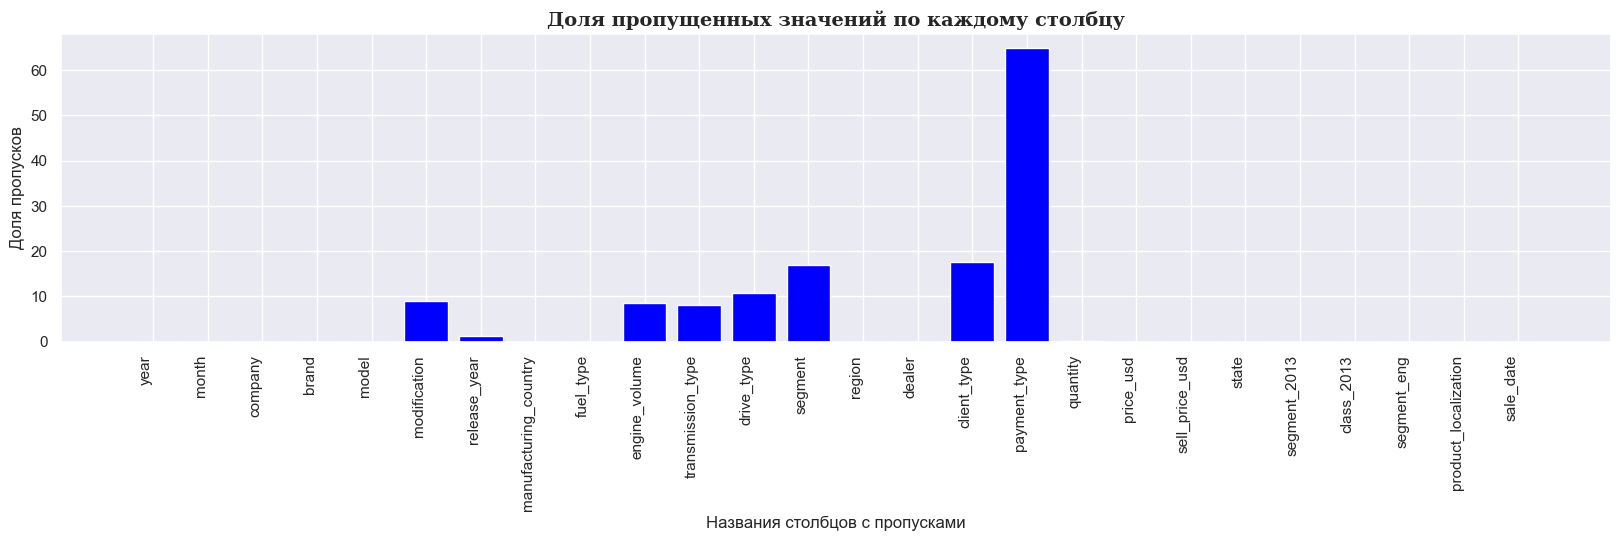

In [58]:
visualize_missing_values(df)

In [59]:
# посмотрим на топ-10 пропусков по столбцу engine_volume
df[df.engine_volume.isna()].model.value_counts().nlargest(10)

model
Duster      682
Sandero     403
Nexia R3    361
Logan       320
Kaptur      230
S3          175
3302        127
S5          117
Next         71
NMR          68
Name: count, dtype: int64

In [60]:
# посмотрим на наиболее часто встречающиеся объемы двигателей по моделям
engine_volume_nans = df[df.engine_volume.isna()].model.value_counts().nlargest(10).reset_index()['model'].tolist()
df[df.model.isin(engine_volume_nans)].groupby('model')['engine_volume'].value_counts()

model     engine_volume
3302      2.70              866
          2.80                3
          4.30                2
Duster    2.00               19
          1.60                6
NMR       3.00               16
          8.70                5
Nexia R3  1.50             1202
          1.49              136
Next      2.70              302
          2.80               30
          4.30               14
S3        1.60             1109
          1.50                2
S5        2.00              330
Sandero   1.60               21
          1.60               10
          1.80                5
          1.40                2
Name: count, dtype: int64

Заполним пропуски там, где это возможно в столбце `engine_volume`

In [61]:
df['engine_volume'] = df.groupby('model')['engine_volume'].transform(lambda x: x.fillna(st.mode(x)))

In [62]:
# посмотрим на топ-10 пропусков по столбцу engine_volume еще раз
df[df.engine_volume.isna()].model.value_counts().nlargest(10)

model
Logan             320
Kaptur            230
CX-5               51
6                  30
Daily              15
Teramont           12
BWC6665GA5         10
BJ3253DMPKB-AD      9
Stinger             8
Master              8
Name: count, dtype: int64

In [63]:
# заполним пропуски для Рено Логан и Каптюр значением 1.6, так как это самый популярный объем для данных моделей и так как
# далее в проекте буду категоризировать авто по объему двигателя
df.loc[(df['model'].isin(["Logan", "Kaptur"])) & (df['brand'] == "Renault") & (df['engine_volume'].isnull()), 'engine_volume'] = 1.6

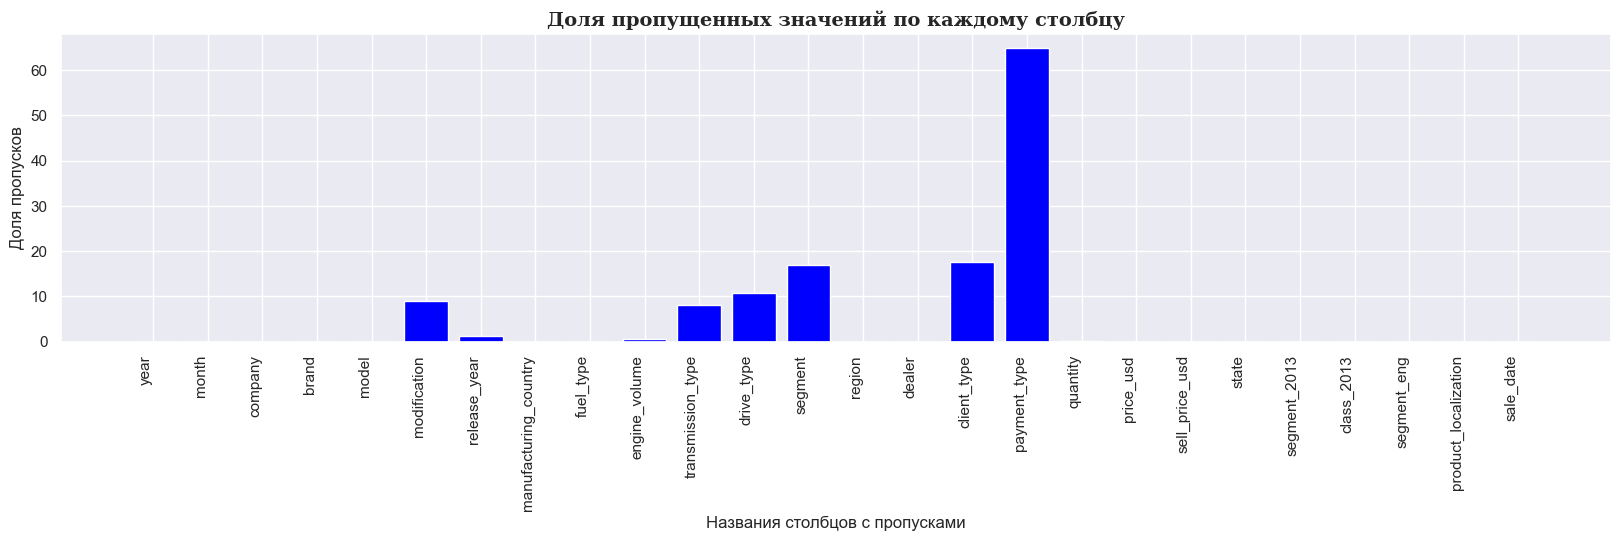

In [64]:
visualize_missing_values(df)

Остальные пропуски заполним заглушкой `-1`

In [65]:
df['engine_volume'] = df['engine_volume'].fillna(-1)
df['engine_volume'].unique()

array([ 1.40039062,  2.        ,  3.        ,  4.3984375 ,  6.6015625 ,
        1.5       ,  1.59570312,  2.40039062,  1.7       ,  6.19921875,
        2.5       ,  1.59960938, -1.        ,  2.69921875,  2.80078125,
        4.30078125,  3.90039062,  7.5       , 12.296875  ,  3.5       ,
        5.6015625 ,  8.703125  ,  5.19921875,  5.        ,  6.        ,
       10.8       ,  6.7       , 11.76      , 11.8       ,  1.59765625,
        1.24804688,  1.99804688,  2.359375  ,  1.99902344,  3.34179688,
        1.59082031,  3.47070312,  1.69042969,  1.77441406,  1.70019531,
        4.6015625 ,  5.69921875,  1.79980469, 10.5       ,  4.        ,
        5.5       , 12.        , 12.796875  , 11.        ,  2.19921875,
        1.20019531,  1.48535156,  1.6       ,  1.33007812,  2.69335938,
        3.80078125, 13.        ,  3.59960938,  7.6015625 ,  4.8984375 ,
        2.90039062,  4.98046875,  8.3984375 ,  6.69921875,  6.5       ])

In [66]:
# Округляем значения столбца 'engine_volume' до двух знаков после запятой
df['engine_volume'] = df['engine_volume'].round(2)

In [67]:
df['engine_volume'].unique()

array([ 1.4 ,  2.  ,  3.  ,  4.4 ,  6.6 ,  1.5 ,  1.6 ,  2.4 ,  1.7 ,
        6.2 ,  2.5 , -1.  ,  2.7 ,  2.8 ,  4.3 ,  3.9 ,  7.5 , 12.3 ,
        3.5 ,  5.6 ,  8.7 ,  5.2 ,  5.  ,  6.  , 10.8 ,  6.7 , 11.76,
       11.8 ,  1.25,  2.36,  3.34,  1.59,  3.47,  1.69,  1.77,  4.6 ,
        5.7 ,  1.8 , 10.5 ,  4.  ,  5.5 , 12.  , 12.8 , 11.  ,  2.2 ,
        1.2 ,  1.49,  1.33,  2.69,  3.8 , 13.  ,  3.6 ,  7.6 ,  4.9 ,
        2.9 ,  4.98,  8.4 ,  6.5 ])

**Посмотрим еще раз какие коробки передач представлены в нашем датасете.**

In [68]:
df.transmission_type.unique()

array(['S-tronic', 'S-Tronic', 'Tiptronic', 'АКПП', 'АКП', 'Steptronic',
       'AT', '6 АТ', '5 МТ', '6АТ', 'MT', '8AT', '5МТ', 'Powershift S6',
       '6AT', nan, 'Мех.', '6 AT', '6 MT', '6MT', '5 AT', '5AT', 'МКПП',
       '7 DCT', '7DCT', '8 AT', 'МТ', 'CVT', 'DCT', '4 АТ', '6 МТ', '6МТ',
       '4АТ', '4AT', '8АТ', '8 АТ', '5MT', 'AMT', 'CVT (вариатор)',
       'CVT (вариATор)', 'CVT(вAриATор)', '7G-TRONIC', '9G-TRONIC',
       '12AT', '12АТ', '5АТ', '7АТ', '7AT', '6M/T', 'PDK', '8-ступ АКПП',
       '8', '8АКПП', '8 АКПП Tiptronic S', '7 АКПП (PDK)', '7 АКПП PDK',
       '8 АКПП (PDK)', 'АТ', 'АT', 'МT', '7 DSG', '7DSG', '6 DSG', '6DSG',
       'DSG', '6A', '6А', '5M', 'A/T', 'M/T', 'МКП', '5М', 'М/T',
       ' 7 АКП', '7АКП', 'А/T', '8A', 'TDI', '9AT', 'РЕДУКТОР', '0'],
      dtype=object)

Для начала приведем все значения в нижний регистр.

In [69]:
# применим регулярное выражение к столбцу 'transmission_type', оставляя только буквы на русском и английском языках и цифру 0
df['transmission_type'] = df['transmission_type'].apply(lambda x: re.sub(r'[^a-zA-Zа-яА-Я0]', '', str(x)) if pd.notnull(x) else np.nan)
df['transmission_type'] = df['transmission_type'].str.lower()
df['transmission_type'].unique()

array(['stronic', 'tiptronic', 'акпп', 'акп', 'steptronic', 'at', 'ат',
       'мт', 'mt', 'powershifts', nan, 'мех', 'мкпп', 'dct', 'cvt', 'amt',
       'cvtвариатор', 'cvtвариatор', 'cvtвaриatор', 'gtronic', 'pdk',
       'ступакпп', '', 'акппtiptronics', 'акппpdk', 'аt', 'мt', 'dsg',
       'a', 'а', 'm', 'мкп', 'м', 'tdi', 'редуктор', '0'], dtype=object)

In [70]:
rep_dic_at = {
    "stronic": "AT",
    "tiptronic": "AT",
    "steptronic": "AT",
    "dsg": "AT",
    "tdi": "AT",
    "редуктор": "AT",
    "акпп": "AT",
    "акп": "AT",
    "cvtвариатор": "AT",
    "cvtвариatор": "AT",
    "cvtвaриatор": "AT",
    "gtronic": "AT",
    "pdk": "AT",
    "ступакпп": "AT",
    "акппtiptronics": "AT",
    "акппpdk": "AT",
    "a": "AT",
    "а": "AT",
    "at": "AT",
    "powershifts": "AT",
    "ат": "AT",
    "dct": "AT",
    "cvt": "AT",
    "amt": "AT",
    "аt": "AT",
}

# применяем словарь для замены значений в столбце тип трансмиссии
df['transmission_type'] = df['transmission_type'].replace(rep_dic_at)

In [71]:
rep_dic_mt = {
    "мт": "MT",
    "mt": "MT",
    "мех": "MT",
    "мкпп": "MT",
    "мt": "MT",
    "m": "MT",
    "мкп": "MT",
    "м": "MT"
}

# применяем словарь для замены значений в столбце тип трансмиссии
df['transmission_type'] = df['transmission_type'].replace(rep_dic_mt)

In [72]:
df['transmission_type'].unique()

array(['AT', 'MT', nan, '', '0'], dtype=object)

In [73]:
df.query('transmission_type in ("", "0")')

year  month         company    brand    model      modification  \
21879 2019.00   2.00     Mercur Auto  Porsche  Cayenne          Cayenne    
21880 2019.00   2.00     Mercur Auto  Porsche  Cayenne        Cayenne S    
21881 2019.00   2.00     Mercur Auto  Porsche  Cayenne  Cayenne E-Hybrid   
21882 2019.00   2.00     Mercur Auto  Porsche  Cayenne        Cayenne S    
21883 2019.00   2.00     Mercur Auto  Porsche  Cayenne          Cayenne    
24997 2019.00   1.00  Renault Россия  Renault  Sandero        SXP16PA5RB   
25002 2019.00   1.00  Renault Россия  Renault  Sandero        SUT16PA5RB   
25023 2019.00   1.00  Renault Россия  Renault  Sandero        SXP16PA5RB   

      release_year manufacturing_country fuel_type  engine_volume  \
21879         2018              Германия    бензин           3.00   
21880         2018              Германия    бензин           3.00   
21881         2018              Германия    бензин           3.00   
21882         2018              Германия    бензин           3.00   
21883         2018              Германия    бензин           3.00   
24997         2018  Российская Федерация   unknown           1.60   
25002         2018  Российская Федерация   unknown           1.60   
25023         2018  Российская Федерация   unknown           1.60   

      transmission_type drive_type      segment      region  \
21879                          4WD  premium SUV      Алматы   
21880                          4WD  premium SUV      Алматы   
21881                          4WD  premium SUV      Алматы   
21882                          4WD  premium SUV      Алматы   
21883                          4WD  premium SUV      Алматы   
24997                 0          0            0      Атырау   
25002                 0          0            0      Атырау   
25023                 0          0            0  Нур-Султан   

                      dealer client_type payment_type  quantity  price_usd  \
21879  Porsche Centre Almaty   Физ. Лицо  Безналичная         1   90000.00   
21880  Porsche Centre Almaty   Физ. Лицо  Безналичная         1  121474.90   
21881  Porsche Centre Almaty   Физ. Лицо  Безналичная         1  132373.54   
21882  Porsche Centre Almaty   Физ. Лицо  Безналичная         1  114165.98   
21883  Porsche Centre Almaty   Физ. Лицо  Безналичная         1   96249.73   
24997         Урал-Кров Авто         NaN          NaN         1   12476.90   
25002         Урал-Кров Авто         NaN          NaN         1   12476.90   
25023        Автоцентр Астэк         NaN          NaN         1   12476.90   

       sell_price_usd               state         segment_2013  \
21879        90000.00            г.Алматы         Внедорожники   
21880       121474.90            г.Алматы         Внедорожники   
21881       132373.54            г.Алматы         Внедорожники   
21882       114165.98            г.Алматы         Внедорожники   
21883        96249.73            г.Алматы         Внедорожники   
24997        12476.90  Атырауская область  Легковые автомобили   
25002        12476.90  Атырауская область  Легковые автомобили   
25023        12476.90        г.Нур-Султан  Легковые автомобили   

               class_2013 segment_eng product_localization sale_date  
21879  Полноразмерные SUV          K3               Импорт   2019-02  
21880  Полноразмерные SUV          K3               Импорт   2019-02  
21881  Полноразмерные SUV          K3               Импорт   2019-02  
21882  Полноразмерные SUV          K3               Импорт   2019-02  
21883  Полноразмерные SUV          K3               Импорт   2019-02  
24997             B класс           B               Импорт   2019-01  
25002             B класс           B               Импорт   2019-01  
25023             B класс           B               Импорт   2019-01

In [74]:
df.loc[(df['model'] == "Cayenne") & (df['brand'] == "Porsche") & (df['transmission_type'] == ""), 'transmission_type'] = "AT"

In [75]:
df.loc[(df['model'] == "Sandero") & (df['brand'] == "Renault") & (df['transmission_type'] == "0"), 'transmission_type'] = "unknown"

In [76]:
df['transmission_type'] = df['transmission_type'].fillna('unknown')

In [77]:
df['transmission_type'].unique()

array(['AT', 'MT', 'unknown'], dtype=object)

**Посмотрим какие тип приводов представлены в нашем датасете.**

In [78]:
df['drive_type'].unique()

array(['передний', 'FWD', 'quattro', 'Задний', 'Полный', 'AWD',
       'Передний', '4WD', '4х2.2', nan, 'RWD', '2 WD', '2WD', '4 WD',
       '4X4', '4х4', '4x4', '4x2', '4х2', '4X2', 'Астана',
       'Передний (FF)', '0', 'FF', 'полный', '4Motion'], dtype=object)

In [79]:
# применим регулярное выражение к столбцу 'drive_typetransmission_type', оставляя только буквы на русском и английском языках, а также цифры
df['drive_type'] = df['drive_type'].apply(lambda x: re.sub(r'[^a-zA-Zа-яА-Я0-9]', '', str(x)) if pd.notnull(x) else np.nan)
df['drive_type'] = df['drive_type'].str.lower()
df['drive_type'].unique()

array(['передний', 'fwd', 'quattro', 'задний', 'полный', 'awd', '4wd',
       '4х22', nan, 'rwd', '2wd', '4x4', '4х4', '4x2', '4х2', 'астана',
       'переднийff', '0', 'ff', '4motion'], dtype=object)

In [80]:
rep_dic_ff = {
    "передний": "FF",
    "fwd": "FF",
    "ff": "FF",
    "переднийff": "FF"
}

# применим словарь для замены значений в столбце тип трансмиссии
df['drive_type'] = df['drive_type'].replace(rep_dic_ff)

rep_dic_rwd = {
    "задний": "RWD",
    "rwd": "RWD"
}

# применим словарь для замены значений в столбце тип трансмиссии
df['drive_type'] = df['drive_type'].replace(rep_dic_rwd)

rep_dic_4wd = {
    "quattro": "4WD",
    "полный": "4WD",
    "awd": "4WD",
    "4wd": "4WD",
    "4х22": "4WD",
    "4x4": "4WD",
    "4х4": "4WD",
    "4x2": "4WD",
    "4х2": "4WD",
    "4motion": "4WD"
}

# применим словарь для замены значений в столбце тип трансмиссии
df['drive_type'] = df['drive_type'].replace(rep_dic_4wd)

rep_dic_2wd = {
    "2wd": "2WD"
}

# применим словарь для замены значений в столбце тип трансмиссии
df['drive_type'] = df['drive_type'].replace(rep_dic_2wd)

df['drive_type'].unique()

array(['FF', '4WD', 'RWD', nan, '2WD', 'астана', '0'], dtype=object)

Посмотрим на модели KAMAZ с типом привода `астана`

In [81]:
df.query("drive_type == 'астана'")

year  month   company  brand  model modification release_year  \
15771 2019.00   5.00  ТК КАМАЗ  KAMAZ  65116  KAMAZ 65116         2019   
39549 2019.00   5.00  ТК КАМАЗ  KAMAZ  45141  KAMAZ 45141         2019   

      manufacturing_country fuel_type  engine_volume transmission_type  \
15771  Республика Казахстан    дизель          11.80                MT   
39549  Республика Казахстан    дизель           6.00                MT   

      drive_type              segment      region  \
15771     астана  Грузовой автомобиль  Нур-Султан   
39549     астана  Грузовой автомобиль  Нур-Султан   

                            dealer client_type payment_type  quantity  \
15771  Акмолинский Автоцентр КАМАЗ    Юр. Лицо  безналичный         1   
39549  Акмолинский Автоцентр КАМАЗ    Юр. Лицо  безналичный         1   

       price_usd  sell_price_usd         state             segment_2013  \
15771   55655.86        55655.86  г.Нур-Султан  Коммерческие автомобили   
39549   53963.82        53963.82  г.Нур-Султан  Коммерческие автомобили   

                      class_2013 segment_eng    product_localization sale_date  
15771  Крупнотоннажные грузовики           O  Локальное производство   2019-05  
39549  Крупнотоннажные грузовики           O  Локальное производство   2019-05

Естественно такого типа привода нет, поэтому заменим его на корректный: задний привод для `65116` и полный привод для `45141`

In [82]:
df.loc[(df['brand'] == "KAMAZ") & (df['model'] == "65116") & (df['drive_type'] == "астана"), 'drive_type'] = 'RWD'
df.loc[(df['brand'] == "KAMAZ") & (df['model'] == "45141") & (df['drive_type'] == "астана"), 'drive_type'] = '4WD'

Также заменим пропуски в столбце `тип привода` для данных моделей на соответствующий.

In [83]:
df.loc[(df['brand'] == "KAMAZ") & (df['model'] == "65116"), 'drive_type'] = df.loc[(df['brand'] == "KAMAZ") & (df['model'] == "65116"), 'drive_type'].fillna('RWD')
df.loc[(df['brand'] == "KAMAZ") & (df['model'] == "45141"), 'drive_type'] = df.loc[(df['brand'] == "KAMAZ") & (df['model'] == "45141"), 'drive_type'].fillna('4WD')

Посмотрим на автомобили с типом привода `0`

In [84]:
df.loc[(df['drive_type'] == '0')]

year  month         company    brand    model modification  \
23737 2019.00   1.00  Renault Россия  Renault   Duster     DKGB4AGA   
23738 2019.00   1.00  Renault Россия  Renault   Duster     DKGB4AGA   
23739 2019.00   1.00  Renault Россия  Renault   Duster     DKGB4AGA   
23740 2019.00   1.00  Renault Россия  Renault   Duster     DKGB4AGA   
23741 2019.00   1.00  Renault Россия  Renault   Duster     DKGB4AGA   
...       ...    ...             ...      ...      ...          ...   
25031 2019.00   1.00  Renault Россия  Renault  Sandero   SUTA16K5RB   
25032 2019.00   1.00  Renault Россия  Renault  Sandero   AUTA16K5RB   
24997 2019.00   1.00  Renault Россия  Renault  Sandero   SXP16PA5RB   
25002 2019.00   1.00  Renault Россия  Renault  Sandero   SUT16PA5RB   
25023 2019.00   1.00  Renault Россия  Renault  Sandero   SXP16PA5RB   

      release_year manufacturing_country fuel_type  engine_volume  \
23737         2018  Российская Федерация   unknown           2.00   
23738         2018  Российская Федерация   unknown           2.00   
23739         2018  Российская Федерация   unknown           2.00   
23740         2018  Российская Федерация   unknown           2.00   
23741         2018  Российская Федерация   unknown           2.00   
...            ...                   ...       ...            ...   
25031         2018  Российская Федерация   unknown           1.60   
25032         2018  Российская Федерация   unknown           1.60   
24997         2018  Российская Федерация   unknown           1.60   
25002         2018  Российская Федерация   unknown           1.60   
25023         2018  Российская Федерация   unknown           1.60   

      transmission_type drive_type segment      region  \
23737           unknown          0       0  Нур-Султан   
23738           unknown          0       0  Нур-Султан   
23739           unknown          0       0  Нур-Султан   
23740           unknown          0       0  Нур-Султан   
23741           unknown          0       0   Караганда   
...                 ...        ...     ...         ...   
25031           unknown          0       0  Нур-Султан   
25032           unknown          0       0  Нур-Султан   
24997           unknown          0       0      Атырау   
25002           unknown          0       0      Атырау   
25023           unknown          0       0  Нур-Султан   

                        dealer client_type payment_type  quantity  price_usd  \
23737     Кристалл Авто Астана         NaN          NaN         1   12249.61   
23738     Кристалл Авто Астана         NaN          NaN         1   12249.61   
23739     Кристалл Авто Астана         NaN          NaN         1   12249.61   
23740     Кристалл Авто Астана         NaN          NaN         1   12249.61   
23741  Кристалл Авто Караганда         NaN          NaN         1   12249.61   
...                        ...         ...          ...       ...        ...   
25031          Автоцентр Астэк         NaN          NaN         1   12476.90   
25032          Автоцентр Астэк         NaN          NaN         1   10367.90   
24997           Урал-Кров Авто         NaN          NaN         1   12476.90   
25002           Урал-Кров Авто         NaN          NaN         1   12476.90   
25023          Автоцентр Астэк         NaN          NaN         1   12476.90   

       sell_price_usd                   state         segment_2013  \
23737        12249.61            г.Нур-Султан         Внедорожники   
23738        12249.61            г.Нур-Султан         Внедорожники   
23739        12249.61            г.Нур-Султан         Внедорожники   
23740        12249.61            г.Нур-Султан         Внедорожники   
23741        12249.61  Карагандинская область         Внедорожники   
...               ...                     ...                  ...   
25031        12476.90            г.Нур-Султан  Легковые автомобили   
25032        10367.90            г.Нур-Султан  Легковые автомобили   
24997        12476.90      Атырауская о

In [85]:
# посмотрим на топ-10 пропусков по столбцу drive_type
df[df.drive_type.isna()].model.value_counts().nlargest()

model
Duster      638
Sandero     396
Nexia R3    361
Polo        361
S3          317
Name: count, dtype: int64

In [86]:
# посмотрим на наиболее часто встречающиеся типы приводов по моделям
drive_type_nans = df[df.drive_type.isna()].model.value_counts().nlargest(10).reset_index()['model'].tolist()
df[df.model.isin(drive_type_nans)].groupby('model')['drive_type'].value_counts()

model     drive_type
Duster    4WD            51
          0              12
          FF              6
Kaptur    0              48
Logan     0              14
Nexia R3  2WD           805
          FF            533
Polo      FF            103
          2WD            77
          4WD             3
S3        2WD           969
S5        2WD           342
Sandero   0              42
          FF              3
Name: count, dtype: int64

Можно сразу заменить нулевые типы приводов для моделей `Рено Логан`, `Сандеро` и `Каптюр с объемом двигателя менее 2 литров` на `передний привод`. Спасибо интернет-ресурсу `drom.ru`

In [87]:
df.loc[(df['model'].isin(['Sandero', 'Logan'])) & (df['drive_type'] == '0'), 'drive_type'] = 'FF'
df.loc[(df['engine_volume'] < 2) & (df['model'] == 'Kaptur') & (df['drive_type'] == '0'), 'drive_type'] = 'FF'

In [88]:
df[df.model.isin(drive_type_nans)].groupby('model')['drive_type'].value_counts()

model     drive_type
Duster    4WD            51
          0              12
          FF              6
Kaptur    FF             48
Logan     FF             14
Nexia R3  2WD           805
          FF            533
Polo      FF            103
          2WD            77
          4WD             3
S3        2WD           969
S5        2WD           342
Sandero   FF             45
Name: count, dtype: int64

Для `Рено Дастер` нулевой тип привода заменим на `unknown`, так как невозможно установить какой именно тип привода у данной модели передний или полный.

In [89]:
df.loc[(df['model'] == "Duster") & (df['brand'] == "Renault") & (df['drive_type'] == "0"), 'drive_type'] = "unknown"

Все остальные пропуски забьём заглушкой `unknown`

In [90]:
df.drive_type = df.drive_type.fillna("unknown")

In [91]:
df['drive_type'].unique()

array(['FF', '4WD', 'RWD', 'unknown', '2WD'], dtype=object)

**Посмотрим какие у нас присутствуют типы клиентов**

In [92]:
df.client_type.unique()

array(['Физ. Лицо', 'Юр. Лицо', nan, 'Юр.Лицо', 'физ.лицо', 'юридическое',
       'физическое', 'ФизЛицо', 'ЮрЛицо', 'Корп. клиент'], dtype=object)

In [93]:
# применим регулярное выражение к столбцу 'client_type', оставляя только буквы на русском и английском языках
df['client_type'] = df['client_type'].apply(lambda x: re.sub(r'[^а-яА-Я]', '', str(x)) if pd.notnull(x) else np.nan)
df['client_type'] = df['client_type'].str.lower()
df['client_type'].unique()

array(['физлицо', 'юрлицо', nan, 'юридическое', 'физическое',
       'корпклиент'], dtype=object)

In [94]:
rep_dict_cl_type = {
    "юридическое": "юрлицо",
    "физическое": "физлицо",
    "корпклиент": "юрлицо"
}

# применим словарь для замены значений в столбце тип клиентов
df['client_type'] = df['client_type'].replace(rep_dict_cl_type)

In [95]:
df.client_type.unique()

array(['физлицо', 'юрлицо', nan], dtype=object)

In [96]:
df.query("client_type not in ('физлицо', 'юрлицо')").sample(10)

year  month                   company       brand    model  \
38550 2019.00   8.00      Volkswagen Group Rus  Volkswagen   Tiguan   
18531 2019.00   5.00                БИПЭК АВТО        Lada     XRAY   
17018 2019.00   1.00                БИПЭК АВТО        Lada   Granta   
16945 2019.00   7.00                БИПЭК АВТО        Lada      4x4   
17733 2019.00   1.00                БИПЭК АВТО        Lada    Vesta   
67    2019.00   8.00         Автоцентр-Бавария         BMW  7 серия   
21490 2019.00   7.00  Nissan Manufacturing RUS      Nissan  Terrano   
17986 2019.00   4.00                БИПЭК АВТО        Lada    Vesta   
18655 2019.00   8.00                БИПЭК АВТО        Lada     XRAY   
24951 2019.00   9.00            Renault Россия     Renault    Logan   

         modification release_year manufacturing_country fuel_type  \
38550       Tiguan NF          NaT  Российская Федерация    бензин   
18531             NaN         2019  Республика Казахстан    бензин   
17018          Granta         2019  Республика Казахстан    бензин   
16945             NaN         2019  Республика Казахстан    бензин   
17733  Vesta SW Cross         2018  Республика Казахстан    бензин   
67       740Li xDrive         2019              Германия    бензин   
21490        Elegance         2019  Российская Федерация    бензин   
17986             NaN         2019  Республика Казахстан    бензин   
18655             NaN         2019  Республика Казахстан    бензин   
24951      SUTA16K5RB         2019  Российская Федерация   unknown   

       engine_volume transmission_type drive_type             segment  \
38550           2.00           unknown    unknown                 NaN   
18531           1.60                MT         FF            B класс    
17018           1.60                MT         FF            B класс    
16945           1.69                MT        4WD  Субкомпактные SUV    
17733           1.77                AT         FF                #Н/Д   
67              3.00                AT        4WD                 NaN   
21490           1.60                MT         FF                 NaN   
17986           1.77                MT         FF            B класс    
18655           1.77                MT         FF            B класс    
24951           1.60           unknown    unknown                 NaN   

            region                    dealer client_type payment_type  \
38550    Караганда   Автомир-Центр Караганда         NaN          NaN   
18531    Кызылорда      БИПЭК АВТО Кызылорда         NaN          NaN   
17018  Талдыкорган    БИПЭК АВТО Талдыкорган         NaN          NaN   
16945     Каскелен       БИПЭК АВТО Каскелен         NaN          NaN   
17733   Нур-Султан         БИПЭК АВТО Астана         NaN          NaN   
67          Алматы  Автоцентр-Бавария Алматы         NaN          NaN   
21490    Караганда   Автомир-Центр Караганда         NaN          NaN   
17986       Атырау         БИПЭК АВТО Атырау         NaN          NaN   
18655     Костанай       БИПЭК АВТО Костанай         NaN          NaN   
24951       Алматы         ASTER AUTO Алматы         NaN          NaN   

       quantity  price_usd  sell_price_usd                   state  \
38550         3   32040.18        96120.54  Карагандинская область   
18531         1   13800.00        13800.00  Кызылординская область   
17018         1    8700.00         8700.00     Алматинская область   
16945         2    9000.00        18000.00     Алматинская область   
17733         1   12900.00        12900.00            г.Нур-Султан   
67            1   92387.44        92387.44                г.Алматы   
21490         2   16160.16        32320.33  Карагандинская область   
17986         1   11600.00        11600.00      Атырауская область   
18655         1   13800.00        13800.00    Костанайская область   
24951         1   12550.93        12550.93                г.Алматы   

              segment_2013          class_2013 segment_eng  \
38550         В

Пропуски в столбце `client_type` заполним по алгоритму: если в столбце `quantity` больше двух авто или тип транспорта «коммерческий», то в столбце `client_type` заполним пропуск как `юрлицо`, иначе - `физлицо`.

In [97]:
# заполним пропуски в столбце 'client_type' согласно заданному алгоритму
df.loc[(df['segment_2013'] == "Коммерческие автомобили") | (df['quantity'] > 2), 'client_type'] = "юрлицо"

# иначе
df['client_type'] = df['client_type'].fillna('физлицо')

In [98]:
df.client_type.unique()

array(['физлицо', 'юрлицо'], dtype=object)

**Столбцы `Модификация`, `Сегмент`, `Форма расчета`, `Сегмент Eng` можно удалить (множество незаполняемых пропусков или дублируются другими столбцами)**

In [99]:
lst = ['modification', 'segment', 'payment_type', 'segment_eng', 'class_2013']
for i in lst:
    del df[i]

**Столбец `Локализация производства` – удаляем (совпадает со страной производителем)**

In [100]:
del df['product_localization']

In [101]:
df.head(1)

year  month      company brand model release_year manufacturing_country  \
0 2019.00   5.00  Mercur Auto  Audi    A3         2018              Германия   

  fuel_type  engine_volume transmission_type drive_type  region  \
0    бензин           1.40                AT         FF  Алматы   

               dealer client_type  quantity  price_usd  sell_price_usd  \
0  Mercur Auto Алматы     физлицо         1   28115.00        28115.00   

      state         segment_2013 sale_date  
0  г.Алматы  Легковые автомобили   2019-05

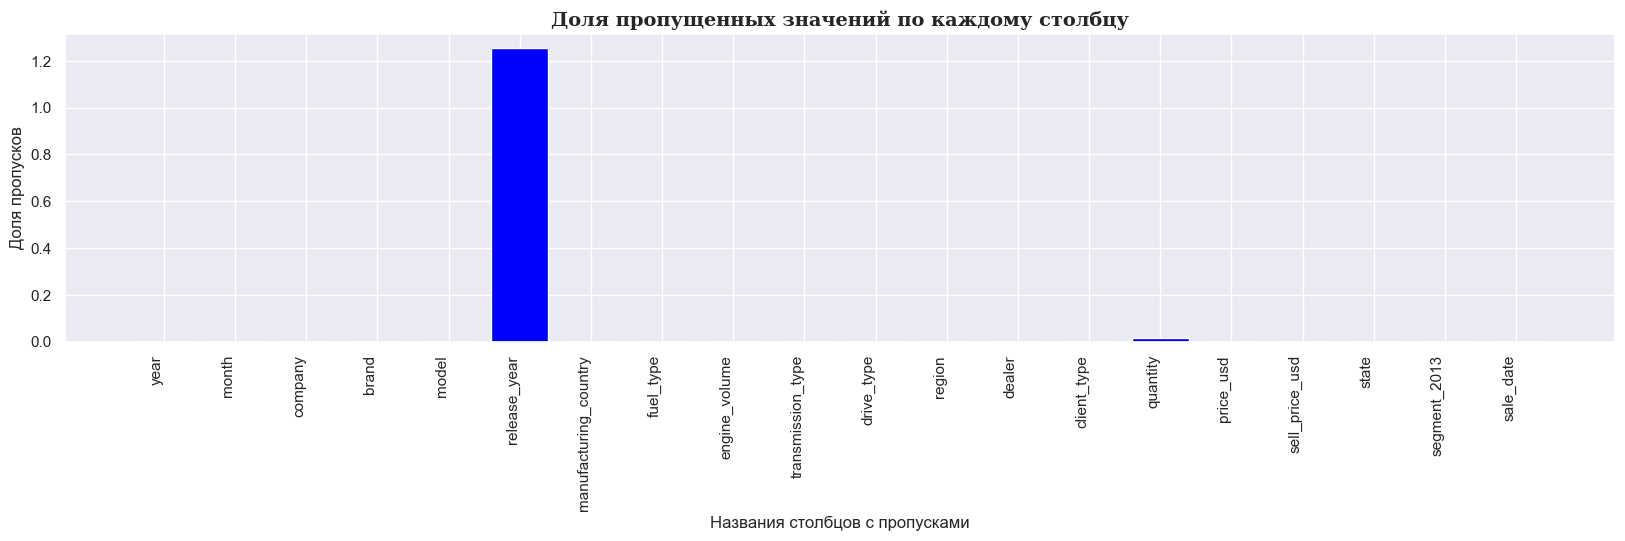

In [102]:
visualize_missing_values(df)

In [103]:
# удалим строки с пропусками по столбцу quantity, так как они будут бесполезны для анализа
df = df.dropna(subset=['quantity'])

**Посмотрим статистику по столбцу объем двигателя**

In [104]:
df[['engine_volume']].describe()

engine_volume
count       39956.00
mean            2.42
std             1.46
min            -1.00
25%             1.60
50%             2.00
75%             2.69
max            13.00

**Образуем следующи категории:**  
менее 1,6 литров - `малолитражки`,   
от 1,6 до 2 литров - `среднеобъёмные`,  
от 2 до 3 литров - `выше среднего`,  
от 3 до 6 литров - `большой объём`,  
от 6 литров - `очень большой объём двигателя`

In [105]:
# добавляем столбец 'cat_fuel_type' со значением NaN
df.insert(9, "cat_fuel_type", np.nan)

# создаем условия и соответствующие значения для категорий по объему двигателя
conditions = [
    (df['engine_volume'] < 1.6),
    (df['engine_volume'] >= 1.6) & (df['engine_volume'] <= 2),
    (df['engine_volume'] > 2) & (df['engine_volume'] <= 3),
    (df['engine_volume'] > 3) & (df['engine_volume'] < 6),
    (df['engine_volume'] >= 6)
]

categories = ['малолитражки', 'среднеобъемные', 'выше среднего', 'большой объем', 'очень большой объем']

# заполняем столбец 'cat_fuel_type' согласно заданным категориям
df['cat_fuel_type'] = np.select(conditions, categories)

In [106]:
df.cat_fuel_type.unique()

array(['малолитражки', 'среднеобъемные', 'выше среднего', 'большой объем',
       'очень большой объем'], dtype=object)

In [107]:
df.query('brand == "KAMAZ"')

year  month   company  brand   model release_year  \
15047 2019.00   5.00  ТК КАМАЗ  KAMAZ    4308         2019   
15048 2019.00   7.00  ТК КАМАЗ  KAMAZ    4308         2019   
15049 2019.00   3.00  ТК КАМАЗ  KAMAZ    4311         2018   
15050 2019.00   1.00  ТК КАМАЗ  KAMAZ   43118         2018   
15051 2019.00   1.00  ТК КАМАЗ  KAMAZ   43118         2018   
...       ...    ...       ...    ...     ...          ...   
39961 2019.00   9.00  ТК КАМАЗ  KAMAZ  58815Z         2019   
39962 2019.00   9.00  ТК КАМАЗ  KAMAZ  58815Z         2019   
39963 2019.00   9.00  ТК КАМАЗ  KAMAZ  58815Z         2019   
39964 2019.00   9.00  ТК КАМАЗ  KAMAZ  58815Z         2019   
39965 2019.00   9.00  ТК КАМАЗ  KAMAZ  58815Z         2019   

      manufacturing_country fuel_type  engine_volume        cat_fuel_type  \
15047  Российская Федерация    дизель           6.00  очень большой объем   
15048  Российская Федерация    дизель           6.00  очень большой объем   
15049  Российская Федерация    дизель          10.80  очень большой объем   
15050  Республика Казахстан    дизель          10.80  очень большой объем   
15051  Республика Казахстан    дизель          10.80  очень большой объем   
...                     ...       ...            ...                  ...   
39961  Республика Казахстан    дизель           6.00  очень большой объем   
39962  Республика Казахстан    дизель           6.00  очень большой объем   
39963  Республика Казахстан    дизель           6.00  очень большой объем   
39964  Республика Казахстан    дизель           6.00  очень большой объем   
39965  Республика Казахстан    дизель           6.00  очень большой объем   

      transmission_type drive_type      region                       dealer  \
15047                MT    unknown      Алматы  Алматинский Автоцентр КАМАЗ   
15048                MT    unknown      Алматы  Алматинский Автоцентр КАМАЗ   
15049                MT    unknown      Актобе          ЗапКазКАМАЗ -Актобе   
15050                MT    unknown  Нур-Султан  Российские Грузовики Астана   
15051                MT    unknown      Актобе          ЗапКазКАМАЗ -Актобе   
...                 ...        ...         ...                          ...   
39961                MT    unknown      Актобе          ЗапКазКАМАЗ -Актобе   
39962                MT    unknown      Актобе          ЗапКазКАМАЗ -Актобе   
39963                MT    unknown      Актобе          ЗапКазКАМАЗ -Актобе   
39964                MT    unknown      Актобе          ЗапКазКАМАЗ -Актобе   
39965                MT    unknown      Актобе          ЗапКазКАМАЗ -Актобе   

      client_type  quantity  price_usd  sell_price_usd                state  \
15047      юрлицо         1   51187.61        51187.61             г.Алматы   
15048      юрлицо         1   50684.86        50684.86             г.Алматы   
15049      юрлицо         1   56013.26        56013.26  Актюбинская область   
15050      юрлицо         1   49949.87        49949.87         г.Нур-Султан   
15051      юрлицо         1   49949.87        49949.87  Актюбинская область   
...           ...       ...        ...             ...                  ...   
39961      юрлицо         1   48756.92        48756.92  Актюбинская область   
39962      юрлицо         1   48756.92        48756.92  Актюбинская область   
39963      юрлицо         1   48756.92        48756.92  Актюбинская область   
39964      юрлицо         1   48756.92        48756.92  Актюбинская область   
39965      юрлицо         1   48756.92        48756.92  Актюбинская область   

                  segment_2013 sale_date  
15047  Коммерческие автомобили   2019-05  
15048  Коммерческие автомобили   2019-07  
15049  Коммерческие автомобили   2019-03  
15050  Коммерческие автомобили   2019-01  
15051  Коммерческие автомобили   2019-01  
...                        ...       ...  
39961  Коммерческие автомобили   2019-09  
39962  Коммерческие автомобили   2019-09  
39963  Коммерческие автомобили   2019-09  
39964  Комм

**Таким образом дальнейший анализ будем проводить по следующим столбцам:**  
`year` – год продажи (2019)  
`month` – месяц продажи (январь - сентябрь)  
`company` – название автоцентра  
`brand` – название продаваемой марки автомобиля  
`model` – название модели автомобиля      
`release_year` – год производства автомобиля  
`manufacturing_country` – страна, где произведен автомобиль  
`fuel_type` – бензин, дизель, электричество, гибрид  
`engine_volume` – объем двигателя автомобиля в литрах  
`cat_fuel_type` - категории объемов двигателя автомобилей (`малолитражки`, `среднеобъёмные`, `выше среднего`, `большой объём`, `очень большой объём двигателя`)  
`transmission_type` – тип коробки переключения передач  
`drive_type` – в итоге оставляем RWD – задний привод, FWD – передний привод, 4WD – полный привод, 2WD – все остальное   
`region` – регион продажи  
`dealer` – совпадает с компанией  
`client_type` – юридическое или физическое лицо   
`quantity` – количество автомобилей в заказе  
`price_usd` – цена автомобиля  
`sell_price_usd	` – цена заказа (цена авто умноженная на количество и за вычетом скидок если есть)  
`state` – область продажи  
`segment_2013` – сегмент автомобиля актуальный  
`class_2013` – класс автомобиля актуальный  
`sale_date` - дата продажи в формате ГГ-ММ

Признаки-категории:  
- `сегмент`  
- `класс`  
- `тип привода`     
- `коробка передач`   

**Посмотрим присутствуют ли явные дубликаты в нашем датасете**

In [108]:
df.duplicated().sum()

19895

In [109]:
df[df.duplicated()].head(10)

year  month            company      brand model release_year  \
8   2019.00   6.00        Mercur Auto       Audi    A6         2019   
116 2019.00   2.00  Автоцентр-Бавария        BMW    X4         2018   
267 2019.00   1.00              Вираж  Chevrolet  Niva         2018   
269 2019.00   1.00              Вираж  Chevrolet  Niva         2018   
272 2019.00   1.00              Вираж  Chevrolet  Niva         2018   
273 2019.00   1.00              Вираж  Chevrolet  Niva         2018   
275 2019.00   1.00              Вираж  Chevrolet  Niva         2018   
277 2019.00   1.00              Вираж  Chevrolet  Niva         2018   
286 2019.00   1.00              Вираж  Chevrolet  Niva         2018   
289 2019.00   1.00              Вираж  Chevrolet  Niva         2018   

    manufacturing_country fuel_type  engine_volume   cat_fuel_type  \
8                Германия    бензин           3.00   выше среднего   
116                   США    бензин           2.00  среднеобъемные   
267  Республика Казахстан    бензин           1.70  среднеобъемные   
269  Республика Казахстан    бензин           1.70  среднеобъемные   
272  Республика Казахстан    бензин           1.70  среднеобъемные   
273  Республика Казахстан    бензин           1.70  среднеобъемные   
275  Республика Казахстан    бензин           1.70  среднеобъемные   
277  Республика Казахстан    бензин           1.70  среднеобъемные   
286  Республика Казахстан    бензин           1.70  среднеобъемные   
289  Республика Казахстан    бензин           1.70  среднеобъемные   

    transmission_type drive_type         region                    dealer  \
8                  AT        4WD         Алматы        Mercur Auto Алматы   
116                AT        4WD     Нур-Султан  Автоцентр-Бавария Астана   
267                MT        4WD        Уральск             Вираж Уральск   
269                MT        4WD        Уральск             Вираж Уральск   
272                MT        4WD        Уральск             Вираж Уральск   
273                MT        4WD  Петропавловск       Вираж Петропавловск   
275                MT        4WD     Нур-Султан              Вираж Астана   
277                MT        4WD       Кокшетау            Вираж Кокшетау   
286                MT        4WD       Кокшетау            Вираж Кокшетау   
289                MT        4WD       Павлодар            Вираж Павлодар   

    client_type  quantity  price_usd  sell_price_usd  \
8       физлицо         1   78940.00        78940.00   
116     физлицо         1   45412.79        45412.79   
267     физлицо         1   10568.76        10568.76   
269     физлицо         1   10568.76        10568.76   
272     физлицо         1   10568.76        10568.76   
273     физлицо         1   10568.76        10568.76   
275      юрлицо         1   10568.76        10568.76   
277     физлицо         1   10568.76        10568.76   
286      юрлицо         1   10568.76        10568.76   
289     физлицо         1   10568.76        10568.76   

                             state         segment_2013 sale_date  
8                         г.Алматы  Легковые автомобили   2019-06  
116                   г.Нур-Султан         Внедорожники   2019-02  
267  Западно-Казахстанская область         Внедорожники   2019-01  
269  Западно-Казахстанская область         Внедорожники   2019-01  
272  Западно-Казахстанская область         Внедорожники   2019-01  
273   Северо-Казахстанская область         Внедорожники   2019-01  
275                   г.Нур-Султан         Внедорожники   2019-01  
277            Акмолинская область         Внедорожники   2019-01  
286            Акмолинская область         Внедорожники   2019-01  
289           Павлодарская область         Внедорожники   2019-01

Как оказалось дубликаты присутствуют, но на самом деле дубликатов нет - они возникли в связи с деперсонализацией информации. Поэтому будем считать, что данные в нашем датасете уникальны.

**Выводы после предобработки данных**   
Была проделана большая работа по предобработке данных:
1. Была оценена информация в датасете на предмет пропусков и методов заполнения данных пропусков
2. Приведены к корректному типу столбцы. В некоторых столбцах с целочисленным типом и в типах с "плавающей" запятой тип был заменен на 8-битный и 16-битный тип данных соответственно, для экономии вычислительных ресурсов и уменьшения времени на выполнение операций
3. Были приведены к корректному виду названия значений с транскрипцией на разных языках
4. Проведена работа по исследованию уникальных значений по каждому из столбцов, чтобы выявить некорректное написание значений в данных столбцах и их исправление
5. Часть данных для бренда Рено в датасете "съехала" вправо на одну ячейку, данный момент был исправлен
6. Был создан столбец с категориями по объему двигателя для дальнейшего исследования данных.
7. До начала предобработки датасет содержал 39966 строк и 25 столбцов. После предобработки в датасете осталось 39956 строк и 22 столбца. 
8. Незначительную часть данных из датасета пришлось удалить, так как она не подлежала исследованию из-за нецелесообразности восстановления данных или не имела ценности для дальнейшего исследования.

## Исследовательский анализ данных:

In [110]:
df.quantity.sum() # общее количество проданных автомобилей
print(f"Общее количество проданных автомобилей с начала 2019 года по сентябрь 2019 года составляет: {df.quantity.sum()} шт")

Общее количество проданных автомобилей с начала 2019 года по сентябрь 2019 года составляет: 53870 шт


In [111]:
df.sell_price_usd.sum() # общий объем денежных средств затраченных на покупку автомобилей в Казахстане
print(f"Общий объем денежных средств на покупку автомобилей в Казахстане с начала 2019 года по сентябрь 2019 года: {df.sell_price_usd.sum():.0f} долларов США")

Общий объем денежных средств на покупку автомобилей в Казахстане с начала 2019 года по сентябрь 2019 года: 1349016452 долларов США


**Посморим количество брендов на компанию**

In [112]:
df_kz_group = df.groupby('company')['brand'].nunique().sort_values(ascending=False).reset_index()
df_kz_group

company  brand
0                     Allur Auto      7
1                     БИПЭК АВТО      5
2                          СемАЗ      4
3                    Mercur Auto      3
4                          Вираж      3
5                  Astana Motors      2
6        Toyota Motor Kazakhstan      2
7          Eurasia Motor Premium      2
8                       ТК КАМАЗ      2
9                      СВС-ТРАНС      2
10      Nissan Manufacturing RUS      2
11             Автоцентр-Бавария      2
12                   Автокапитал      2
13         Almaty Motors Premium      2
14                  TERRA MOTORS      2
15                       ММС Рус      1
16                Каспиан Моторс      1
17              Лифан Моторс Рус      1
18     ТОО "Eurasia Motor Zhaik"      1
19        Равон Моторс Казахстан      1
20          Volkswagen Group Rus      1
21                 Автомир-Центр      1
22                    Автомир ГК      1
23            Автодом Motors KST      1
24             Subaru Kazakhstan      1
25           Scania Central Asia      1
26           Scandinavian Motors      1
27                Renault Россия      1
28    MAN Truck & Bus Kazakhstan      1
29  Hyundai Com Trans Kazakhstan      1
30                   Hino Motors      1
31         Daewoo Bus Kazakhstan      1
32              УзАвто-Казахстан      1

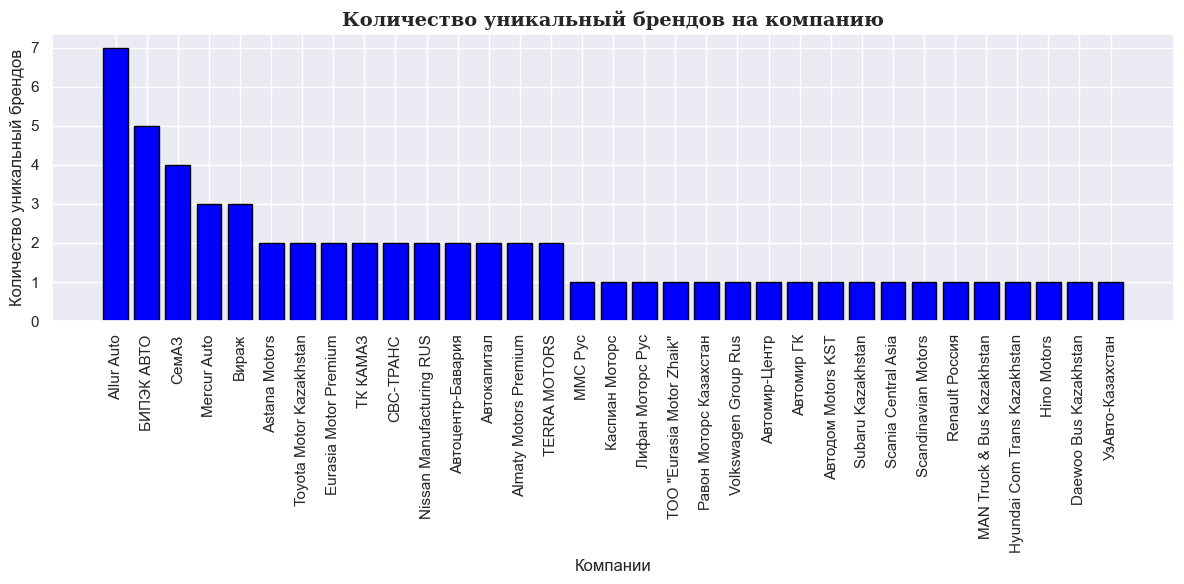

In [113]:
# cтолбчатая диаграмма для визуализации уникальных брендов по компаниям
plt.figure(figsize=(12, 6))
plt.bar(df_kz_group['company'], df_kz_group['brand'], color='blue', edgecolor='black')
plt.xlabel('Компании')
plt.ylabel('Количество уникальный брендов')
plt.title('Количество уникальный брендов на компанию', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**В Казахстане представлено всего 33 бренда. По большей части - 15 компаний являются многобрендовыми из них `Allur Auto` имеет 7 брендов, `БИПЭК АВТО` - 5 брендов, `СемАЗ`	- 4, `Mercur Auto` и `Вираж` по	3 бренда. Остальные 17 компании являются монобрендовыми.**

**Посморим количество моделей на компанию**

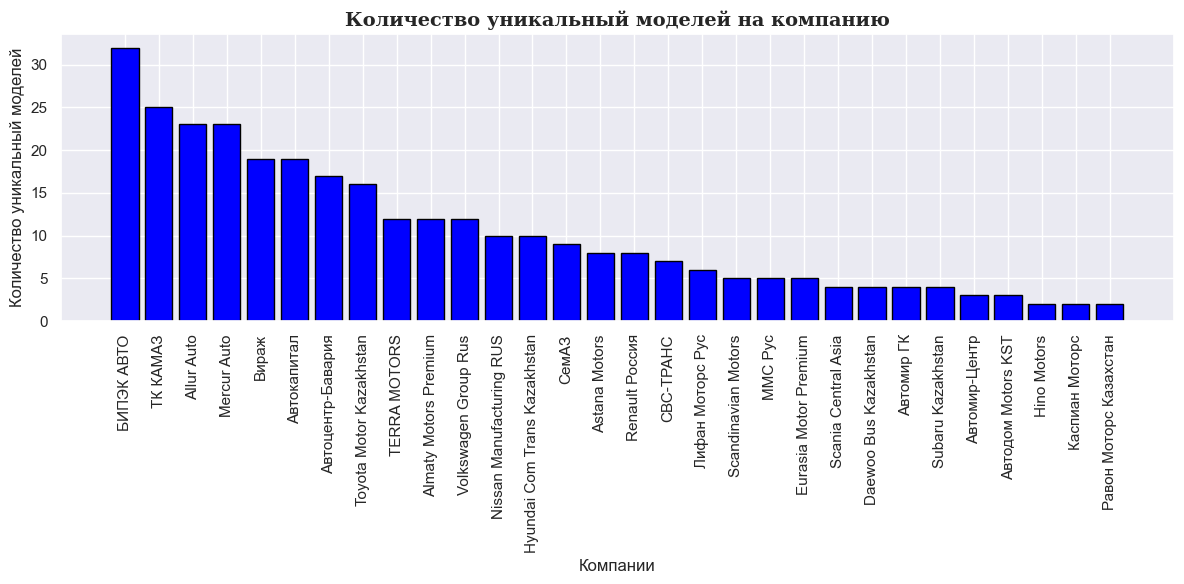

In [114]:
df_model_kz_group = df.groupby('company')['model'].nunique().sort_values(ascending=False).nlargest(30).reset_index()
df_model_kz_group

# cтолбчатая диаграмма для визуализации уникальных моделей по компаниям
plt.figure(figsize=(12, 6))
plt.bar(df_model_kz_group['company'], df_model_kz_group['model'], color='blue', edgecolor='black')
plt.xlabel('Компании')
plt.ylabel('Количество уникальный моделей')
plt.title('Количество уникальный моделей на компанию', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(True)
plt.show()

**По количеству моделей представленных на компанию в 4-ку лидеров входят компании, количество моделей у которых превышает 20 моделей, на первом месте `БИПЭК АВТО`, на втором месте `ТК КАКМАЗ`, на 3 месте `Allur Auto` и замыкает топ - `Mercur Auto`**

**Количество моделей представленных по брендам в Казахстане**

In [115]:
df_kz_group_1 = df.groupby('brand')['model'].nunique().sort_values(ascending=False).nlargest(15).reset_index()
df_kz_group_1

brand  model
0                 KAMAZ     24
1                   BMW     14
2         Mercedes-Benz     14
3            Volkswagen     13
4   Hyundai Truck & Bus     10
5                   UAZ     10
6                   GAZ      9
7                   Kia      9
8                   Jac      9
9                  Audi      9
10              Renault      8
11               Toyota      8
12                Lexus      8
13              Hyundai      7
14               Jaguar      7

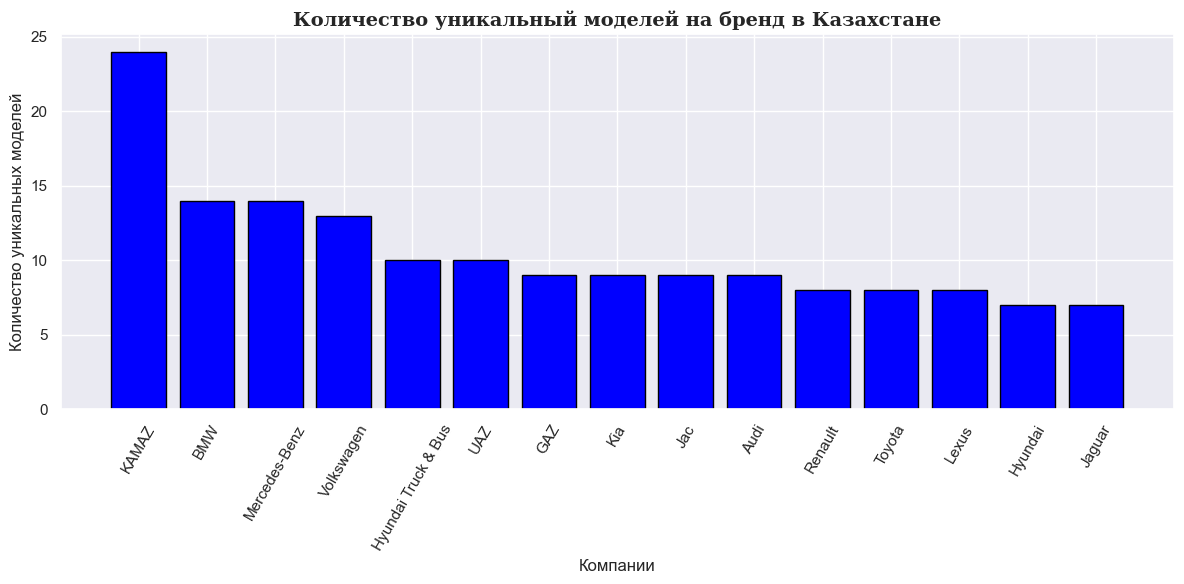

In [116]:
# cтолбчатая диаграмма для визуализации продаваемых уникальных моделей по брендам в Казахстане
plt.figure(figsize=(12, 6))
plt.bar(df_kz_group_1['brand'], df_kz_group_1['model'], color='blue', edgecolor='black')
plt.xlabel('Компании')
plt.ylabel('Количество уникальных моделей')
plt.title('Количество уникальный моделей на бренд в Казахстане', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.xticks(rotation=60)
plt.grid(True)
plt.tight_layout()
plt.show()

**По количеству моделей на бренд представленных на автомобильном рынке Казахстана лидирует КАМАЗ - 24 модели, 2 место у BMW и Mercedes-Benz - по 14 моделей, 3 место у Volkswagen - 13 моделей и по 10 моделей у Hyundai Trucks & Bus и UAZ**

**Количество брендов продаваемых в Казахстане по странам-производителям**

In [117]:
# посмотрим количество уникальных брендов стран-производителей продаваемых в Казахстане
df_mc_kz_group = df.groupby('manufacturing_country')['brand'].nunique().sort_values(ascending=False).reset_index()
df_mc_kz_group

manufacturing_country  brand
0   Республика Казахстан     21
1   Российская Федерация     19
2               Германия      7
3                 Япония      6
4                    США      6
5                     UK      4
6                Таиланд      3
7                Испания      2
8                  Китай      2
9                  Корея      2
10               Австрия      2
11               Венгрия      2
12                Турция      2
13            Узбекистан      2
14                Польша      1
15               Бельгия      1
16            Белоруссия      1
17                Швеция      1
18            Нидерланды      1

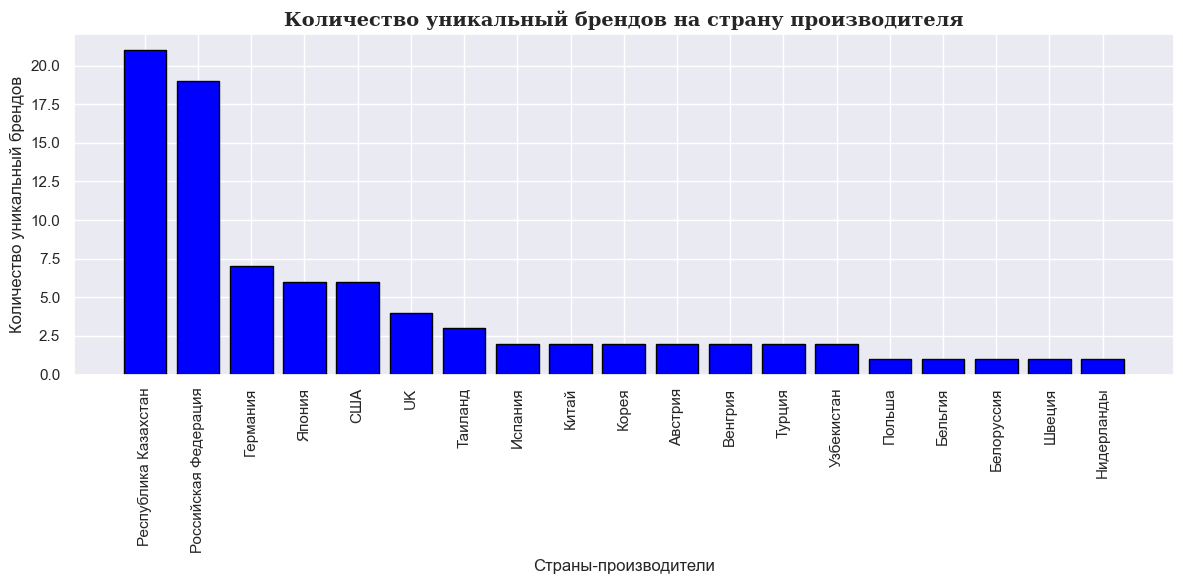

In [118]:
# cтолбчатая диаграмма для визуализации количества уникальных брендов стран-производителей продаваемых в Казахстане
plt.figure(figsize=(12, 6))
plt.bar(df_mc_kz_group['manufacturing_country'], df_mc_kz_group['brand'], color='blue', edgecolor='black')
plt.xlabel('Страны-производители')
plt.ylabel('Количество уникальный брендов')
plt.title('Количество уникальный брендов на страну производителя', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

**Крупнейшей страной-производителей по количеству автомобилей для своей страны является Казахстан - более 21 брендов, затем идет Россия - 19 брендов, Германия - 7 брендов и у Японии и США одинаковое количество - 6 брендов.**

**Какие области Казахстана являются лидерами по количеству продаваемых брендов**

In [119]:
# посмотрим количество уникальных брендов продаваемых в Казахстане
df_state_kz_group = df.groupby('state')['brand'].nunique().sort_values(ascending=False).reset_index()
df_state_kz_group

state  brand
0                         г.Алматы     40
1                     г.Нур-Султан     35
2             Костанайская область     27
3               Атырауская область     25
4           Карагандинская область     23
5   Восточно-Казахстанская область     21
6              Актюбинская область     19
7    Западно-Казахстанская область     18
8     Северо-Казахстанская область     17
9       Южно-Казахстанская область     17
10           Мангистауская область     17
11            Павлодарская область     17
12          Кызылординская область     15
13              Жамбылская область     13
14             Акмолинская область     13
15             Алматинская область      7
16                 Экспорт область      6
17           Туркестанская область      4

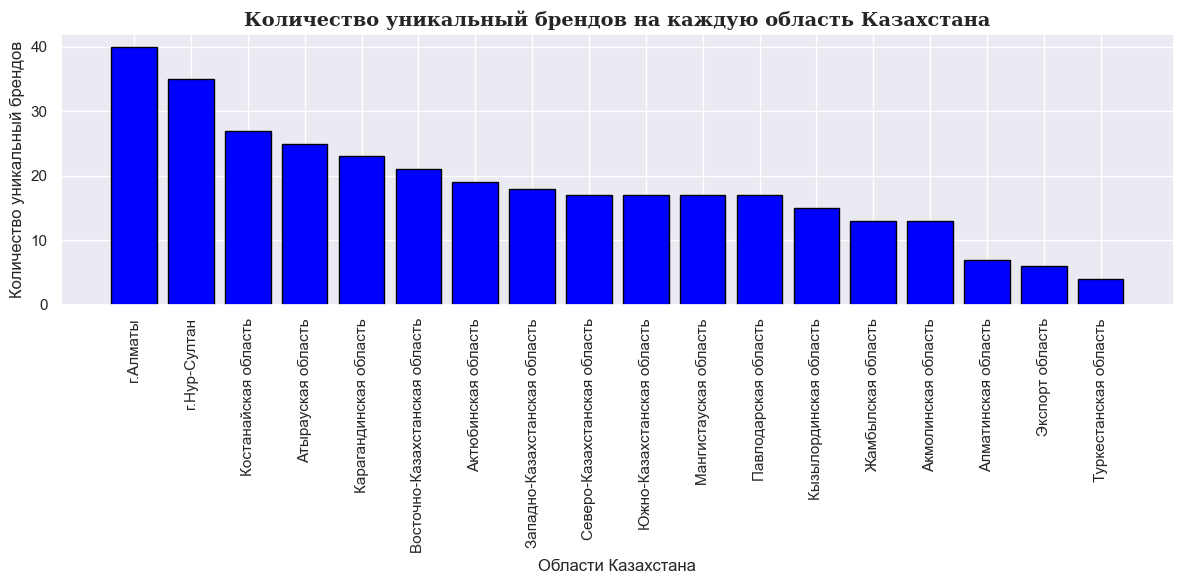

In [120]:
# cтолбчатая диаграмма для визуализации количества уникальных брендов продаваемых в Казахстане по каждой области
plt.figure(figsize=(12, 6))
plt.bar(df_state_kz_group['state'], df_state_kz_group['brand'], color='blue', edgecolor='black')
plt.xlabel('Области Казахстана')
plt.ylabel('Количество уникальный брендов')
plt.title('Количество уникальный брендов на каждую область Казахстана', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Лидерами по количеству продаваемых брендов с более чем 20 брендами являются крупнейшие города Казахстана:**
1. Алматы - 40
2. Нур-Султан - 35
3. Костанайская область	- 27
4. Атырауская область - 25
5. Карагандинская область - 23
6. Восточно-Казахстанская область - 21

**Распределение количества проданных автомобилей по месяцам продажи**

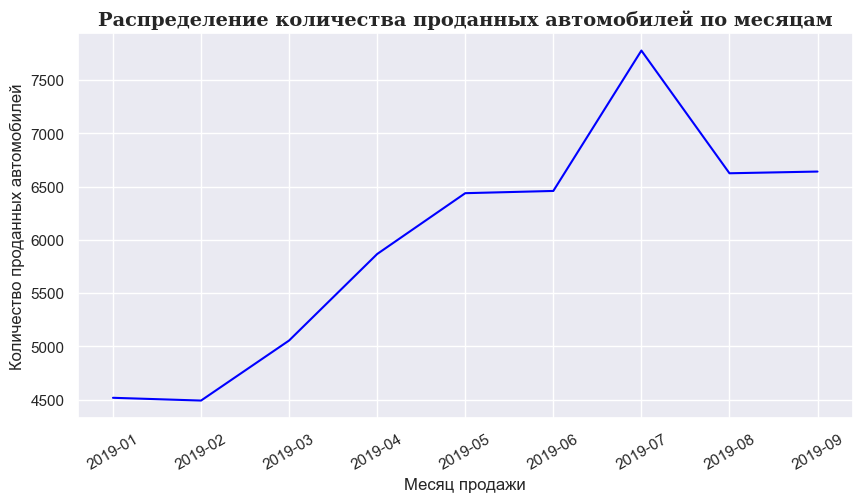

In [121]:
# группируем данные по месяцам и суммируем количество проданных автомобилей
monthly_sales = df.groupby('sale_date')['quantity'].sum()

# строим график распределения количества проданных автомобилей по месяцам
monthly_sales.plot(kind='line', figsize=(10, 5), color='blue')
plt.title('Распределение количества проданных автомобилей по месяцам', fontdict={'weight':'bold', 'size': 14, 'family':'serif'})
plt.xlabel('Месяц продажи')
plt.ylabel('Количество проданных автомобилей')
plt.xticks(rotation=30)
plt.show()

**По количеству проданных автомобилей по месяцам рост продаж (4500 автомобилей) наблюдается с марта 2019 года с пиком в июле - более 7500 авто, в мае, июне, августе и сентябре продажи находятся примерно на одинаковом уровне - в районе 6500 авто**

**Распределения автомобилей по объему двигателя**

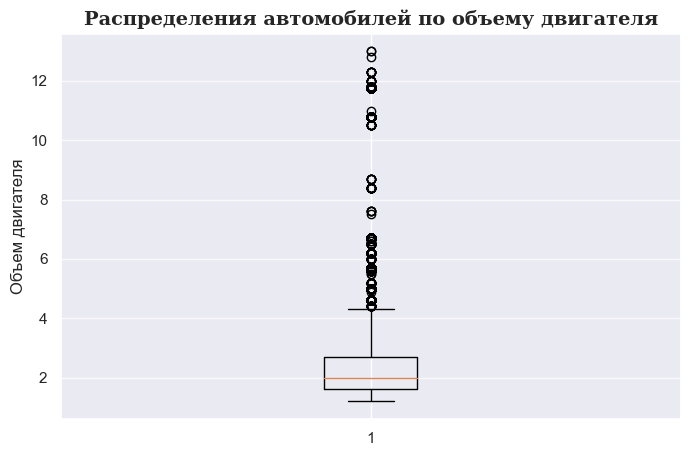

In [122]:
plt.figure(figsize=(8, 5))
plt.boxplot(df.query('engine_volume > 0').engine_volume)
plt.title('Распределения автомобилей по объему двигателя', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.ylabel('Объем двигателя')
plt.grid(axis='y', alpha=0.75)
plt.show()

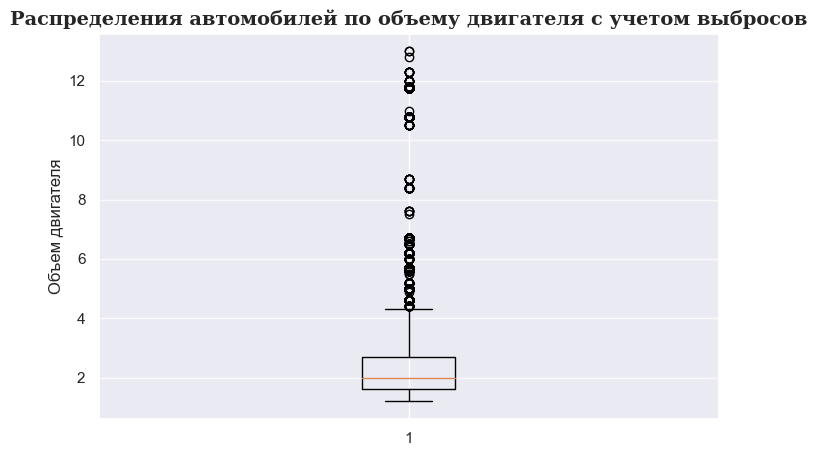

count   39767.00
mean        2.44
std         1.44
min         1.20
25%         1.60
50%         2.00
75%         2.69
max        13.00
Name: engine_volume, dtype: float64

In [123]:
# удаление выбросов и пропущенных значений
data_clean = df[(df['engine_volume'] > 0) & (df['engine_volume'].notnull())]

# построение боксплота с учетом выбросов
plt.figure(figsize=(8, 5))
plt.boxplot(data_clean['engine_volume'])
plt.title('Распределения автомобилей по объему двигателя с учетом выбросов', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.ylabel('Объем двигателя')
plt.grid(axis='y', alpha=0.75)
plt.show()

data_clean['engine_volume'].describe()

**Из графика распределения автомобилей по объему двигателя двигателя видно, что:**
* Минимальный объём двигателя для автомобилей в Казахстане составляет 1,2 литра
* Наиболее востребованными автомобилями на автомобильном рынке Казахстана являются 2 литровые автомобили
* Максимальный объём двигателей для рынка Казахстана - это грузовые автомобили - 13 литров

**Распределение цены на автомобили**

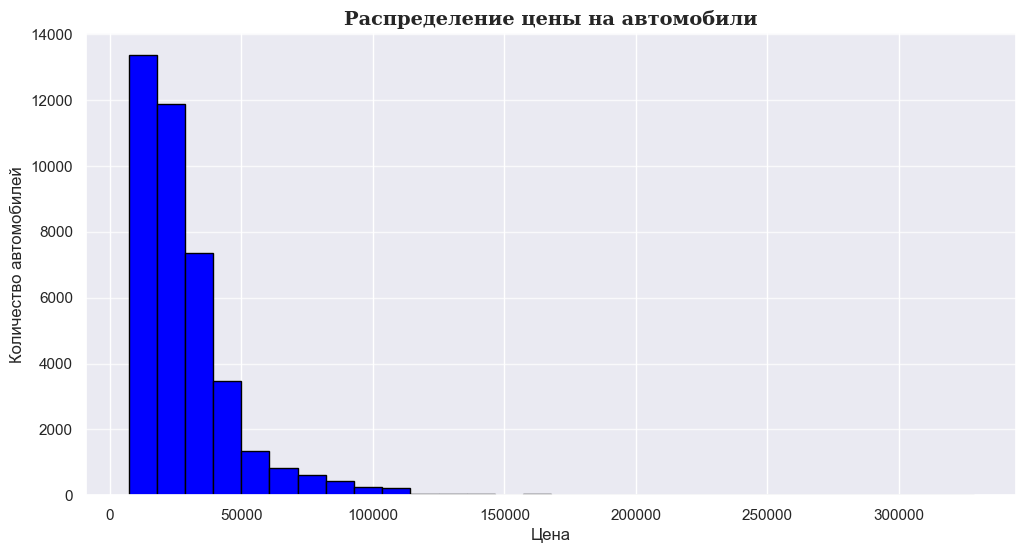

In [124]:
# визуализация распределения цены на автомобили
plt.figure(figsize=(12, 6))
plt.hist(df['price_usd'], bins=30, color='blue', edgecolor='black')
plt.title('Распределение цены на автомобили', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.xlabel('Цена')
plt.ylabel('Количество автомобилей')
plt.grid(axis='y', alpha=0.75)
plt.show()

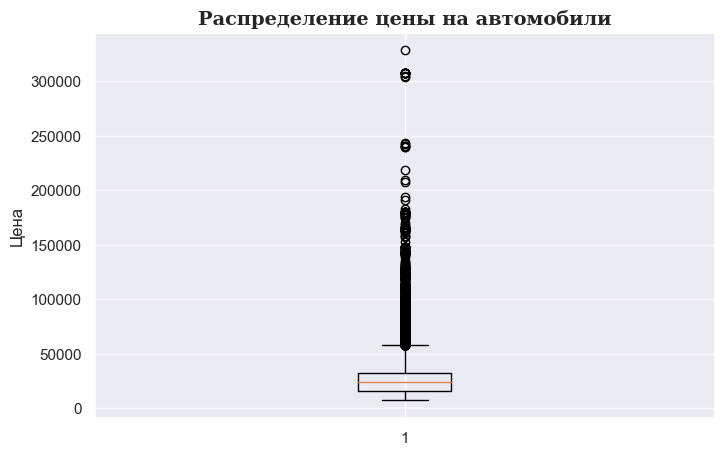

In [125]:
# построение распределения цены на автомобили
plt.figure(figsize=(8, 5))
plt.boxplot(df['price_usd'])
plt.title('Распределение цены на автомобили', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.ylabel('Цена')
plt.grid(axis='y', alpha=0.75)
plt.show()

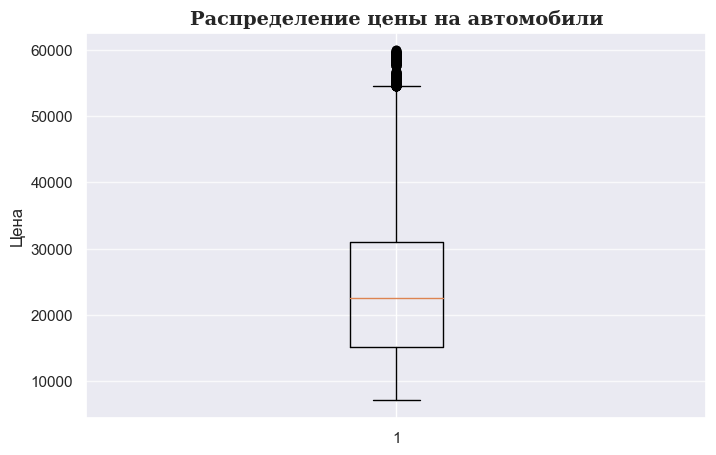

In [126]:
# удаление выбросов и пропущенных значений
df_clean = df[(df['price_usd'] < 60000) & (df['engine_volume'].notnull())]

# построение боксплота распределения цены на автомобили
plt.figure(figsize=(8, 5))
plt.boxplot(df_clean['price_usd'])
plt.title('Распределение цены на автомобили', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.ylabel('Цена')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [127]:
df_clean['price_usd'].describe()

count   37402.00
mean    24330.69
std     11526.32
min      7100.00
25%     15156.37
50%     22485.87
75%     30936.80
max     59958.07
Name: price_usd, dtype: float64

**Из графика распределения цен на автомобили наблюдаем:**
* Наиболее часто автомобиль в Казахстане стоит в районе 22500 долларов
* Самый дешёвый автомобиль стоит 7100 долларов
* Дорогой - 60000 долларов

**Распределение типов привода по регионам продажи**

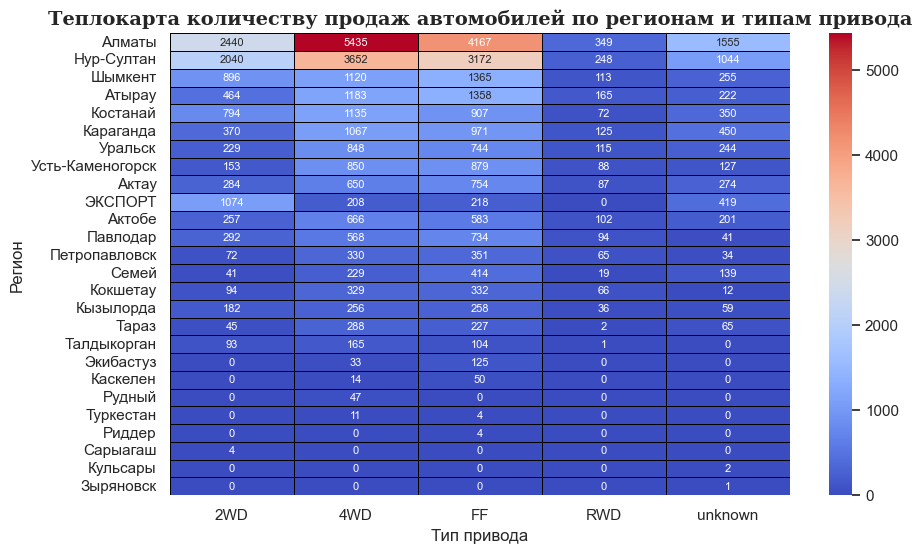

In [128]:
df['quantity'] = df['quantity'].astype(int)

pivot_table = df.pivot_table(index='region', columns='drive_type', values='quantity', aggfunc='sum', fill_value=0)

# cортировка по количеству продаж по типу привода
pivot_table = pivot_table.reindex(pivot_table.sum(axis=1).sort_values(ascending=False).index, axis=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='d', linewidths=.5, linecolor='black', yticklabels=True, \
            annot_kws={'size': 8, 'ha': 'center', 'va': 'center'})
plt.title('Теплокарта количеству продаж автомобилей по регионам и типам привода', fontdict={'weight':'bold', 'size': 14, 'family':'serif'})
plt.xlabel('Тип привода')
plt.ylabel('Регион')
plt.show()

**Из графика распределения типов привода по регионам продажи имеем:**  
* Алматы лидер по количеству проданных автомобилей с полным приводом - 5435 шт, следующий город по количеству полноприводных автомобилей - Нур-Султан - чуть более 3652 шт
* По количеству переднеприводных автомобилей с небольшим отрывом лидирует Алматы - 4167 шт, затем идет Нур-Султан - немногим более 3172 шт
* По количеству автомобилей с приводом либо на переднюю, либо заднюю ось также лидирует Алматы - 2440 шт, далее идет Нур-Султан - немногим более 2000 шт
* Заднеприводных автомобилей очень мало по 250 - 350 штук также в Алматы и Нур-Султане, в остальных регионах еще меньше

**Построим матрицу корреляции для выявления зависимостей между признаками, влияющими на продажи автомобилей в Казахстане**

Изменение категориальных переменных для необходимых столбцов в фиктивные переменные со значением 1/0 понадобится для того, чтобы в дальнейшейм вычислять корреляции между этими переменными и другими данными.

In [129]:
f_corr = df[['fuel_type', 'engine_volume', 'transmission_type', 'drive_type', 'price_usd', \
                 'sell_price_usd', 'segment_2013']]

In [130]:
# применение one-hot encoding для категориальной не ранговой переменной 'fuel_type'
f_corr = pd.get_dummies(f_corr, columns=['fuel_type'], prefix='fuel')

# оставляем только те строки, где значение столбца 'engine_volume' больше 0
f_corr = f_corr[f_corr['engine_volume'] > 0]

# создадим интервалы, которые будут интерпретироваться как порядковые ранги
f_corr.engine_volume = pd.cut(f_corr.engine_volume, bins=[0, 1, 3, 16], labels=False, right=False)

# применение one-hot encoding для категориальной не ранговой переменной 'transmission_type'
f_corr = pd.get_dummies(f_corr, columns=['transmission_type'], prefix='transmission')

# применение one-hot encoding для категориальной не ранговой переменной 'drive_type'
f_corr = pd.get_dummies(f_corr, columns=['drive_type'], prefix='drive')

# применение one-hot encoding для категориальной не ранговой переменной 'segment_2013'
f_corr = pd.get_dummies(f_corr, columns=['segment_2013'], prefix='segment')

Чертим матрицу. Будем использовать корреляцию Кендалла, т.к. она подходит для оценки связи между ранговыми переменными или переменными с ненормальным распределением - Кендалл менее чувствителен к выбросам и распределению.

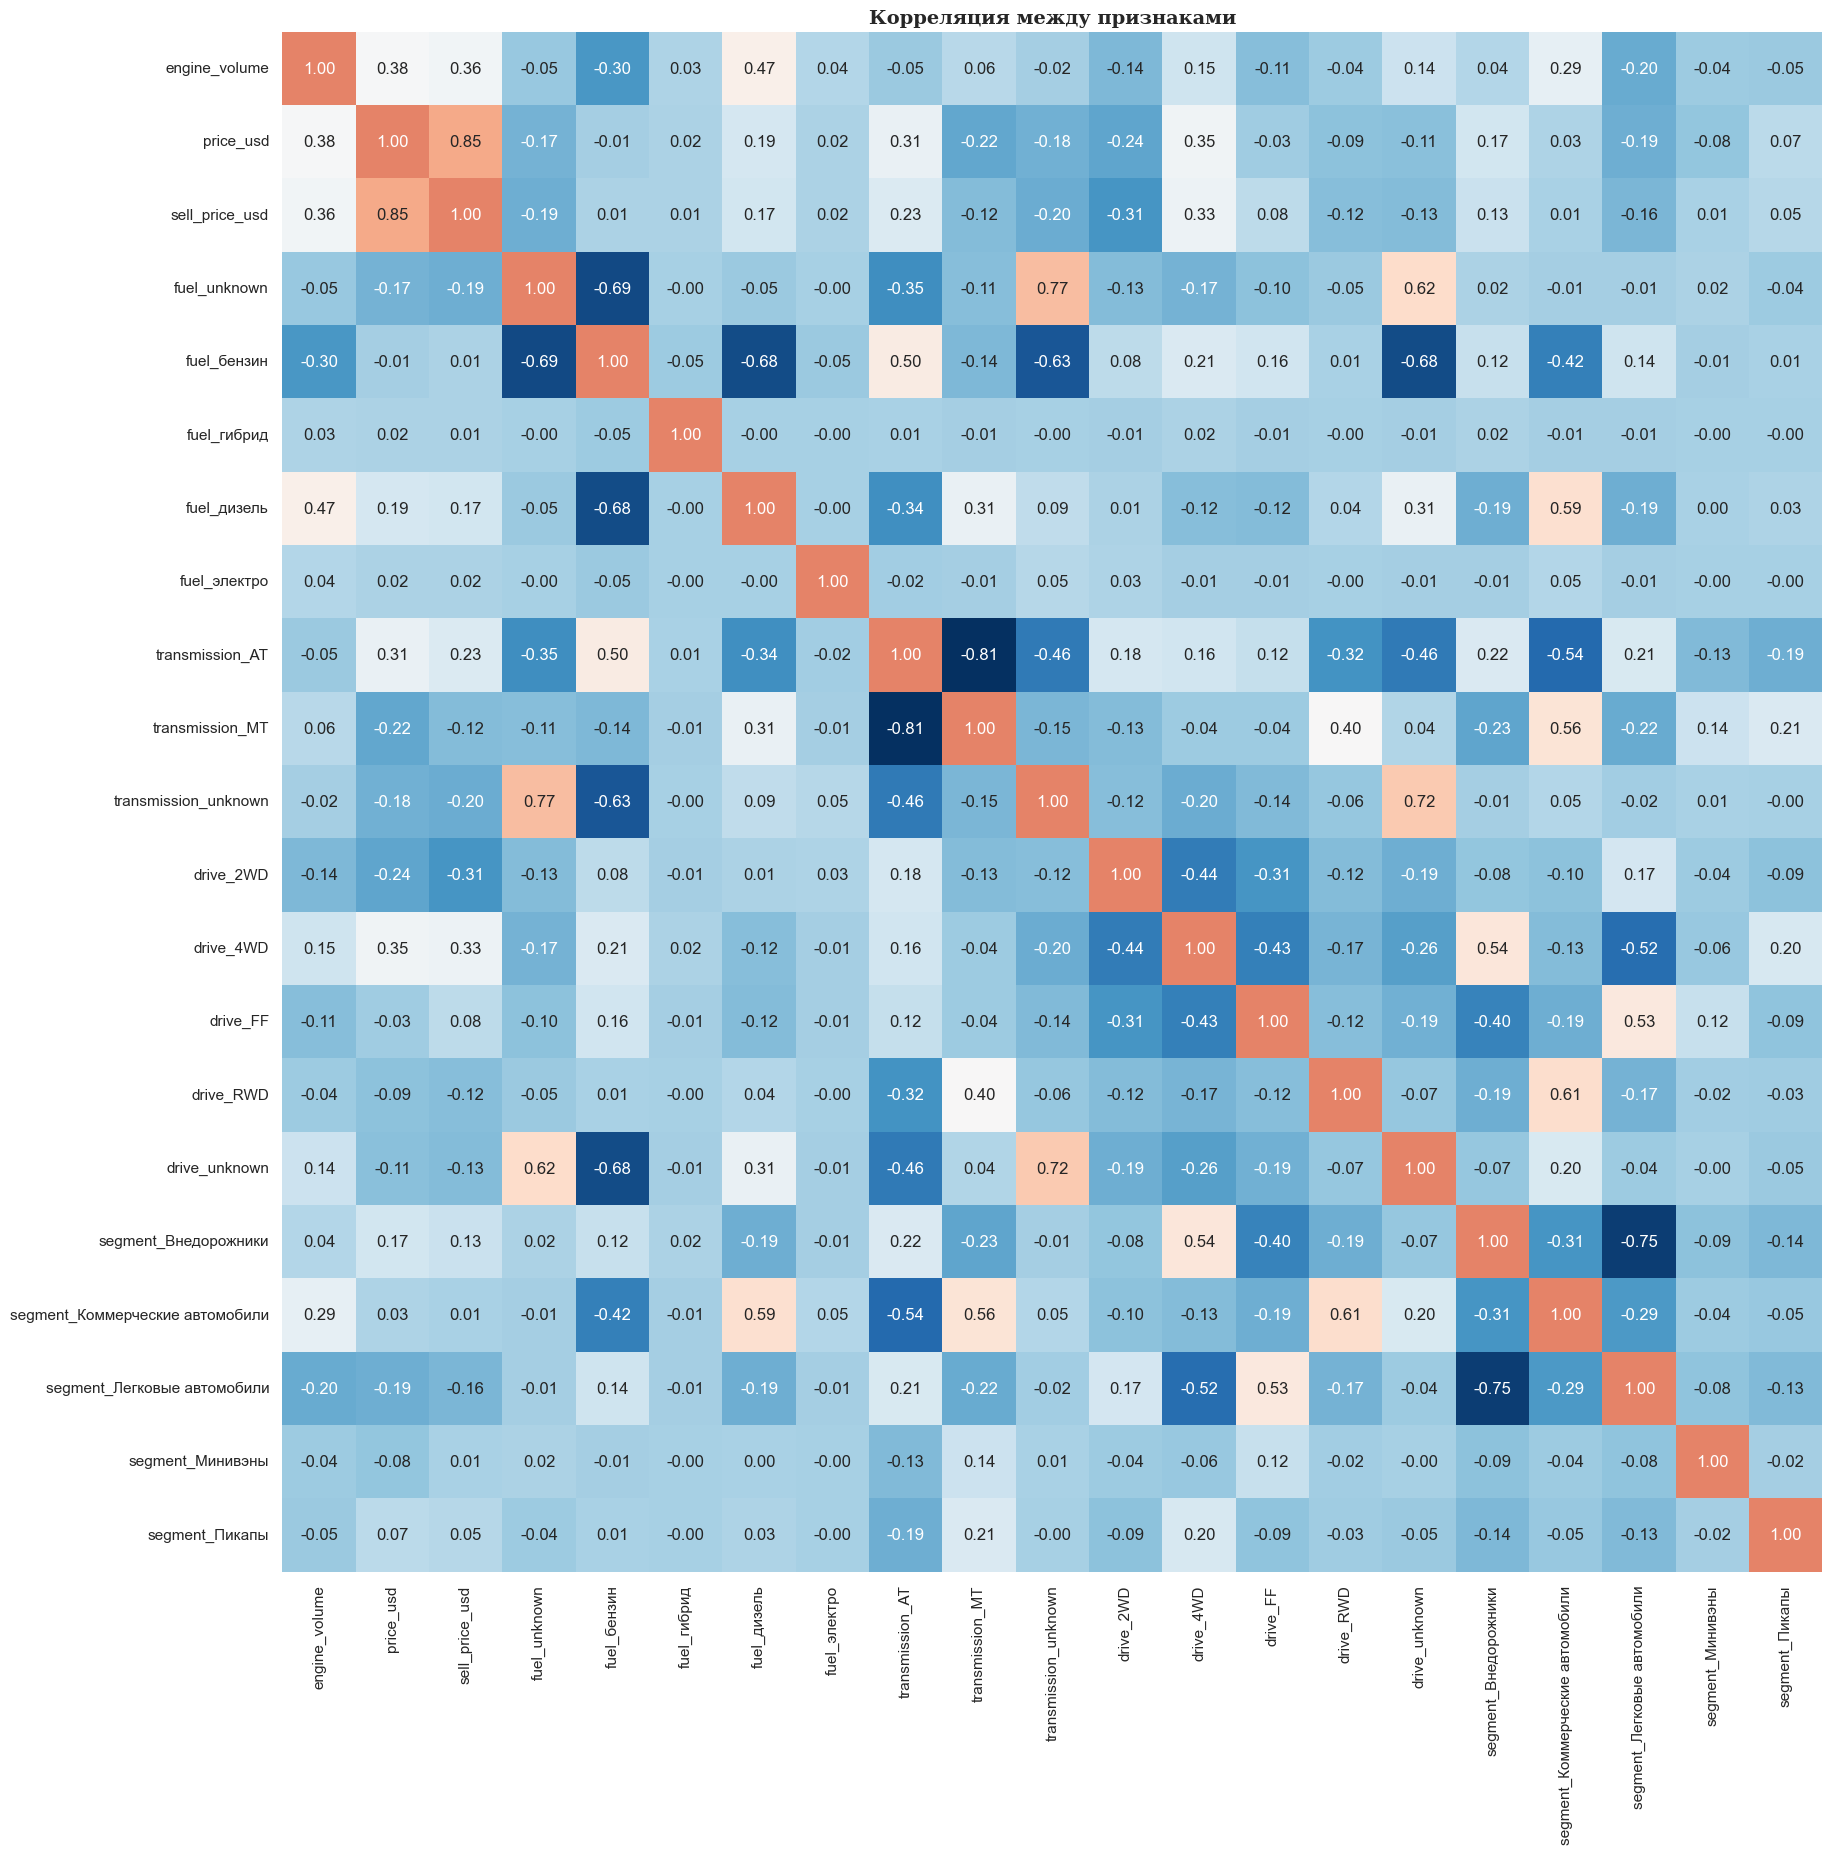

In [157]:
plt.figure(figsize=(20, 20))
plt.title('Корреляция между признаками', font={'weight':'bold', 'size': '14', 'family':'serif'})
sns.heatmap(f_corr.corr(method='kendall'), square=True, cbar=False, annot=True, fmt=".2f", cmap='RdBu_r', center=0.4);

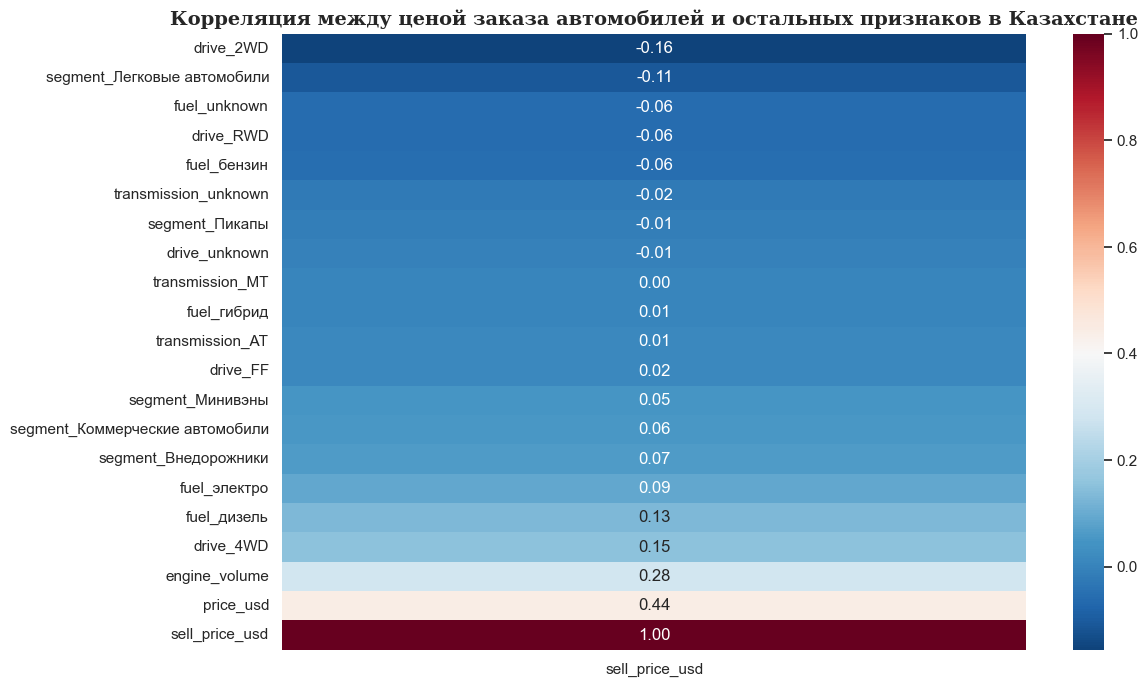

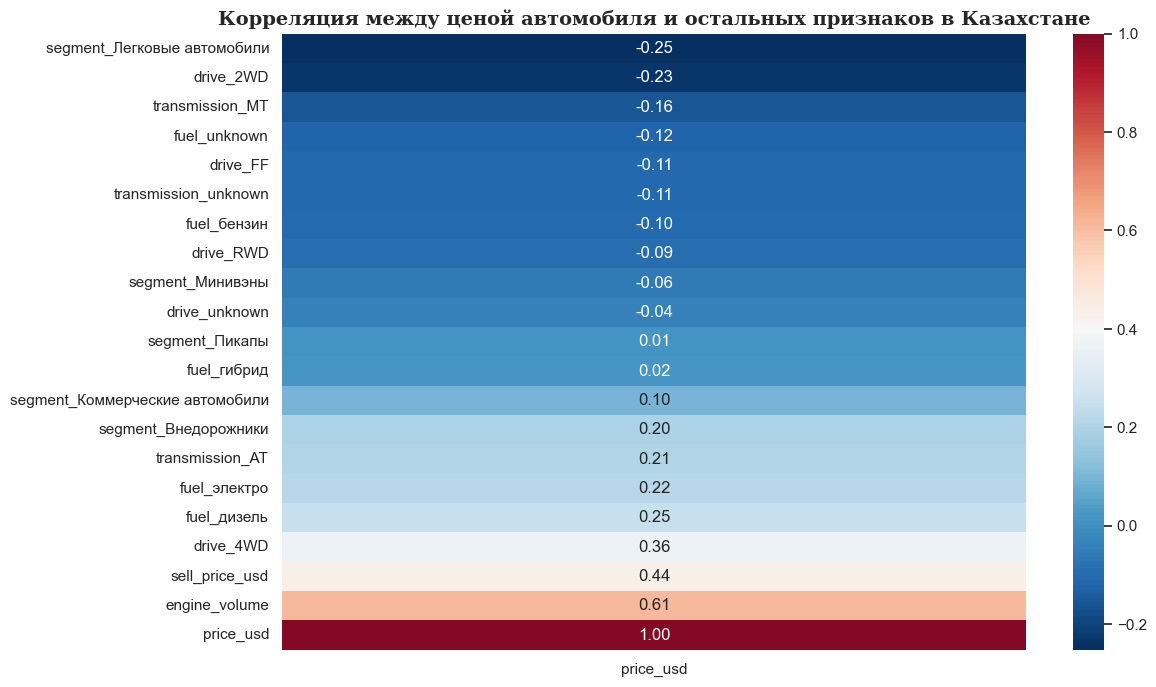

In [158]:
# тепловая карта корреляции с учетом 'sell_price_usd'
plt.figure(figsize=(12, 8))  # увеличим размер графика
sns.heatmap(f_corr.corr()[['sell_price_usd']].sort_values('sell_price_usd'), annot=True, fmt=".2f", cmap='RdBu_r', center=.4)
plt.title('Корреляция между ценой заказа автомобилей и остальных признаков в Казахстане', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.show()

# тепловая карта корреляции с учетом 'price_usd'
plt.figure(figsize=(12, 8))  # увеличим размер графика
sns.heatmap(f_corr.corr()[['price_usd']].sort_values('price_usd'), annot=True, fmt=".2f", cmap='RdBu_r', center=.4)
plt.title('Корреляция между ценой автомобиля и остальных признаков в Казахстане', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.show()

**Из представленной матрицы корреляции между признаками видно, что явной линейной связи между признаками не прослеживается, небольшая положительная связь наблюдается между признаками: цена - стоимость заказа 0.44, что вполне логично; и цена - объем двигателя 0.61**

**Вывод по исследовательскому анализу данных:**  
Исследовательский анализ данных, проведенный на автомобильном рынке Казахстана с начала 2019 года по сентябрь 2019 года, позволяет сделать следующие основные выводы:

1. Общее количество проданных автомобилей составляет 53870 штук, а общий объем денежных средств, потраченных на покупку автомобилей, составляет 1 349 016 452 долларов США.

2. На рынке представлено 33 бренда, причем большинство компаний являются многобрендовыми. Лидерами по количеству брендов являются Allur Auto, БИПЭК АВТО, СемАЗ, Mercur Auto и Вираж.

3. БИПЭК АВТО лидирует по количеству моделей на компанию с более чем 20 моделями, за ним следуют ТК КАМАЗ, Allur Auto и Mercur Auto.

4. КАМАЗ является лидером по количеству моделей на бренд с 24 моделями, за ним следуют BMW и Mercedes-Benz (по 14 моделей).

5. Казахстан, Россия, Германия, Япония и США - крупнейшие страны-производители по количеству автомобилей.

6. Крупнейшие города Казахстана - Алматы, Нур-Султан, Костанайская область и другие - лидируют по количеству продаваемых брендов с более чем 20 брендами.

7. Рост продаж автомобилей наблюдается с марта 2019 года, с пиком в июле, и стабилизацией на уровне около 6500 автомобилей в мае, июне, августе и сентябре.

8. Наиболее востребованными двигателями на рынке Казахстана являются двигатели объемом 2 литра.

9. Средняя цена автомобиля в Казахстане составляет около 22500 долларов, при этом диапазон цен варьируется от 7100 до 60000 долларов.

10. В различных регионах продажи автомобилей преобладают различные типы привода: полноприводные, переднеприводные и другие.

11. Из матрицы корреляции видно небольшую положительную связь между ценой автомобиля и его объемом двигателя.

**Исходя из этих данных можно сделать вывод, что автомобильный рынок Казахстана динамичен и разнообразен, с различными предпочтениями потребителей в зависимости от региона и типа автомобиля. Анализ данных позволяет выявить тенденции и особенности рынка, что может быть полезно для дальнейшего планирования маркетинговых стратегий и развития автомобильной индустрии в стране.**

# Анализ рынка (делим на коммерческий и некоммерческий транспорт)

Емкость рынка автомобилей: в денежном и количественном выражении;   
Марки лидеры на рынке автомобилей;  
Динамика рынка: общая, по сегментам;    
Продажи автомобилей в разрезе бренд / сегмент;   
Продажи по маркам;  
Продажи по регионам;  
Проверить гипотезу: стоимость автомобиля зависит от уровня развития региона (средней заработной платы по региону);  
Продажи автоцентров.

**Емкость рынка автомобилей: в денежном и количественном выражении**

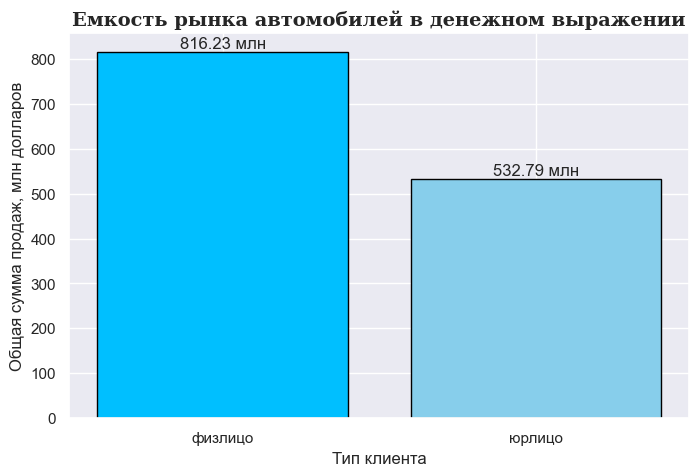

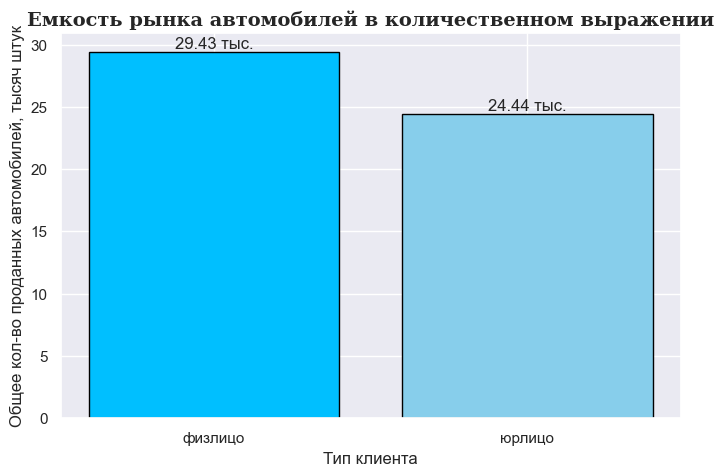

In [133]:
# группировка данных по типу клиента (коммерческий и некоммерческий)
grouped = df.groupby('client_type').agg({'sell_price_usd': 'sum', 'quantity': 'sum'})

# визуализация емкости рынка автомобилей в денежном выражении
plt.figure(figsize=(8, 5))
plt.bar(grouped.index, grouped['sell_price_usd']/1000000, color=['deepskyblue', 'skyblue'], edgecolor='black')
plt.xlabel('Тип клиента')
plt.ylabel('Общая сумма продаж, млн долларов')
plt.title('Емкость рынка автомобилей в денежном выражении', font={'weight':'bold', 'size': '14', 'family':'serif'})

# добавляем общую сумму продаж над столбцом
for i, value in enumerate(grouped['sell_price_usd']):
    plt.text(i, value/1000000, f'{value/1000000:.2f} млн', ha='center', va='bottom')

plt.show()

# визуализация емкости рынка автомобилей в количественном выражении
plt.figure(figsize=(8, 5))
plt.bar(grouped.index, grouped['quantity']/1000, color=['deepskyblue', 'skyblue'], edgecolor='black')
plt.xlabel('Тип клиента')
plt.ylabel('Общее кол-во проданных автомобилей, тысяч штук')
plt.title('Емкость рынка автомобилей в количественном выражении', font={'weight':'bold', 'size': '14', 'family':'serif'})

# добавляем общее количество проданных автомобилей над столбцом
for i, value in enumerate(grouped['quantity']):
    plt.text(i, value/1000, f'{value/1000:.2f} тыс.', ha='center', va='bottom')

plt.show()

**Из визуализации емкости рынка в денежном выражении можно сказать, что физические лица потратили на покупку авто - 816,2 млн долларов, юрлица - 532,8 млн долларов**  
**Из визуализации емкости рынка в количественном выражении можно сказать, что физические лица купили 29,43 тыс. авто, юрлица - 24,44 тыс. авто**

**Марки лидеры на рынке автомобилей**

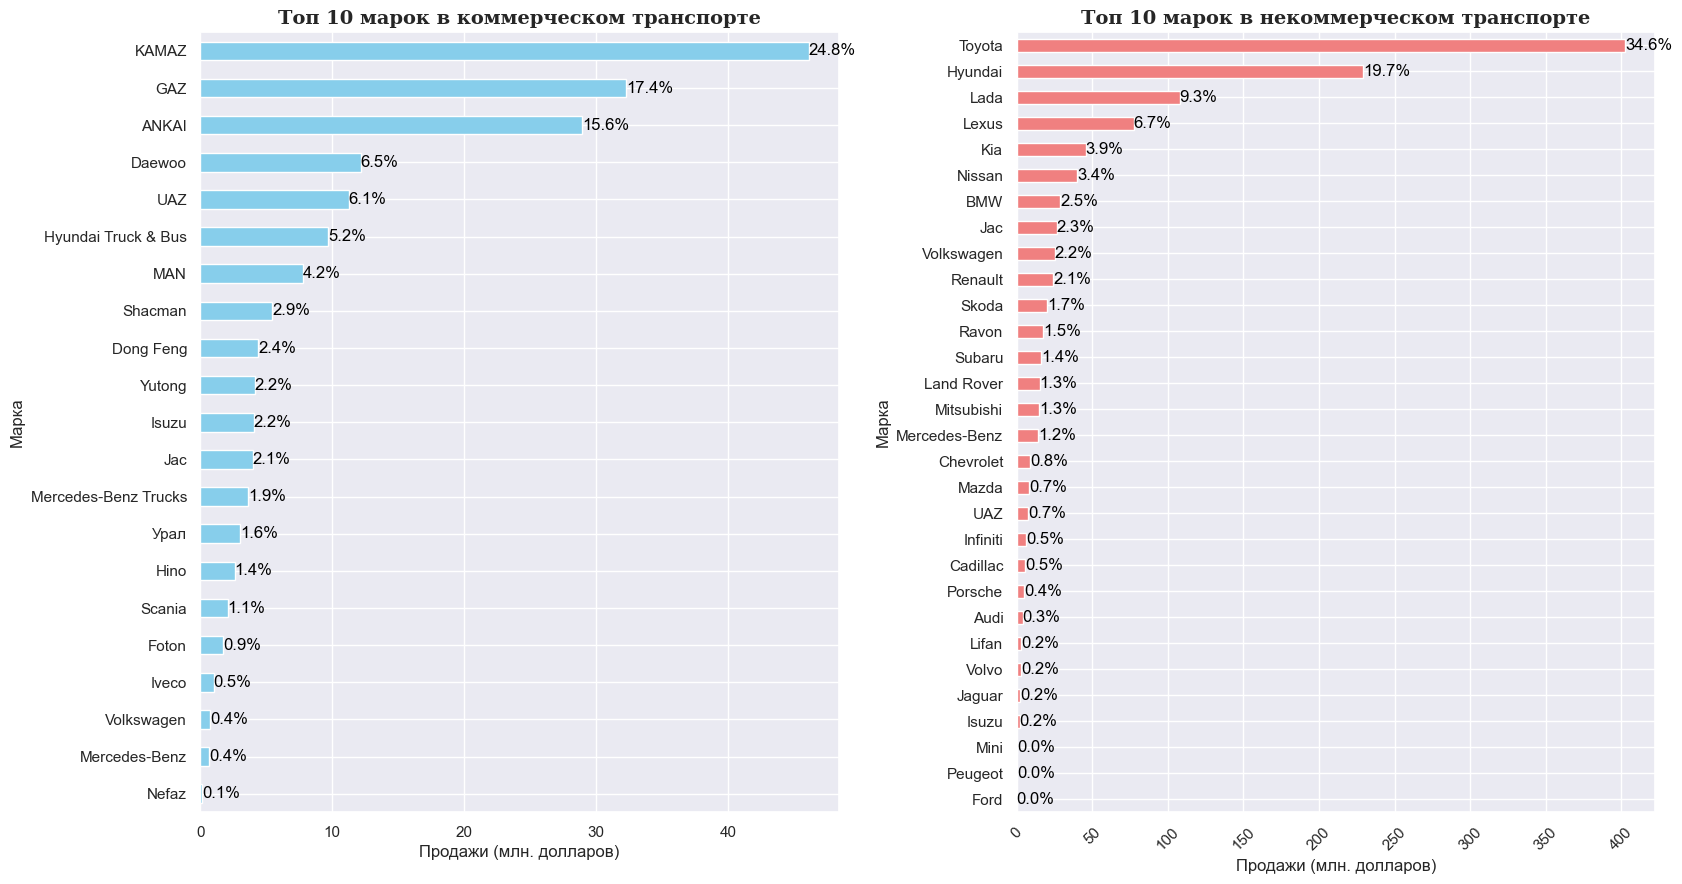

In [134]:
df['sell_price_usd'] = df['sell_price_usd']/1000000

# сгруппируем данные по маркам и типу клиента
com = df.loc[df['segment_2013'] == "Коммерческие автомобили"].groupby('brand')['sell_price_usd'].sum().sort_values()
not_com = df.loc[df['segment_2013'] != "Коммерческие автомобили"].groupby('brand')['sell_price_usd'].sum().sort_values()

# Построим графики
plt.figure(figsize=(17, 9))

plt.subplot(1, 2, 1)
com.plot(kind='barh', color='skyblue')
for i, v in enumerate(com):
    plt.text(v, i, f'{(v/com.sum()*100):.1f}%', color='black', ha='left', va='center')
plt.title('Топ 10 марок в коммерческом транспорте', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.xlabel('Продажи (млн. долларов)')
plt.ylabel('Марка')

plt.subplot(1, 2, 2)
not_com.plot(kind='barh', color='lightcoral')
for i, v in enumerate(not_com):
    plt.text(v, i, f'{(v/not_com.sum()*100):.1f}%', color='black', ha='left', va='center')
plt.title('Топ 10 марок в некоммерческом транспорте', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.xlabel('Продажи (млн. долларов)')
plt.xticks(rotation=45)
plt.ylabel('Марка')

plt.tight_layout()
plt.show()

**Марками лидеры на рынке автомобилей среди коммерческих автомобилей являются:**
* КАМАЗ - 24,8%
* GAZ - 17,4%
* ANKAI - 15,6%

**Марками лидеры на рынке автомобилей среди некоммерческих автомобилей являются:**
* TOYOTA - 34,6%
* Hyundai - 19,7%
* Lada - 9,3%

**Динамика рынка общая и по сегментам**

*Динамика рынка общая*

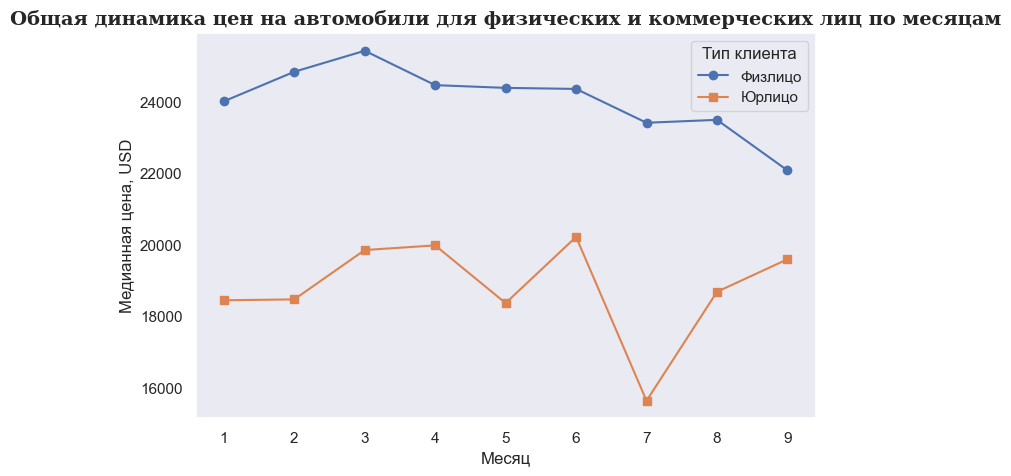

In [135]:
# преобразуем столбец 'sale_date' в формат datetime для сортировки значений
df['sale_date'] = pd.to_datetime(df['sale_date'], format='%Y-%m')

df_individ_price = df.loc[(df["client_type"] == "физлицо") & (df["price_usd"].notnull()) & (df["price_usd"] < 58000)]
df_commerc_price = df.loc[(df["client_type"] == "юрлицо") & (df["price_usd"].notnull()) & (df["price_usd"] < 75000)]

# группировка данных по месяцам и ценам
grouped_df_individ = df_individ_price.groupby('month')['price_usd'].median()
grouped_df_commerc = df_commerc_price.groupby('month')['price_usd'].median()

# построение графика
plt.figure(figsize=(8, 5))
plt.plot(grouped_df_individ.index, grouped_df_individ.values, label='Физлицо', marker='o')
plt.plot(grouped_df_commerc.index, grouped_df_commerc.values, label='Юрлицо', marker='s')
plt.xlabel('Месяц')
plt.ylabel('Медианная цена, USD')
plt.title('Общая динамика цен на автомобили для физических и коммерческих лиц по месяцам', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.legend(title='Тип клиента')
plt.grid()
plt.show()

**Из графика динамики цен на автомобили за 2019 год для физических и коммерческих лиц по месяцам можно сделать выводы:**
* Так как мы знаем из исследовательского анализа дынных, что наибольший пик продаж автомобилей пришелся на июль 2019 года, по графику заметна тенденция на снижение медианной цены для физических лиц на автомобиль начиная с марта 2019 года (около 25000 долларов) с наименьшими ценами в июле и августе - немногим менее 24000 долларов и сентябре - 22000 долларов
* Июль 2019 года для юридических лиц стал наиболее выгодным с точки зрения цен для приобретения автомобилей - менее 16000 долларов за автомобиль

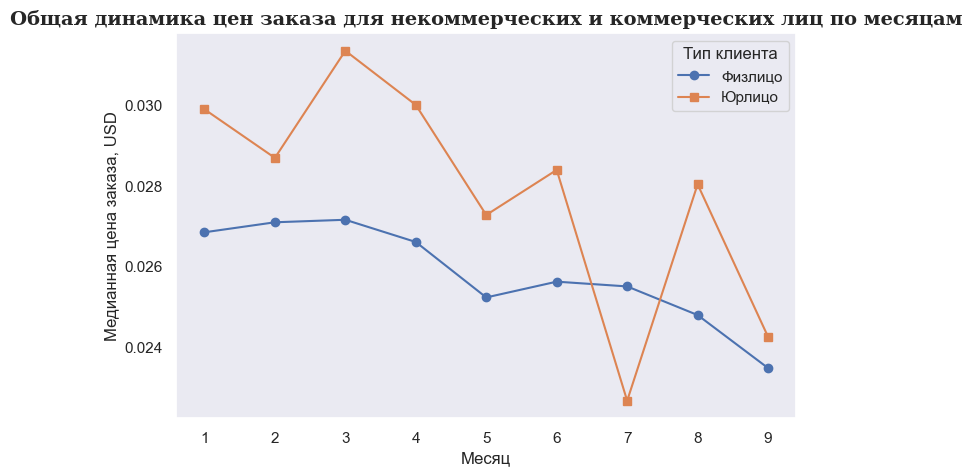

In [136]:
df_individ_sell = df.loc[(df["client_type"] == "физлицо") & (df["sell_price_usd"].notnull())]
df_commerc_price = df.loc[(df["client_type"] == "юрлицо") & (df["sell_price_usd"].notnull())]

# группировка данных по месяцам и ценам
grouped_df_individ_sell = df_individ_sell.groupby('month')['sell_price_usd'].median()
grouped_df_commerc_price = df_commerc_price.groupby('month')['sell_price_usd'].median()

# построение графика
plt.figure(figsize=(8, 5))
plt.plot(grouped_df_individ_sell.index, grouped_df_individ_sell.values, label='Физлицо', marker='o')
plt.plot(grouped_df_commerc_price.index, grouped_df_commerc_price.values, label='Юрлицо', marker='s')
plt.xlabel('Месяц')
plt.ylabel('Медианная цена заказа, USD')
plt.title('Общая динамика цен заказа для некоммерческих и коммерческих лиц по месяцам', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.legend(title='Тип клиента')
plt.grid()
plt.show()

**Из графика динамики цен заказа для некоммерческих и коммерческих лиц по месяцам следуют выводы:**
* Так как кривая медианной цены заказа напоминает кардиограмму сердца больного человека с явным минимумом в июле 2019 года, можно заметить, что данный месяц для юридических лиц стал просто подарком, потому что медианная цена заказа для юридических лиц ниже, чем для физических лиц - ниже 22 млн долларов
* Для физических лиц кривая медианной цены заказа идет волнообразно, но менее оптимистично, нежели для юрлиц с минимумом в сентябре 2019 года - немногим более 24 млн долларов

*Динамика рынка по сегментам*

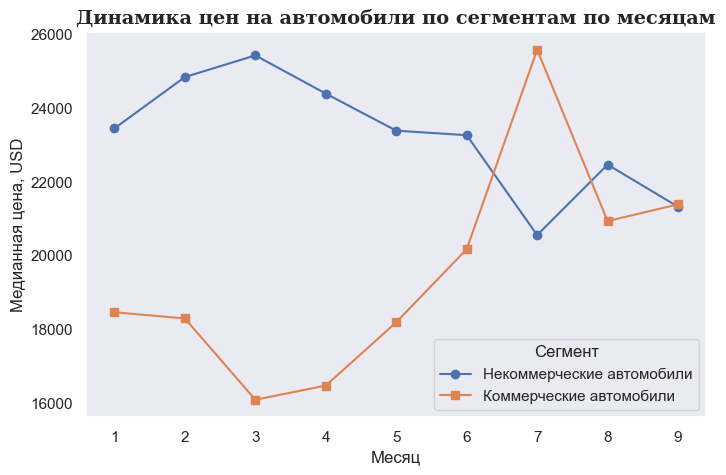

In [137]:
df_individ_price_nc = df.loc[(df['segment_2013'] != "Коммерческие автомобили") & (df["price_usd"].notnull()) & (df["price_usd"] < 58000)]
df_commerc_price_c = df.loc[(df['segment_2013'] == "Коммерческие автомобили") & (df["price_usd"].notnull()) & (df["price_usd"] < 75000)]

# группировка данных по месяцам и ценам
grouped_df_individ = df_individ_price_nc.groupby('month')['price_usd'].median()
grouped_df_commerc = df_commerc_price_c.groupby('month')['price_usd'].median()

# построение графика
plt.figure(figsize=(8, 5))
plt.plot(grouped_df_individ.index, grouped_df_individ.values, label='Некоммерческие автомобили', marker='o')
plt.plot(grouped_df_commerc.index, grouped_df_commerc.values, label='Коммерческие автомобили', marker='s')
plt.xlabel('Месяц')
plt.ylabel('Медианная цена, USD')
plt.title('Динамика цен на автомобили по сегментам по месяцам', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.legend(title='Сегмент')
plt.grid()
plt.show()

**Из графика динамики цен на автомобили по сегментам по месяцам следует:**
* Медианная цена на некоммерческие автомобили имела пик в марте и составляла около 26000 долларов, и минимум в июле - немногим более 20000 долларов. Таким образом июль являлся самым выгодным временем 2019 года для покупки некоммерческого транспорта
* Медианная цена на коммерческие автомобили имела пик в июле и составляла около 26000 долларов, и минимум в марте - немногим более 16000 долларов. Таким образом март являлся самым выгодным временем 2019 года для покупки коммерческого транспорта.

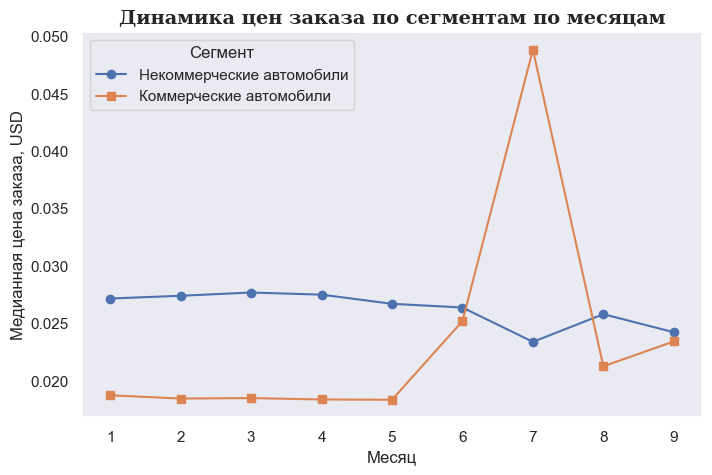

In [138]:
df_individ_sell_nc = df.loc[(df['segment_2013'] != "Коммерческие автомобили") & (df["sell_price_usd"].notnull())]
df_commerc_price_c = df.loc[(df['segment_2013'] == "Коммерческие автомобили") & (df["sell_price_usd"].notnull())]

df.loc[df['segment_2013'] == "Коммерческие автомобили"].groupby(['sale_date', 'brand'])['sell_price_usd'].sum()

# группировка данных по месяцам и ценам
grouped_df_nc = df_individ_sell_nc.groupby('month')['sell_price_usd'].median()

grouped_df_c = df_commerc_price_c.groupby('month')['sell_price_usd'].median()

# построение графика
plt.figure(figsize=(8, 5))
plt.plot(grouped_df_nc.index, grouped_df_nc.values, label='Некоммерческие автомобили', marker='o')
plt.plot(grouped_df_c.index, grouped_df_c.values, label='Коммерческие автомобили', marker='s')
plt.xlabel('Месяц')
plt.ylabel('Медианная цена заказа, USD')
plt.title('Динамика цен заказа по сегментам по месяцам', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.legend(title='Сегмент')
plt.grid()
plt.show()

**Из графика динамики цен заказа на автомобили по сегментам по месяцам следует:**
* В июле на покупку коммерческих автомобилей было затрачено около 50 млн долларов - это максимум продаж за 2019 год для данного сегмента автомобилей
* На покупку некоммерческих автомобилей в июле было затрачено немногим менее 25 млн долларов - этот минимум продаж за 2019 год для данного сегмента автомобилей

**Динамика рынка: общая, по сегментам**

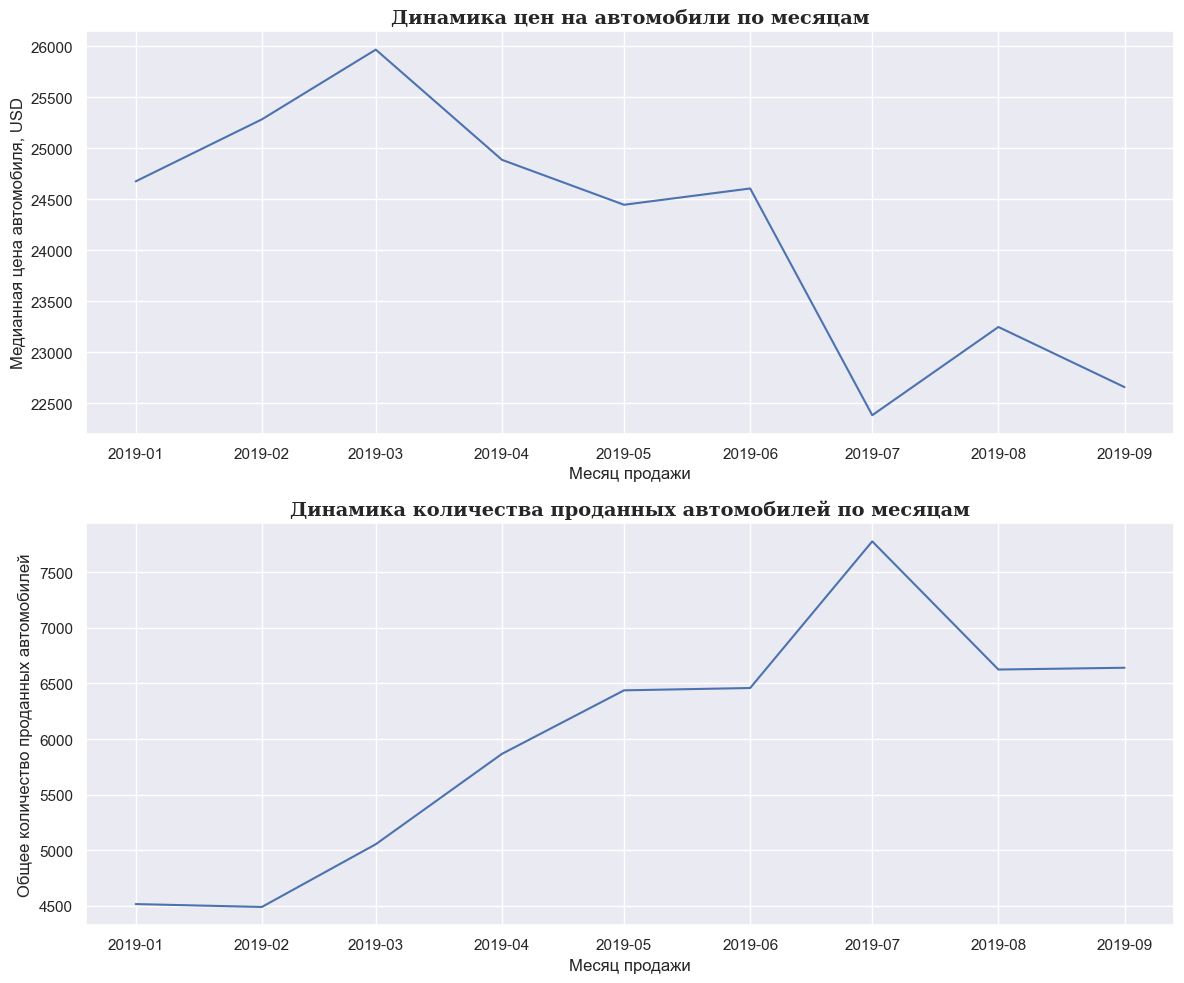

In [139]:
# создаем фигуру с двумя графиками для динамики цен и количества продаж по месяцам
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# График динамики цен на автомобили по месяцам
sns.lineplot(x='sale_date', y='price_usd', data=df, estimator='median', ci=None, ax=axs[0])
axs[0].set_title('Динамика цен на автомобили по месяцам', font={'weight':'bold', 'size': '14', 'family':'serif'})
axs[0].set_xlabel('Месяц продажи')
axs[0].set_ylabel('Медианная цена автомобиля, USD')

# График динамики количества проданных автомобилей по месяцам
sns.lineplot(x='sale_date', y='quantity', data=df, estimator='sum', ci=None, ax=axs[1])
axs[1].set_title('Динамика количества проданных автомобилей по месяцам', font={'weight':'bold', 'size': '14', 'family':'serif'})
axs[1].set_xlabel('Месяц продажи')
axs[1].set_ylabel('Общее количество проданных автомобилей')

plt.tight_layout()
plt.show()

**В июле 2019 года автомобильный рынок Казахстана переживал рост за счет увеличения спроса на новые автомобили и автозапчасти, а также государственной поддержки и инвестиций в отрасль. Именно поэтому медианная цена для покупателей снизилась до 22000 долларов в июле, что обеспечило общее количество проданных автомобилей в июле 2019 года на планке более 7500 автомобилей**

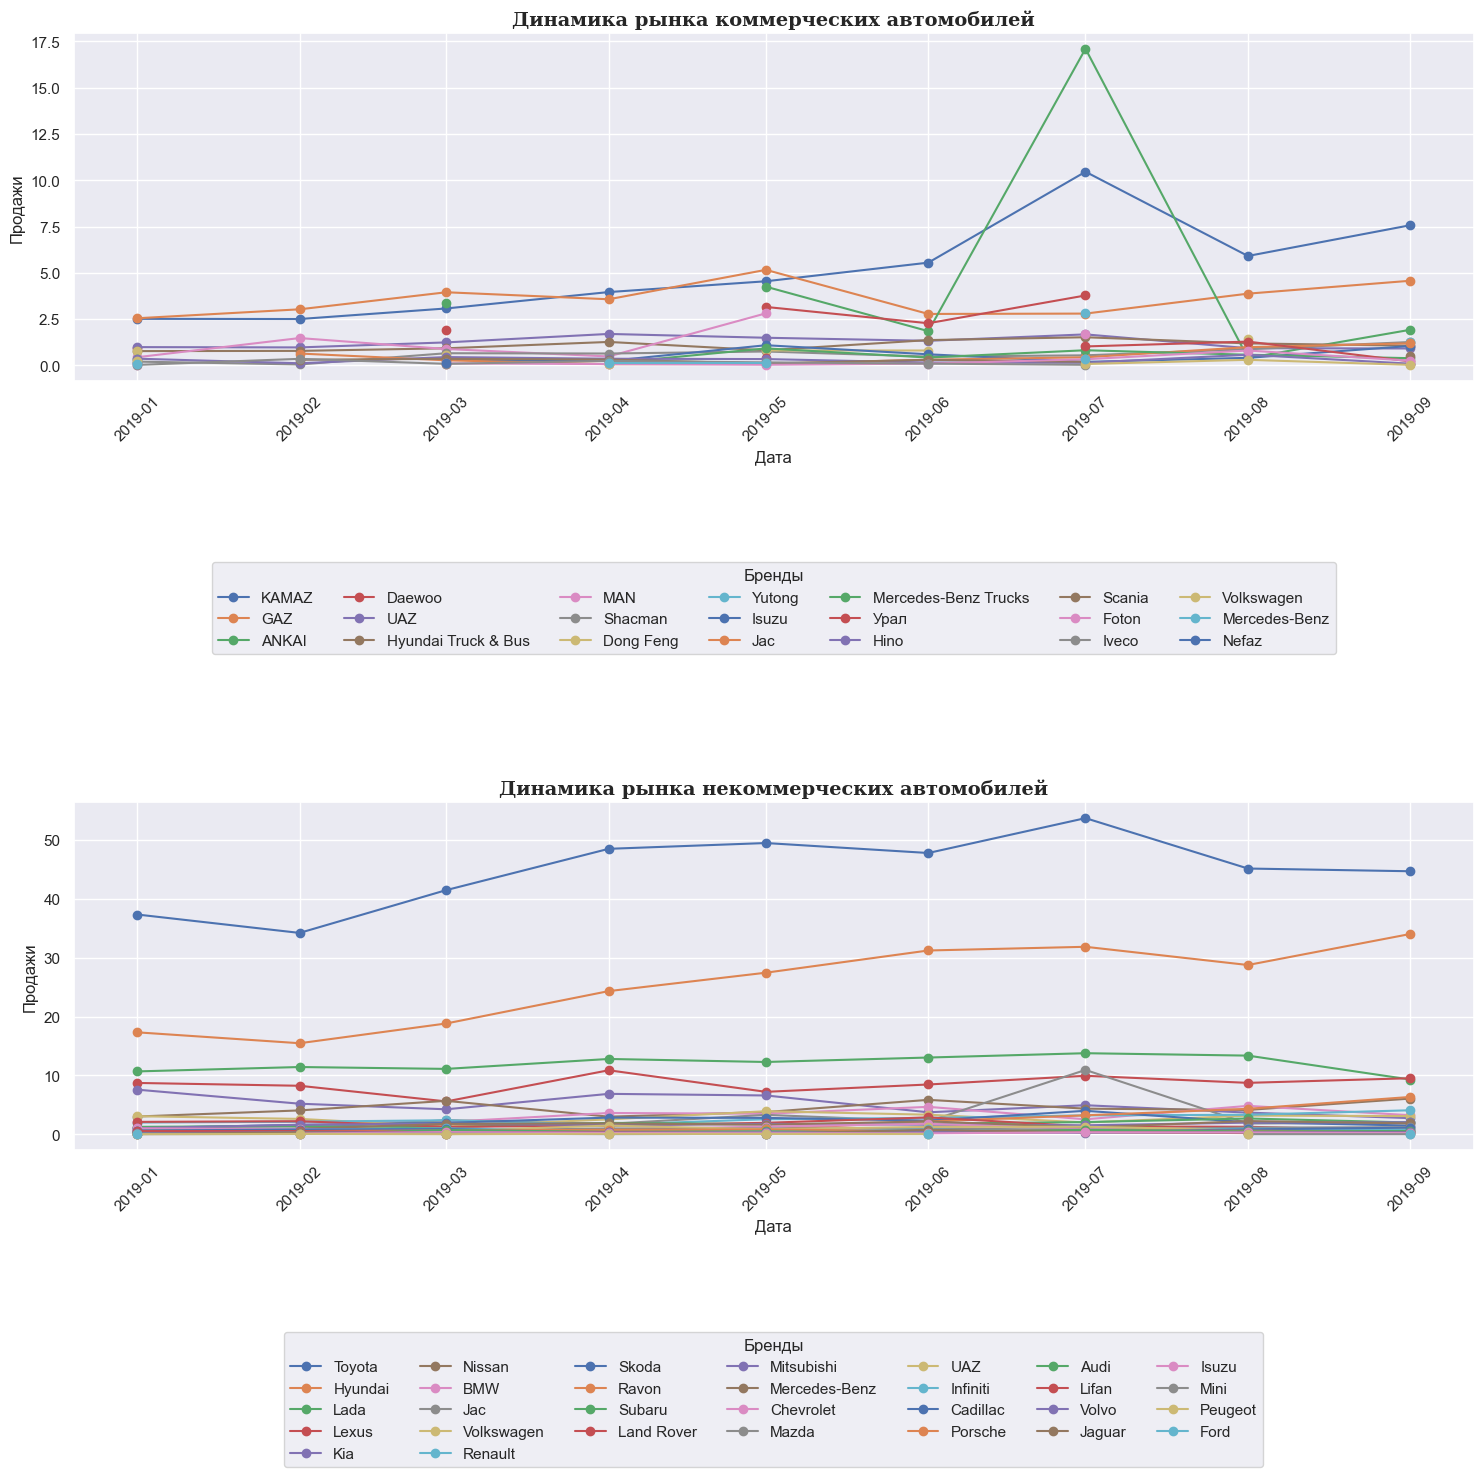

In [140]:
# сгруппируем данные по маркам и сегментам
com = df.loc[df['segment_2013'] == "Коммерческие автомобили"].groupby(['sale_date', 'brand'])['sell_price_usd'].sum()
not_com = df.loc[df['segment_2013'] != "Коммерческие автомобили"].groupby(['sale_date', 'brand'])['sell_price_usd'].sum()

# сортируем бренды по суммарному объему продаж
com_sorted = com.groupby('brand').sum().sort_values(ascending=False).index
not_com_sorted = not_com.groupby('brand').sum().sort_values(ascending=False).index

# построим графики для динамики рынка по сегментам
plt.figure(figsize=(15, 16))

plt.subplot(2, 1, 1)
for brand in com_sorted:
    plt.plot(com.unstack()[brand], marker='o', label=brand)
plt.title('Динамика рынка коммерческих автомобилей', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Продажи')
plt.legend(title='Бренды', bbox_to_anchor=(0.5, -0.5), loc='upper center', ncol=7) 

plt.subplot(2, 1, 2)
for brand in not_com_sorted:
    plt.plot(not_com.unstack()[brand], marker='o', label=brand)
plt.title('Динамика рынка некоммерческих автомобилей', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Продажи')
plt.legend(title='Бренды', bbox_to_anchor=(0.5, -0.5), loc='upper center', ncol=7) 

plt.tight_layout()
plt.show()

**Из графика динамики рынка коммерческих автомобилей следует:**
* Пик продаж пришелся на автобусы бренда ANKAI - около 17,5 млн долларов
* На втором месте КАМАЗ - 10 млн долларов

**Из графика динамики рынка некоммерческих автомобилей следует:**
* Покупатели автомобилей из Казахстана наиболее доверяют автобренду Японии TOYOTA - продажи находятся в диапазоне 35 - 51 млн долларов с пиком в июле 2019 года
* Hyundai также в числе фаворитов для покупателей автомобилей из Казахстана - продажи находятся в диапазоне 15 - 31 млн долларов с пиком в сентябре 2019 года
* Замыкает тройку лидеров по продажам Российский бренд ЛАДА - продажи находятся в диапазоне 10 млн долларов явного пика продаж не наблюдается

**Динамика рынка коммерческих автомобилей и некоммерческих автомобилей в зависимости от привода автомобилей**

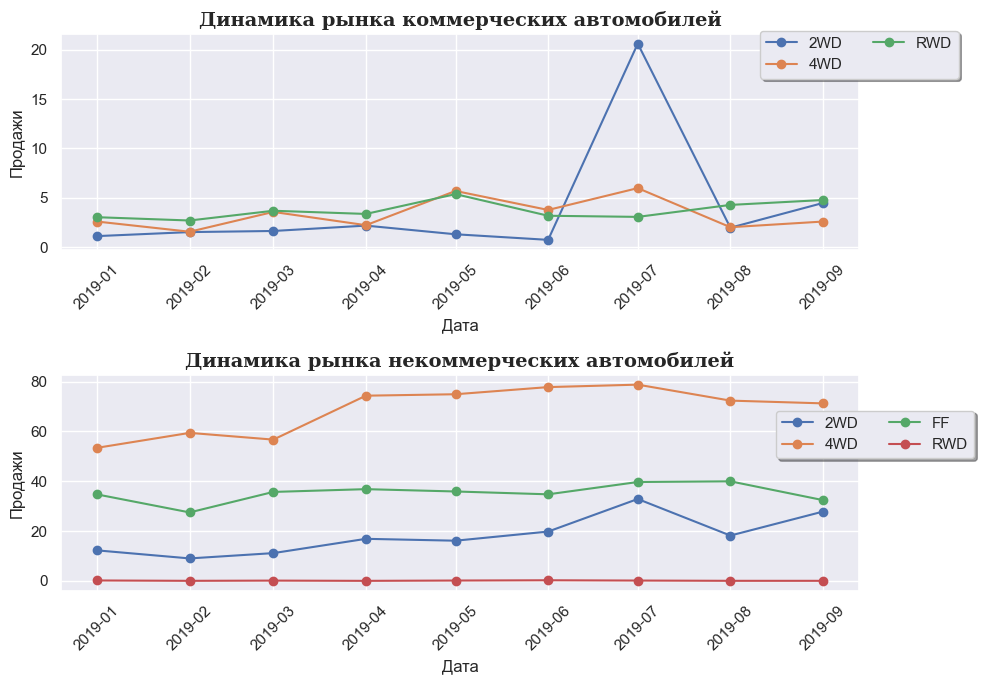

In [141]:
com = df.loc[(df['segment_2013'] == "Коммерческие автомобили") & (df['drive_type'] != "unknown")].groupby(['sale_date', 'drive_type'])['sell_price_usd'].sum()
not_com = df.loc[(df['segment_2013'] != "Коммерческие автомобили") & (df['drive_type'] != "unknown")].groupby(['sale_date', 'drive_type'])['sell_price_usd'].sum()

# построим графики для динамики рынка по сегментам
plt.figure(figsize=(10, 7))

plt.subplot(2, 1, 1)
for brand in com.unstack().columns:
    plt.plot(com.unstack()[brand], marker='o', label=brand)
plt.title('Динамика рынка коммерческих автомобилей', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Продажи')
plt.legend(loc='upper center', bbox_to_anchor=(1, 1.05), shadow=True, ncol=2)

plt.subplot(2, 1, 2)
for brand in not_com.unstack().columns:
    plt.plot(not_com.unstack()[brand], marker='o', label=brand)
plt.title('Динамика рынка некоммерческих автомобилей', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Продажи')
plt.legend(loc='upper center', bbox_to_anchor=(1.02, 0.87), shadow=True, ncol=2)

plt.tight_layout()
plt.show()


**Из графика динамики рынка коммерческих автомобилей следует вывод, что переднеприводные автомобили коммерсантов не интересуют**
**Из графика динамики рынка некоммерческих автомобилей следует вывод, что покупателей автомобилей из Казахстана больше всего интересуют полноприводные автомобили, затем переднеприводные автомобили, заднеприводними автомобилями покупатели не интересуются**

**Динамика рынка коммерческих автомобилей и некоммерческих автомобилей в зависимости от КПП**

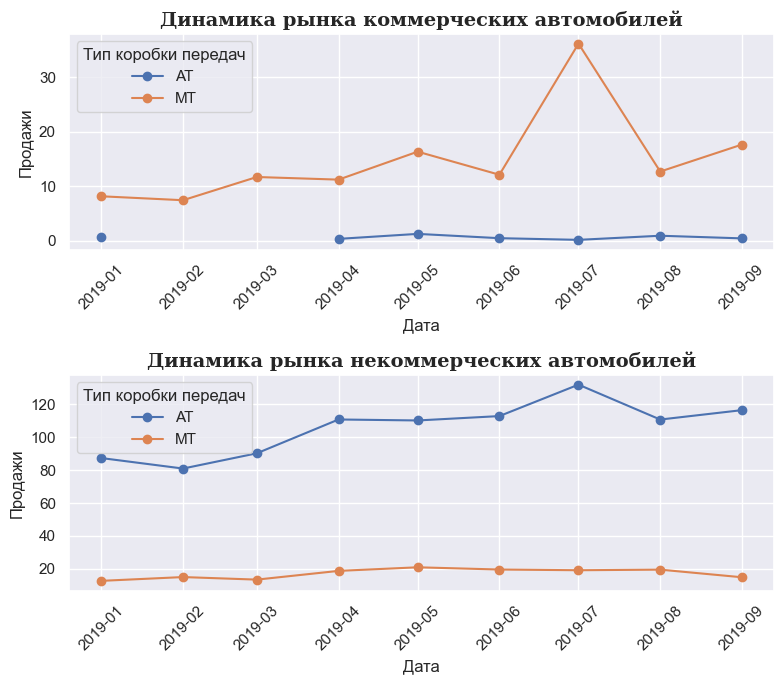

In [142]:
com = df.loc[(df['segment_2013'] == "Коммерческие автомобили") & (df.transmission_type != 'unknown')].groupby(['sale_date', 'transmission_type'])['sell_price_usd'].sum()
not_com = df.loc[(df['segment_2013'] != "Коммерческие автомобили") & (df.transmission_type != 'unknown')].groupby(['sale_date', 'transmission_type'])['sell_price_usd'].sum()

# построим графики для динамики рынка по сегментам
plt.figure(figsize=(8, 7))

plt.subplot(2, 1, 1)
for brand in com.unstack().columns:
    plt.plot(com.unstack()[brand], marker='o', label=brand)
plt.title('Динамика рынка коммерческих автомобилей', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Продажи')
plt.legend(title='Тип коробки передач')

plt.subplot(2, 1, 2)
for brand in not_com.unstack().columns:
    plt.plot(not_com.unstack()[brand], marker='o', label=brand)
plt.title('Динамика рынка некоммерческих автомобилей', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Продажи')
plt.legend(title='Тип коробки передач')

plt.tight_layout()
plt.show()

**Коммерсанты предпочитают автомобили с механической коробкой предач. Некоммерческие покупатели предпочитают авто с автоматической коробкой передач**

**Динамика рынка коммерческих автомобилей и некоммерческих автомобилей в зависимости от категории объема двигателя**

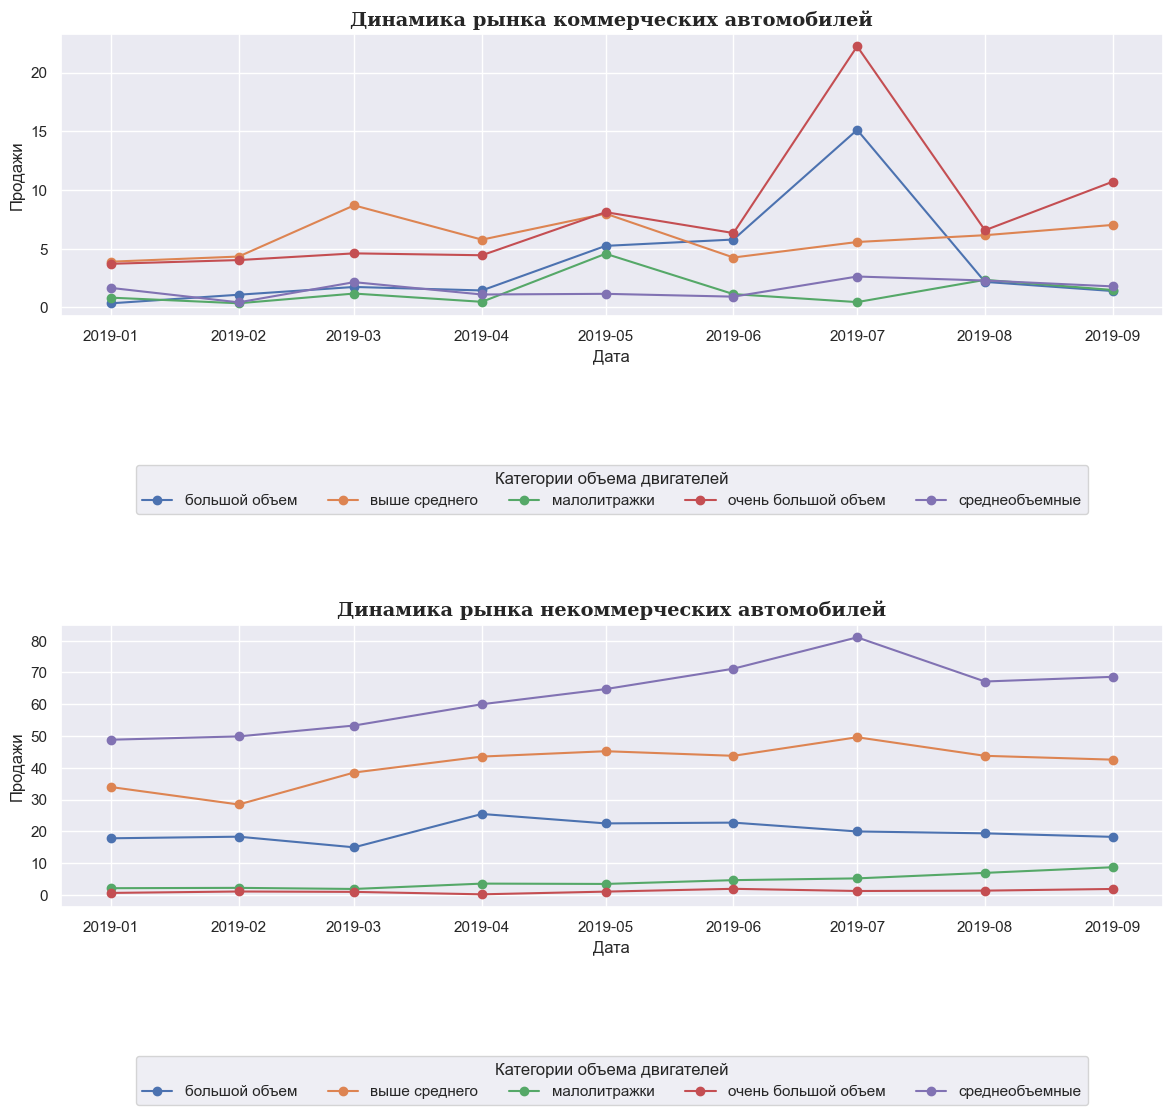

In [143]:
com = df.loc[(df['segment_2013'] == "Коммерческие автомобили")].groupby(['sale_date', 'cat_fuel_type'])['sell_price_usd'].sum()
not_com = df.loc[(df['segment_2013'] != "Коммерческие автомобили")].groupby(['sale_date', 'cat_fuel_type'])['sell_price_usd'].sum()

# построим графики для динамики рынка по сегментам
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
for brand in com.unstack().columns:
    plt.plot(com.unstack()[brand], marker='o', label=brand)
plt.title('Динамика рынка коммерческих автомобилей', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend(title='Категории объема двигателей', bbox_to_anchor=(0.5, -0.5), loc='upper center', ncol=5)

plt.subplot(2, 1, 2)
for brand in not_com.unstack().columns:
    plt.plot(not_com.unstack()[brand], marker='o', label=brand)
plt.title('Динамика рынка некоммерческих автомобилей', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend(title='Категории объема двигателей', bbox_to_anchor=(0.5, -0.5), loc='upper center', ncol=5)

plt.tight_layout()
plt.show()

**Коммерсанты предпочитают автомобили с очень большим объёмом и большим обемом двигателей от 6,7 до 13 литров**  
**Обычные некоммерческие покупатели предпочитают автомобили среднеобъёмные, затем с объёмом двигателя выше среднего и с большим объемом. Малолитражки и авто с очень большим объемом двигателя некоммерческие покупатели предпочитают крайне редко**

**Динамика рынка коммерческих автомобилей и некоммерческих автомобилей в зависимости от категории объема двигателя**

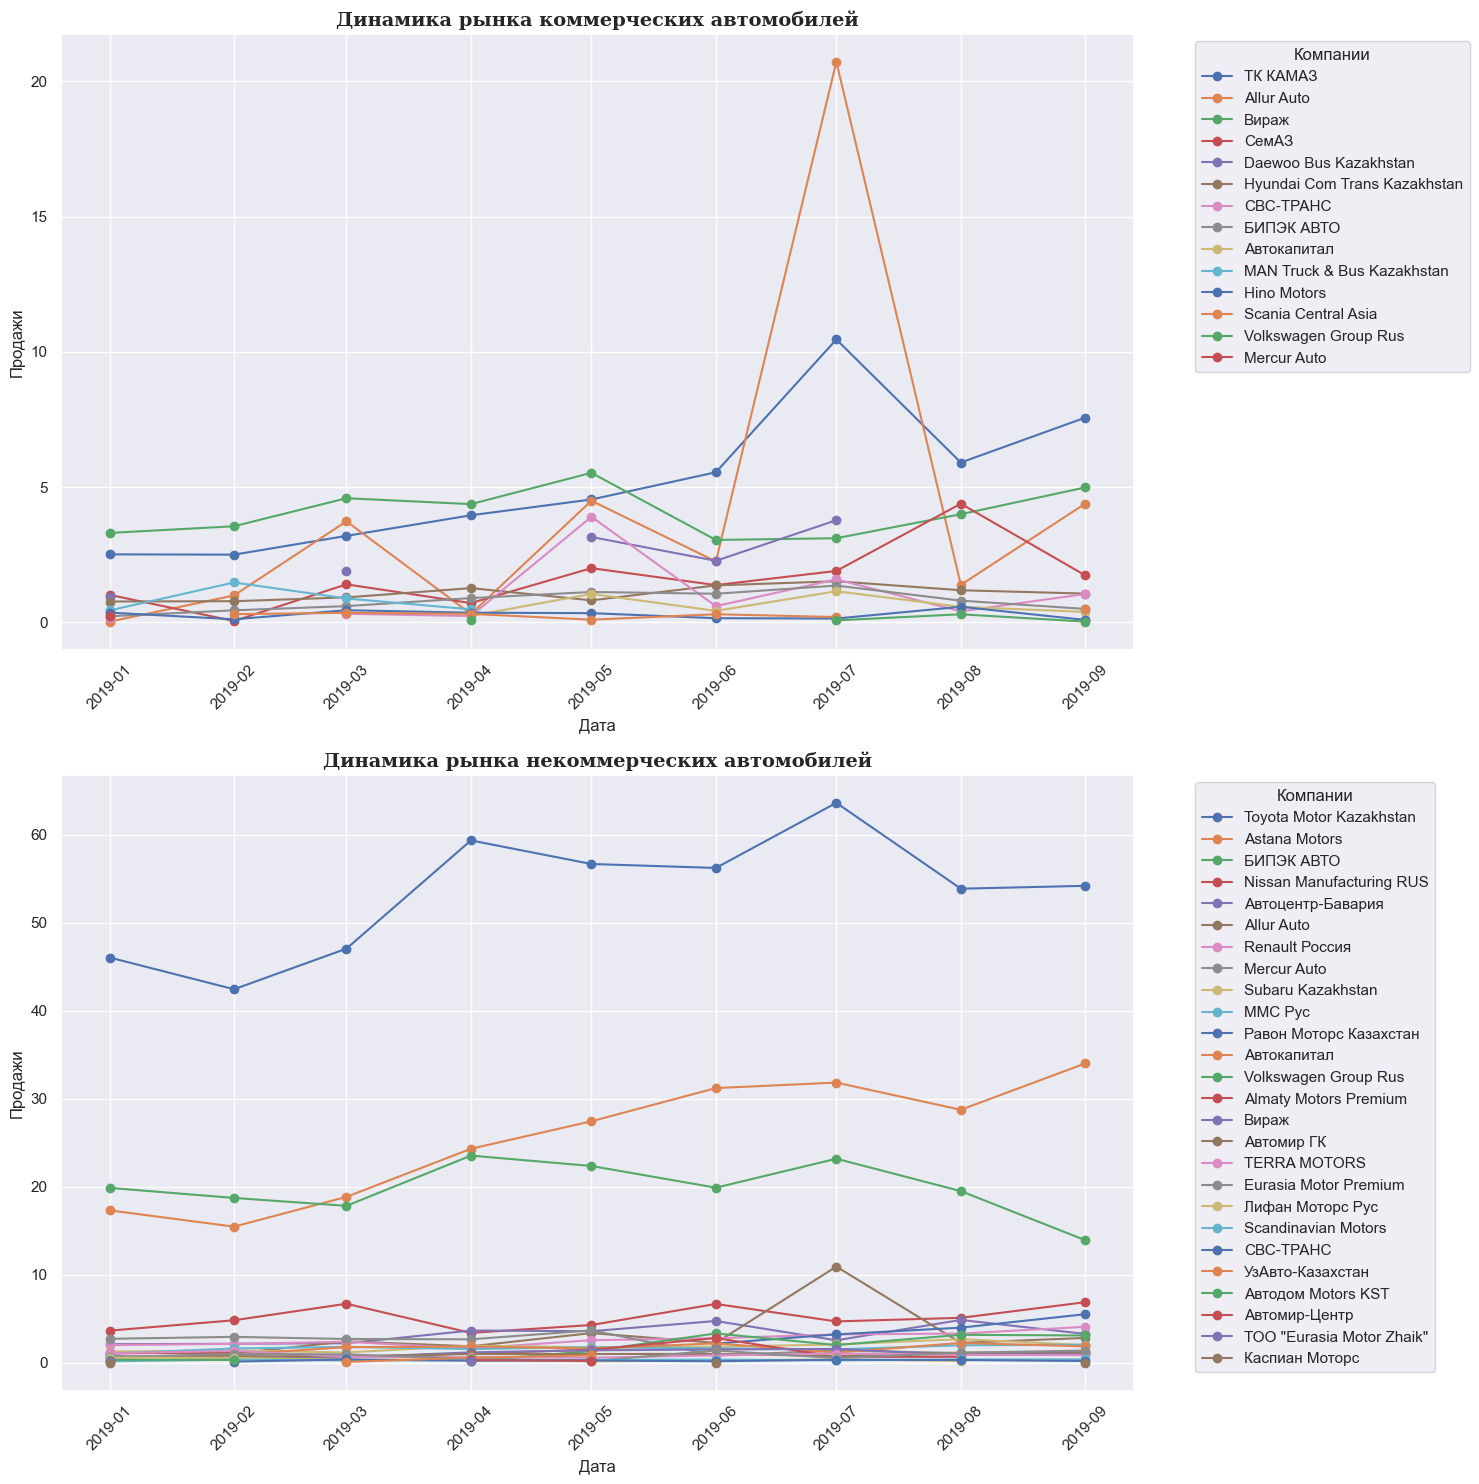

In [144]:
com = df.loc[(df['segment_2013'] == "Коммерческие автомобили")].groupby(['sale_date', 'company'])['sell_price_usd'].sum()
not_com = df.loc[(df['segment_2013'] != "Коммерческие автомобили")].groupby(['sale_date', 'company'])['sell_price_usd'].sum()

# сортируем бренды по суммарному объему продаж
com_sorted = com.groupby('company').sum().sort_values(ascending=False).index
not_com_sorted = not_com.groupby('company').sum().sort_values(ascending=False).index

# построим графики для динамики рынка по сегментам
plt.figure(figsize=(15, 15))

plt.subplot(2, 1, 1)
for brand in com_sorted:
    plt.plot(com.unstack()[brand], marker='o', label=brand)
plt.title('Динамика рынка коммерческих автомобилей', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Продажи')
plt.legend(title='Компании', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.subplot(2, 1, 2)
for brand in not_com_sorted:
    plt.plot(not_com.unstack()[brand], marker='o', label=brand)
plt.title('Динамика рынка некоммерческих автомобилей', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Продажи')
plt.legend(title='Компании', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()

plt.show()

**Из графика динамика рынка коммерческих автомобилей видно, что в июле 2019 года пик объема продаж автомоблей был у компаний ТК КАМАЗ и Allur Auto**  
**Из графика динамика рынка некоммерческих автомобилей видно, что наибольший объем продаж автомоблей за рассматриваемый период был у компаний Тойота Мотор Казахстан, Астана Моторс, Бипэк Авто и Ниссан Мануфекчуринг Рус**

**Динамика рынка коммерческих автомобилей и некоммерческих автомобилей в зависимости от типа топлива**

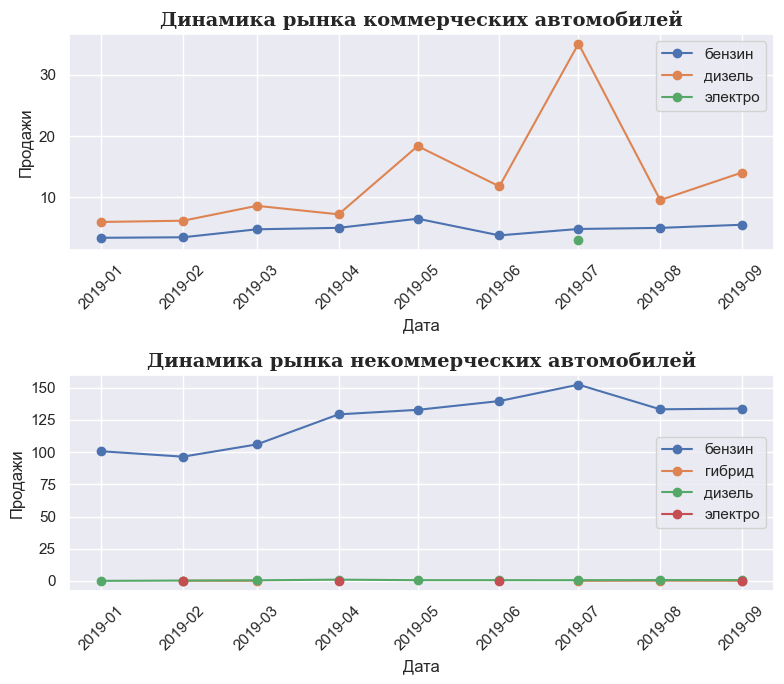

In [145]:
com = df.loc[(df['segment_2013'] == "Коммерческие автомобили") & (df['fuel_type'] != "unknown")].groupby(['sale_date', 'fuel_type'])['sell_price_usd'].sum()
not_com = df.loc[(df['segment_2013'] != "Коммерческие автомобили") & (df['fuel_type'] != "unknown")].groupby(['sale_date', 'fuel_type'])['sell_price_usd'].sum()

# построим графики динамики рынка по сегментам
plt.figure(figsize=(8, 7))

plt.subplot(2, 1, 1)
for brand in com.unstack().columns:
    plt.plot(com.unstack()[brand], marker='o', label=brand)
plt.title('Динамика рынка коммерческих автомобилей', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Продажи')
plt.legend()

plt.subplot(2, 1, 2)
for brand in not_com.unstack().columns:
    plt.plot(not_com.unstack()[brand], marker='o', label=brand)
plt.title('Динамика рынка некоммерческих автомобилей', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Продажи')
plt.legend()

plt.tight_layout()
plt.show()

**Коммерсанты предпочитают автомобили с дизельным типом топлива. В то время как некоммерческие покупатели предпочитают автомобили с бензиновым типом топлива.**

**Продажи автомобилей в разрезе бренд / сегмент**

<Figure size 1400x800 with 0 Axes>

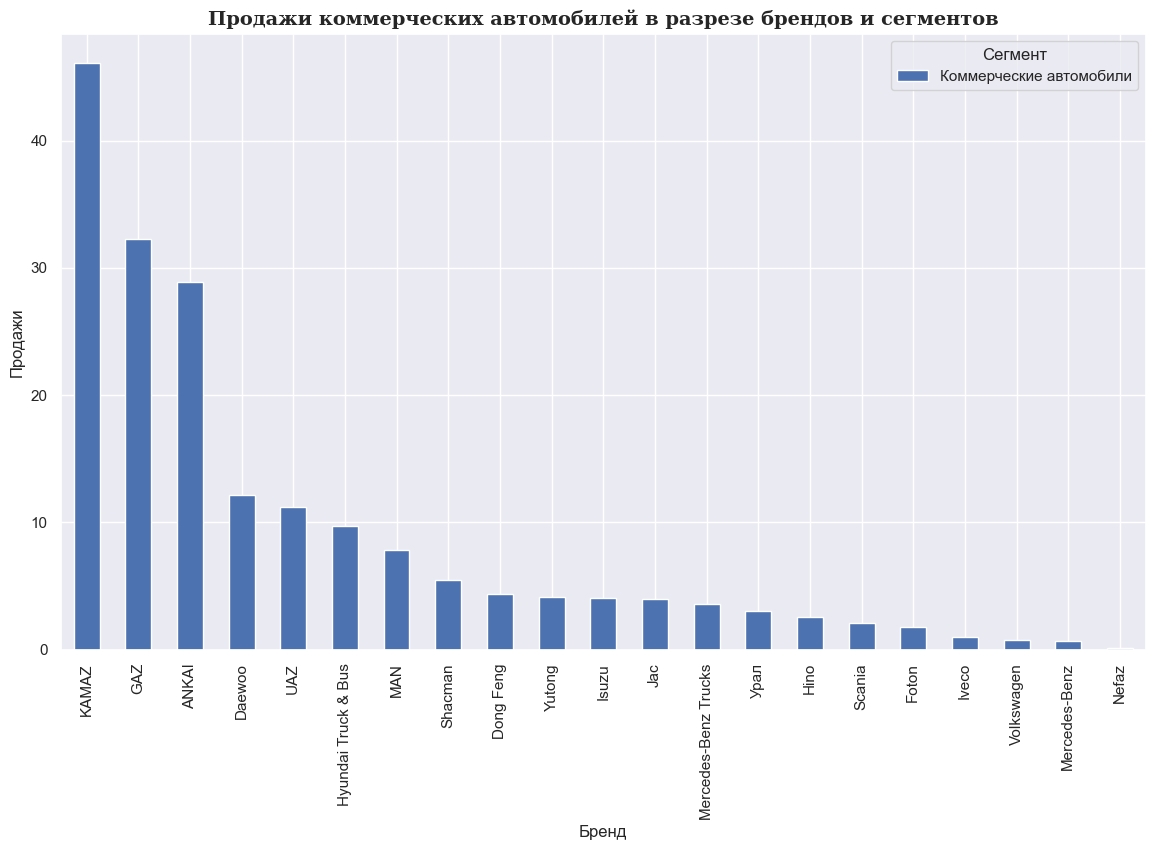

<Figure size 1400x800 with 0 Axes>

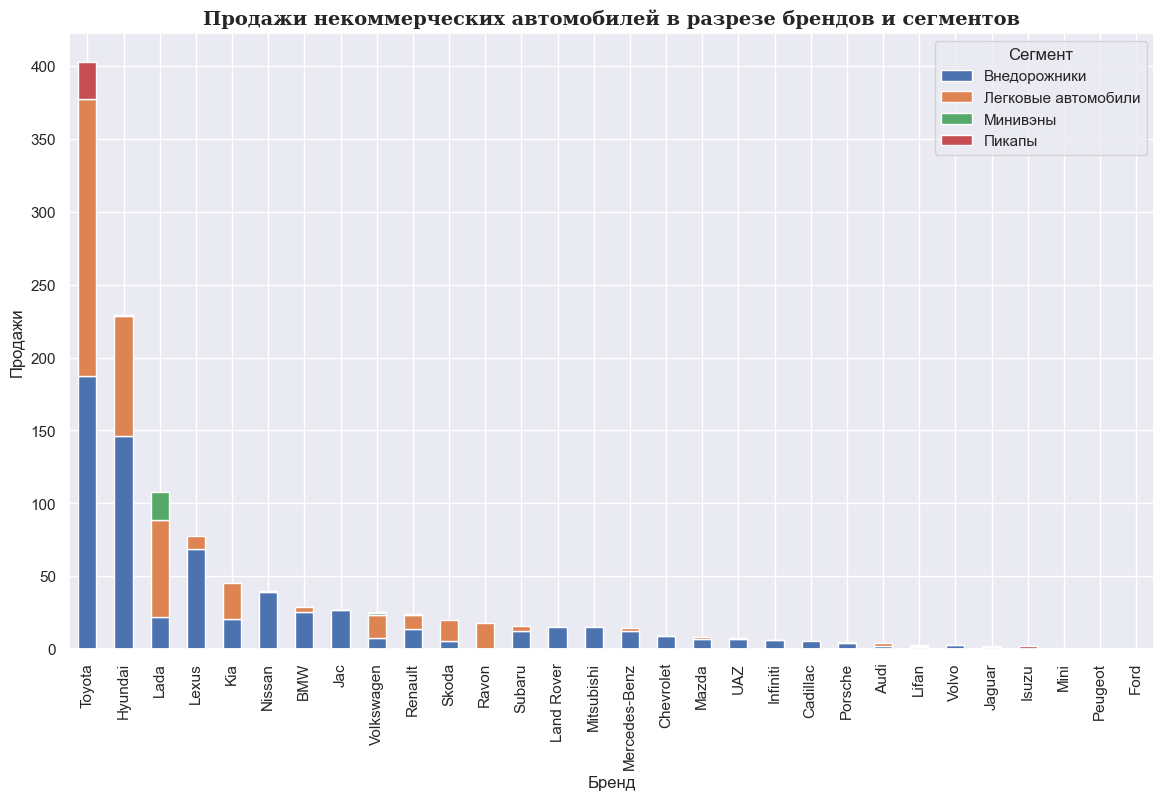

In [146]:
# сгруппируем данные по маркам и сегментам
com = df[df['segment_2013'] == "Коммерческие автомобили"]
not_com = df[df['segment_2013'] != "Коммерческие автомобили"]

# подготовка данных для анализа продаж по брендам и сегментам для коммерческих автомобилей
sales_by_brand_segment_c = com.groupby(['brand', 'segment_2013'])['sell_price_usd'].sum().sort_values(ascending=False).unstack()

# построение столбчатой диаграммы для коммерческих автомобилей
plt.figure(figsize=(14, 8))
sales_by_brand_segment_c.sort_values(by='Коммерческие автомобили', ascending=False).plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Продажи коммерческих автомобилей в разрезе брендов и сегментов', font={'weight':'bold', 'size': '14', 'family':'serif'})
plt.xlabel('Бренд')
plt.ylabel('Продажи')
plt.legend(title='Сегмент')
plt.xticks(rotation=90)
plt.show()

# подготовка данных для анализа продаж по брендам и сегментам для некоммерческих автомобилей
sales_by_brand_segment_nc = not_com.groupby(['brand', 'segment_2013'])['sell_price_usd'].sum().unstack()

 # создаем столбец с общей суммой по каждому бренду
sales_by_brand_segment_nc['total'] = sales_by_brand_segment_nc.sum(axis=1) 
sales_by_brand_segment_nc = sales_by_brand_segment_nc.sort_values('total', ascending=False).drop('total', axis=1)

# построение столбчатой диаграммы для некоммерческих автомобилей
plt.figure(figsize=(14, 8))
sales_by_brand_segment_nc.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Продажи некоммерческих автомобилей в разрезе брендов и сегментов', font={'weight':'bold', 'size':14, 'family':'serif'})
plt.xlabel('Бренд')
plt.legend(title='Сегмент')
plt.ylabel('Продажи')

plt.xticks(rotation=90)
plt.show()

**Из графика продаж коммерческих автомобилей в разрезе брендов и сегментов видно следующее:**
* Лидером общего объема продаж коммерческих автомобилей является КАМАЗ - 45 млн долларов
* 2 место по общему объему продаж коммерческих автомобилей у бренда ГАЗ - около 32 млн долларов
* 3 место рейтинга у бренда автобусов Ankai - 29 млн долларов

**Из графика продаж некоммерческих автомобилей в разрезе брендов и сегментов видно следующее:**
* Лидером общего объема продаж некоммерческих автомобилей является Тойота - 400 млн долларов, наблюдаем следующие сегменты:
  * внедорожники - 200 млн долларов, около 180 млн долларов - легковые авто, пикапы - около 20 млн долларов
* 2 место по общему объему продаж некоммерческих автомобилей у бренда Hyundai - около 230 млн долларов, наблюдаем следующие сегменты:
  * внедорожники - около 150 млн долларов, легковые автомобили - около 80 млн долларов, 1-2 млн долларов - минивэны
* 3 место рейтинга у бренда Лада - немногим более 100 млн долларов, с превуалирующим сегментом легковых автомобилей около 60 млн долларов

**Продажи по маркам**

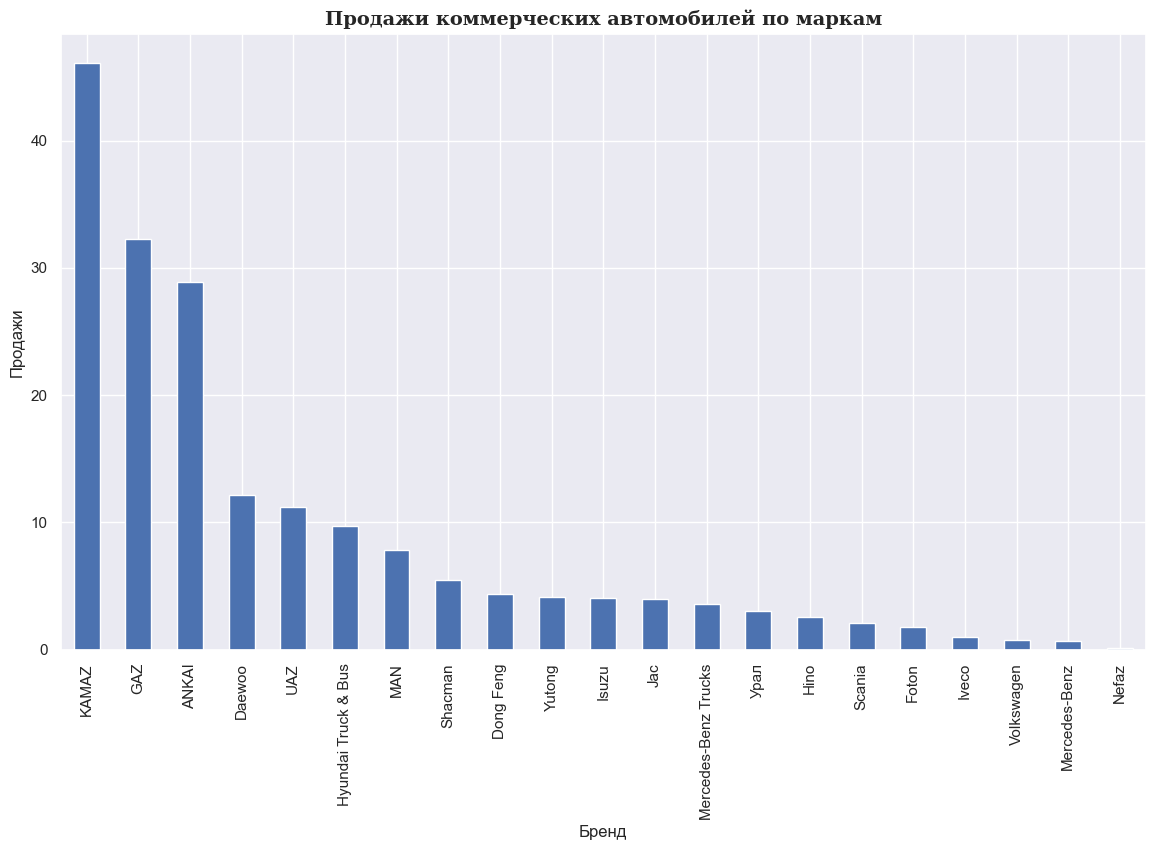

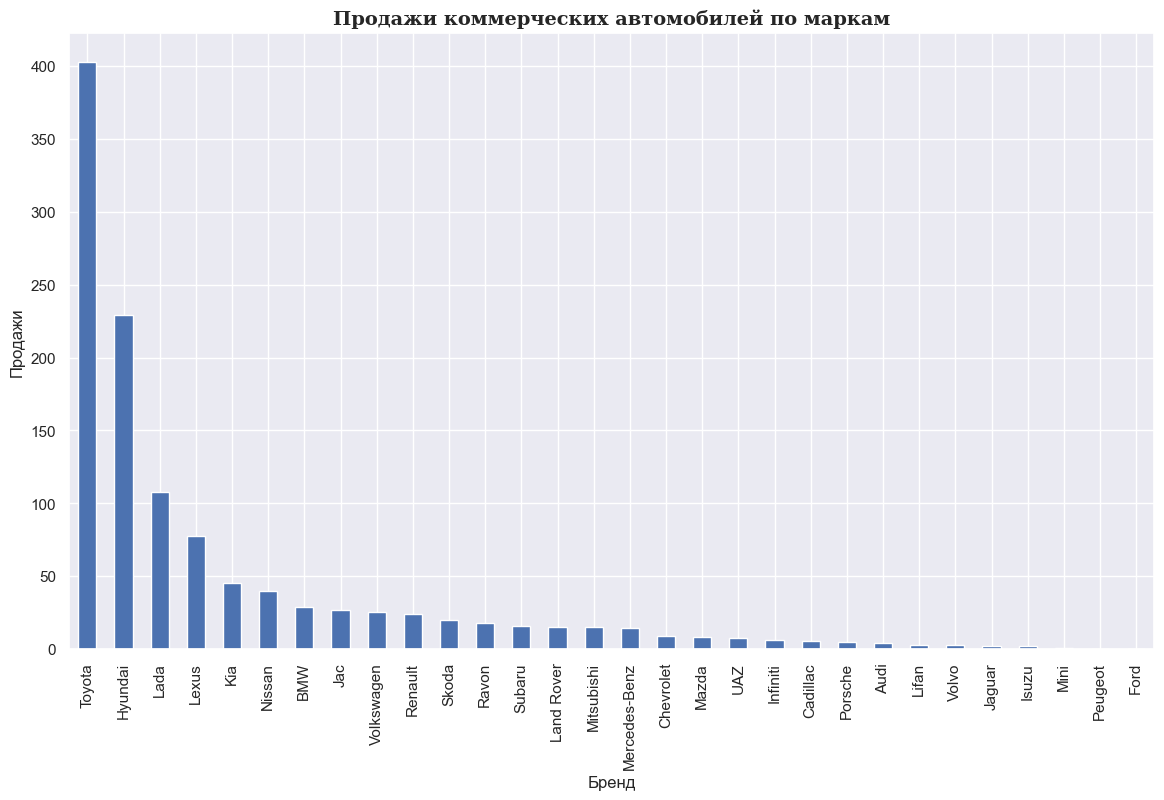

In [147]:
# продажи по маркам автомобилей
sales_by_brand_с = com.groupby('brand')['sell_price_usd'].sum().sort_values(ascending=False)

# построение столбчатой диаграммы для коммерческих автомобилей
plt.figure(figsize=(14, 8))
sales_by_brand_с.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Продажи коммерческих автомобилей по маркам', font={'weight':'bold', 'size':14, 'family':'serif'})
plt.xlabel('Бренд')
plt.ylabel('Продажи')
plt.xticks(rotation=90)
plt.show()

# продажи по маркам автомобилей
sales_by_brand_nс = not_com.groupby('brand')['sell_price_usd'].sum().sort_values(ascending=False)

# построение столбчатой диаграммы для коммерческих автомобилей
plt.figure(figsize=(14, 8))
sales_by_brand_nс.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Продажи коммерческих автомобилей по маркам', font={'weight':'bold', 'size':14, 'family':'serif'})
plt.xlabel('Бренд')
plt.ylabel('Продажи')
plt.xticks(rotation=90)
plt.show()

**Продажи по регионам**

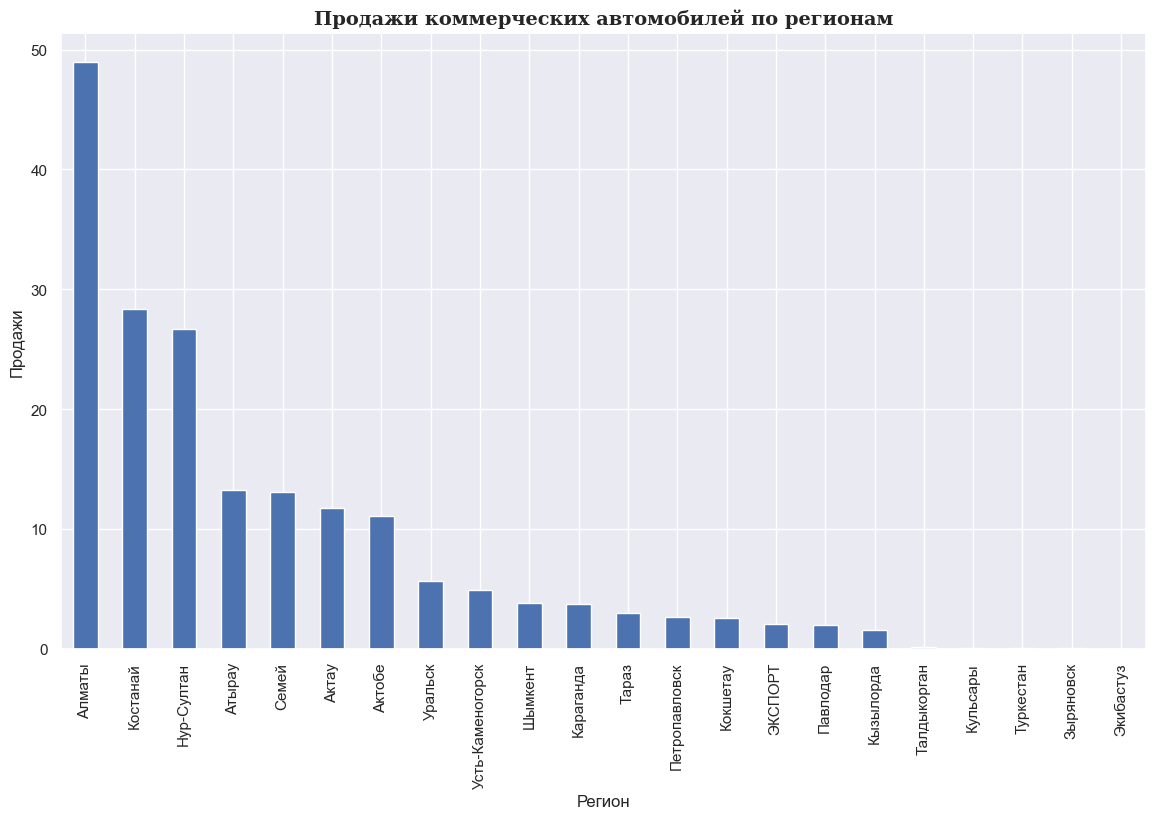

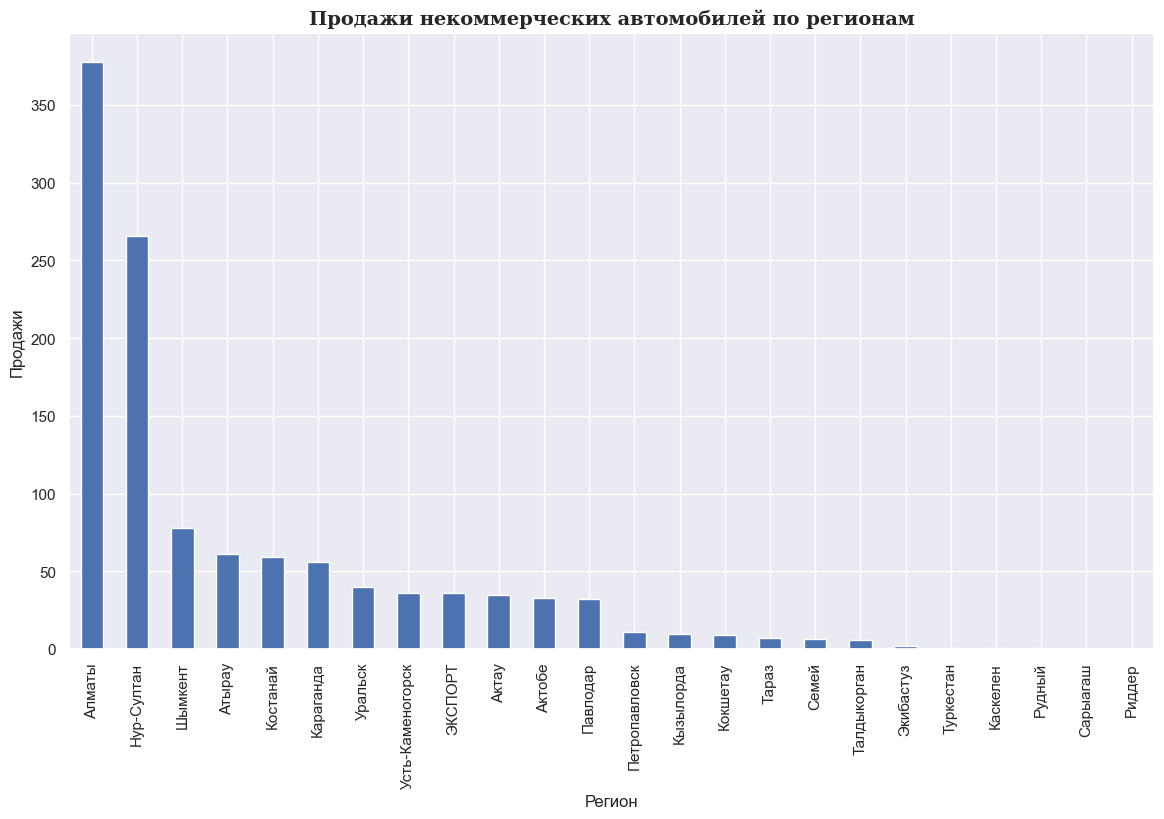

In [148]:
# продажи по регионам
sales_by_region_c = com.groupby('region')['sell_price_usd'].sum().sort_values(ascending=False)

# построение графика для коммерческих автомобилей
plt.figure(figsize=(14, 8))
sales_by_region_c.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Продажи коммерческих автомобилей по регионам', font={'weight':'bold', 'size':14, 'family':'serif'})
plt.xlabel('Регион')
plt.ylabel('Продажи')
plt.xticks(rotation=90)
plt.show()

# продажи по по регионам
sales_by_brand_nс = not_com.groupby('region')['sell_price_usd'].sum().sort_values(ascending=False)

# построение графика для некоммерческих автомобилей
plt.figure(figsize=(14, 8))
sales_by_brand_nс.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Продажи некоммерческих автомобилей по регионам', font={'weight':'bold', 'size':14, 'family':'serif'})
plt.xlabel('Регион')
plt.ylabel('Продажи')
plt.xticks(rotation=90)
plt.show()

**Из графика продаж коммерческих автомобилей по регионам получается следующий топ регионов и городов:**
* Алматы - около 50 млн долларов
* Кастанай и Нур-Султан около 30 млн долларов
* Атырау и Семей - 12 млн долларов
* Актау и Актобе - 11 млн долларов
* У остальных регионов от 5 млн долларов и менее

**Из графика продаж некоммерческих автомобилей по регионам получается следующий топ регионов и городов:**
* Алматы - 375 млн долларов
* Нур-Султан - 260 млн долларов
* Шыкмент - 75 млн долларов
* По остальным городам от 60 млн долларов и менее

**Проверить гипотезу: средняя стоимость автомобиля зависит от уровня развития региона (средней заработной платы по региону)**

                             state  average_salary_usd  price_usd
0   Восточно-Казахстанская область              421.67   22882.06
1    Западно-Казахстанская область              478.18   25119.13
2             Костанайская область              379.31   24864.98
3             Павлодарская область              417.74   23490.59
4       Южно-Казахстанская область              286.66   25102.67
5            Мангистауская область              764.66   24848.51
6               Атырауская область              912.87   25681.91
7              Актюбинская область              407.15   27137.78
8           Карагандинская область              447.82   23930.49
9     Северо-Казахстанская область              338.61   18369.45
10             Акмолинская область              364.71   16960.79
11          Кызылординская область              395.42   16593.84
12              Жамбылская область              330.31   16962.42
13           Туркестанская область              322.02   41976.48
14        

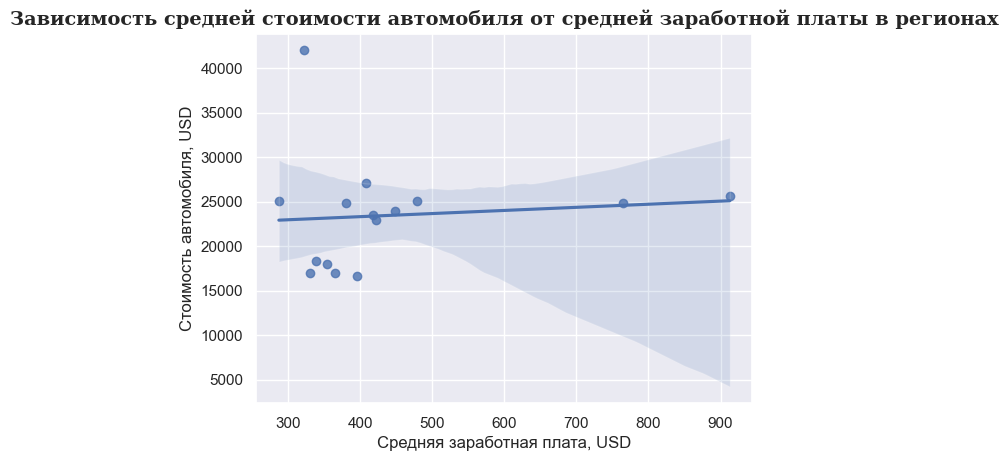

Коэффициент корреляции между средней заработной платой и средней стоимостью автомобиля: 0.09452586780502667


In [149]:
# создаем словарь средней заработной платы
salary_dict = {
    'state': ["Алматы", "Нур-Султан", "Восточно-Казахстанская область", "Западно-Казахстанская область",
               "Костанайская область", "Павлодарская область", "Южно-Казахстанская область",
               "Мангистауская область", "Атырауская область", "Актюбинская область",
               "Карагандинская область", "Северо-Казахстанская область", "Акмолинская область",
               "Кызылординская область", "Жамбылская область", "Туркестанская область", "Алматинская область"],
    'average_salary_tenge': [224158, 226796, 162182, 183914, 145890, 160670, 110254, 294099, 351103,
                                156595, 172239, 130233, 140272, 152085, 127043, 123853, 136212]
}

# создаем датафрейм из словаря
df_salary = pd.DataFrame(salary_dict)
# переведем тенге в доллары по курсу 2019 года
df_salary['average_salary_usd'] = df_salary['average_salary_tenge'] * 0.0026
del df_salary['average_salary_tenge']

commerc = df.loc[(df['segment_2013'] != "Коммерческие автомобили")]
commerc = commerc.groupby('state')['price_usd'].mean()

# объединяем данные по региону
combined_df = df_salary.merge(commerc, left_on='state', right_on='state')
print(combined_df)

# визуализация данных
sns.regplot(x='average_salary_usd', y='price_usd', data=combined_df)
plt.xlabel('Средняя заработная плата, USD')
plt.ylabel('Стоимость автомобиля, USD')
plt.title('Зависимость средней стоимости автомобиля от средней заработной платы в регионах', font={'weight':'bold', 'size':14, 'family':'serif'})
plt.show()

# корреляция
correlation = combined_df['average_salary_usd'].corr(combined_df['price_usd'])
print(f"Коэффициент корреляции между средней заработной платой и средней стоимостью автомобиля: {correlation}")

Коэффициент корреляции 0.095 близок к нулю, что указывает на очень слабую положительную линейную связь между средней заработной платой и стоимостью автомобиля в регионах.

Это означает, что изменения в средней заработной плате в регионах практически не влияют на стоимость автомобилей. В данном случае можно сказать, что нет явной зависимости между этими двумя переменными.

**Продажи автоцентров**

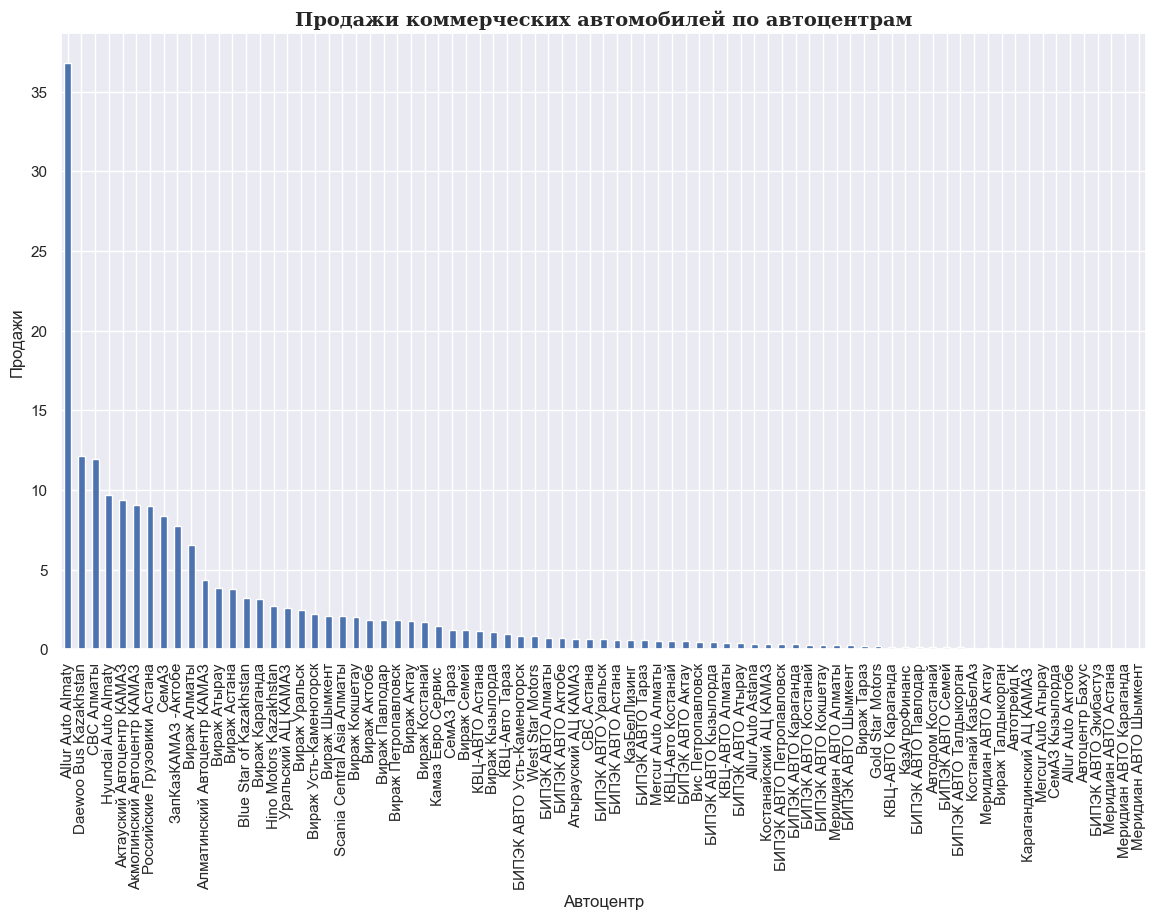

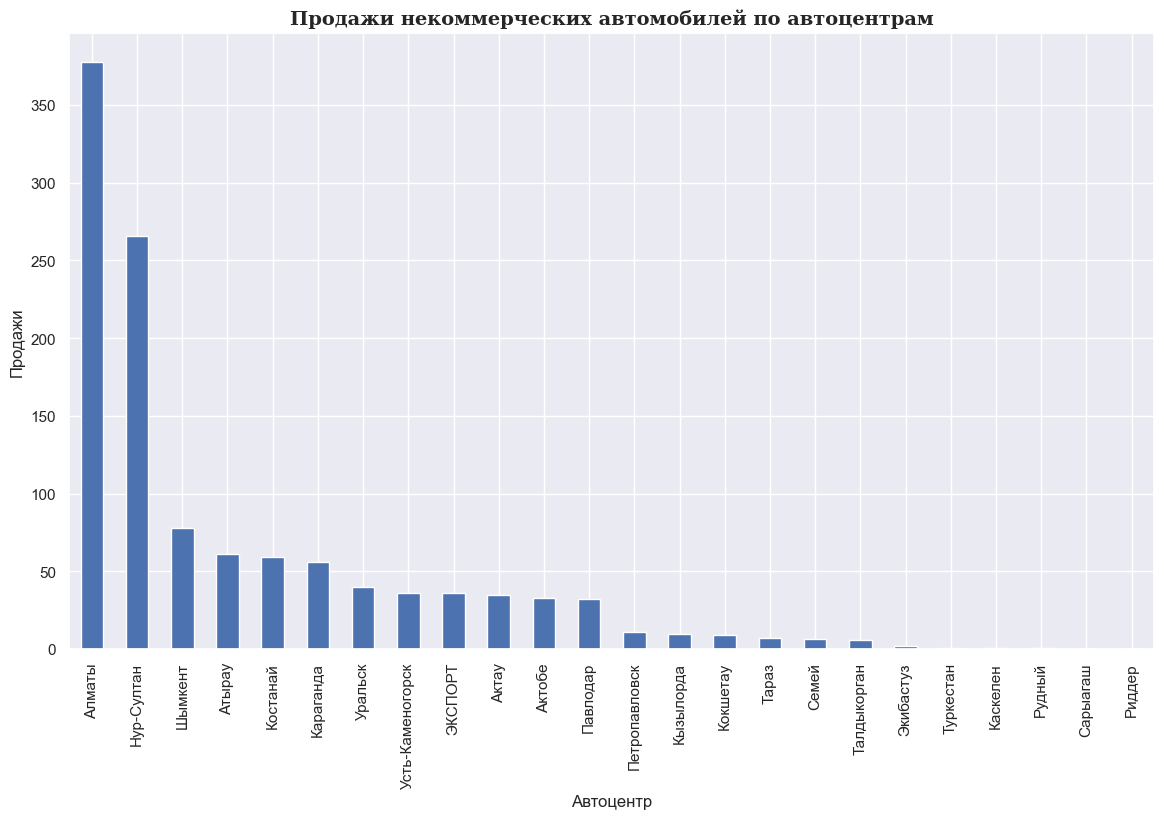

In [150]:
# продажи автоцентров
sales_by_dealer_c = com.groupby('dealer')['sell_price_usd'].sum().sort_values(ascending=False)

# построение графика для коммерческих автомобилей
plt.figure(figsize=(14, 8))
sales_by_dealer_c.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Продажи коммерческих автомобилей по автоцентрам', font={'weight':'bold', 'size':14, 'family':'serif'})
plt.xlabel('Автоцентр')
plt.ylabel('Продажи')
plt.xticks(rotation=90)
plt.show()

# продажи по регионам
sales_by_dealer_c = not_com.groupby('dealer')['sell_price_usd'].sum().sort_values(ascending=False)

# построение графика для некоммерческих автомобилей
plt.figure(figsize=(14, 8))
sales_by_brand_nс.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Продажи некоммерческих автомобилей по автоцентрам', font={'weight':'bold', 'size':14, 'family':'serif'})
plt.xlabel('Автоцентр')
plt.ylabel('Продажи')
plt.xticks(rotation=90)
plt.show()


**Из графика продаж коммерческих автомобилей по автоцентрам следует:**
* 1 место у Allure Auto Almaty - 37 млн долларов

**Из графика продаж некоммерческих автомобилей по автоцентрам следует:**
* 1 место у диллеров из города Алматы - 370 млн долларов
* 2 место у диллеров из города Нур-Султан - более 250 млн долларов

**Вывод по разделу анализ рынка Казахстана**
1. В денежном выражении физические лица потратили на покупку автомобилей больше, чем юридические лица, что указывает на значительный спрос со стороны частных лиц.

2. В количественном выражении количество приобретенных автомобилей примерно одинаково для физических и юридических лиц, что свидетельствует о широком распространении автомобилей как средства передвижения в обеих категориях покупателей.

3. Лидерами на рынке коммерческих автомобилей являются КАМАЗ, GAZ и ANKAI, а среди некоммерческих автомобилей - TOYOTA, Hyundai и Lada.

4. Анализ динамики цен показывает, что июль 2019 года был периодом наибольшего спроса на автомобили, что снизило цены для покупателей.

5. Некоммерческие покупатели предпочитают автомобили с автоматической коробкой передач, в то время как коммерсанты отдают предпочтение механической коробке передач.

6. Покупатели из Казахстана больше всего интересуются полноприводными автомобилями, а также автомобилями среднего и выше среднего объема двигателя.

7. В июле 2019 года произошел пик продаж автомобилей, особенно у компаний ТК КАМАЗ и Allur Auto.

8. Компании Тойота Мотор Казахстан, Астана Моторс, Бипэк Авто и Ниссан Мануфекчуринг Рус показали наибольший объем продаж некоммерческих автомобилей за рассматриваемый период.

9. В сегменте коммерческих автомобилей лидерами по объему продаж являются бренды КАМАЗ, ГАЗ и автобусов Ankai.

10. Среди некоммерческих автомобилей Тойота, Hyundai и Лада занимают лидирующие позиции по объему продаж.

11. Регионы с наибольшим объемом продаж коммерческих автомобилей: Алматы, Кастанай, Нур-Султан, Атырау и Семей.

12. Лидерами по продажам некоммерческих автомобилей являются Алматы, Нур-Султан и Шыкмент.

13. Коэффициент корреляции между средней заработной платой и стоимостью автомобилей в регионах близок к нулю, что указывает на отсутствие явной зависимости между этими переменными.

14. Автоцентры Allure Auto Almaty и дилеры из города Алматы показали наилучшие результаты по продажам коммерческих и некоммерческих автомобилей соответственно.

**Таким образом, анализ рынка автомобилей в Казахстане позволяет выделить лидеров по продажам, определить популярные бренды и сегменты, а также выявить регионы с наибольшим спросом на автомобили.**

# Анализ положения Меркур Авто

**Посмотрим положение Меркур Авто по отношению к конкурентам**

In [151]:
# группировка данных по компании
grouped_df = df.groupby('company').agg(sell_price_usd=('sell_price_usd', 'sum'), cnt=('quantity', 'sum')).reset_index()\
               .sort_values(by=['sell_price_usd', 'cnt'], ascending=False).head(10)
# расчет процентного соотношения от общей суммы продаж
grouped_df['%_sell_price_usd'] = (grouped_df['sell_price_usd'] / grouped_df['sell_price_usd'].sum() * 100)
# расчет процентного соотношения от общего количества продаж
grouped_df['%_cnt'] = (grouped_df['cnt'] / grouped_df['cnt'].sum() * 100)
# расчет рейтинга по выручке
grouped_df['рейтинг'] = round(grouped_df["%_sell_price_usd"].rank(ascending=False)).astype('int8')

grouped_df

company  sell_price_usd    cnt  %_sell_price_usd  %_cnt  \
15   Toyota Motor Kazakhstan          479.73  11947             40.90  24.71   
2              Astana Motors          229.34  10169             19.55  21.03   
22                БИПЭК АВТО          185.98  15131             15.86  31.30   
0                 Allur Auto           66.51   2636              5.67   5.45   
9   Nissan Manufacturing RUS           46.29   1760              3.95   3.64   
30                  ТК КАМАЗ           46.22    893              3.94   1.85   
23                     Вираж           46.12   2909              3.93   6.02   
21         Автоцентр-Бавария           29.22    454              2.49   0.94   
10            Renault Россия           24.18   1796              2.06   3.71   
8                Mercur Auto           19.36    650              1.65   1.34   

    рейтинг  
15        1  
2         2  
22        3  
0         4  
9         5  
30        6  
23        7  
21        8  
10        9  
8        10

Компания "Mercur Auto" занимает 10 место по объему продаж на автомобильном рынке Казахстана:
* Общая сумма продаж 19.36 млн долларов -  1,65% от всего автомобильного рынка Казахстана
* Общее количество проданных автомобилей 650 - 1,34% от всего автомобильного рынка Казахстана

После резкого падения продаж в июне и августе компания не смогла вернуть свои позиции. В июле компания продавала более дорогие автомобили, но количество продаж было низким.

**Посмотрим какие марки продавались в Меркур Авто на протяжении 2019 года**

In [152]:
merkur = df[df["company"] == "Mercur Auto"]
merkur.brand.value_counts()

brand
Volkswagen    539
Audi           52
Porsche        52
Name: count, dtype: int64

In [153]:
# группировка данных и агрегация
grouped_data = merkur.groupby(['brand', 'model']).agg(quantity=('quantity', 'sum'), sell_price_usd=('sell_price_usd', 'sum')).reset_index()
# расчет процентного соотношения от общей суммы продаж
grouped_data['perc_sell_price_usd'] = (grouped_data['sell_price_usd'] / grouped_data['sell_price_usd'].sum() * 100)
# расчет процентного соотношения от общего количества продаж
grouped_data['perc_cnt'] = (grouped_data['quantity'] / grouped_data['quantity'].sum() * 100)
# расчет рейтинга по выручке
grouped_data['рейтинг'] = round(grouped_data["perc_sell_price_usd"].rank(ascending=False)).astype('int8')
# сортировка по столбцу рейтинг от меньшего к большему
grouped_data = grouped_data.sort_values(by='рейтинг', ascending=True)
grouped_data

brand               model  quantity  sell_price_usd  \
16  Volkswagen                Polo       440            6.42   
10     Porsche             Cayenne        28            2.86   
18  Volkswagen              Tiguan        81            2.64   
7         Audi                  Q8        20            1.79   
12     Porsche            Panamera         8            1.08   
11     Porsche               Macan        15            1.02   
2         Audi                  A6         8            0.61   
4         Audi                  A8         5            0.56   
5         Audi                  Q5         8            0.43   
19  Volkswagen             Touareg         3            0.24   
6         Audi                  Q7         3            0.23   
17  Volkswagen            Teramont         4            0.22   
21  Volkswagen  Transporter Kasten         7            0.21   
15  Volkswagen            Multivan         3            0.21   
3         Audi                  A7         2            0.17   
9      Porsche       911 Carrera S         1            0.16   
8         Audi                 RS5         1            0.11   
1         Audi                  A4         3            0.10   
13  Volkswagen              Amarok         2            0.07   
20  Volkswagen         Transporter         2            0.07   
0         Audi                  A3         2            0.06   
14  Volkswagen               Jetta         3            0.05   
22  Volkswagen   Transporter Kombi         1            0.04   

    perc_sell_price_usd  perc_cnt  рейтинг  
16                33.16     67.69        1  
10                14.76      4.31        2  
18                13.65     12.46        3  
7                  9.26      3.08        4  
12                 5.58      1.23        5  
11                 5.25      2.31        6  
2                  3.14      1.23        7  
4                  2.88      0.77        8  
5                  2.24      1.23        9  
19                 1.25      0.46       10  
6                  1.20      0.46       11  
17                 1.12      0.62       12  
21                 1.11      1.08       13  
15                 1.09      0.46       14  
3                  0.88      0.31       15  
9                  0.84      0.15       16  
8                  0.55      0.15       17  
1                  0.50      0.46       18  
13                 0.38      0.31       19  
20                 0.38      0.31       20  
0                  0.31      0.31       21  
14                 0.28      0.46       22  
22                 0.19      0.15       23

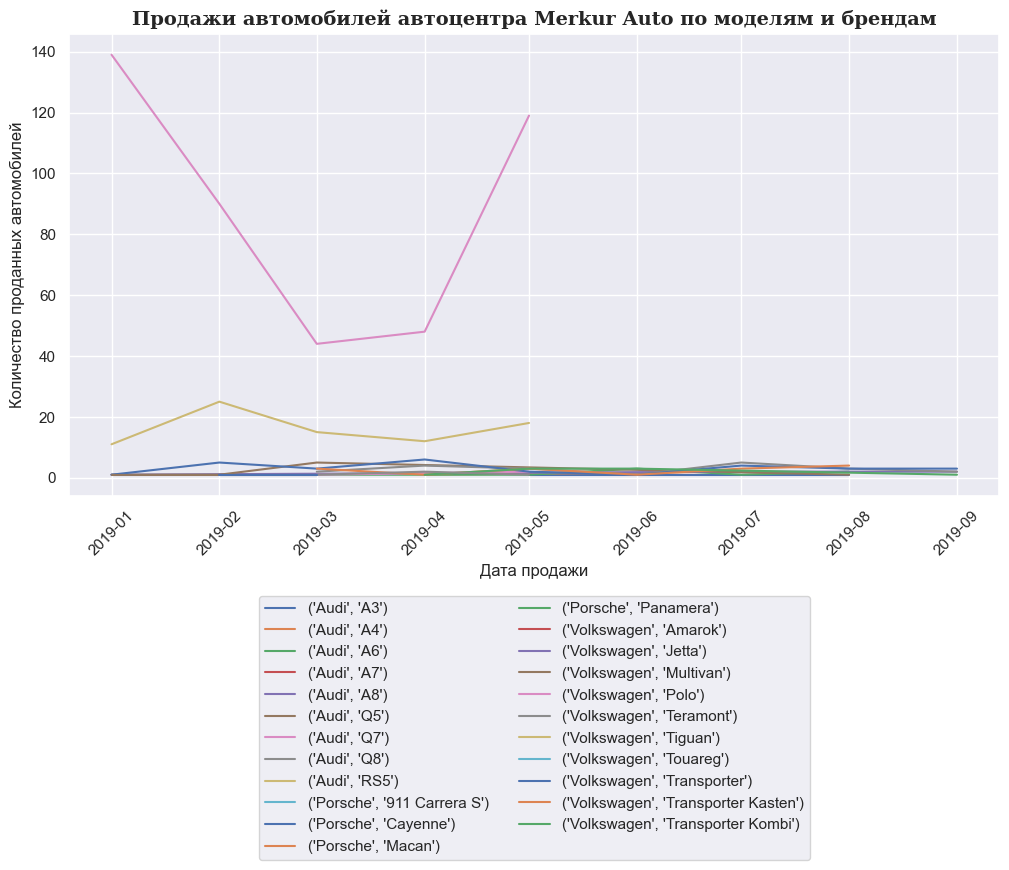

In [154]:
# группировка данных и агрегация
grouped_df = merkur.groupby(['brand', 'model', 'sale_date']).agg({'quantity': 'sum'}).reset_index()

# построение графика
plt.figure(figsize=(12, 6))
for brand_model, data in grouped_df.groupby(['brand', 'model']):
    plt.plot(data['sale_date'], data['quantity'], label=brand_model)

plt.xlabel('Дата продажи')
plt.ylabel('Количество проданных автомобилей')
plt.title('Продажи автомобилей автоцентра Merkur Auto по моделям и брендам', font={'weight':'bold', 'size':14, 'family':'serif'})
plt.grid(True)
plt.xticks(rotation=45)

# расположение легенды под графиком
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20), ncol=2)
plt.show()

**Увеличим график и оставим только те автомобили общее количество которых по бренду более 8 проданных шт**

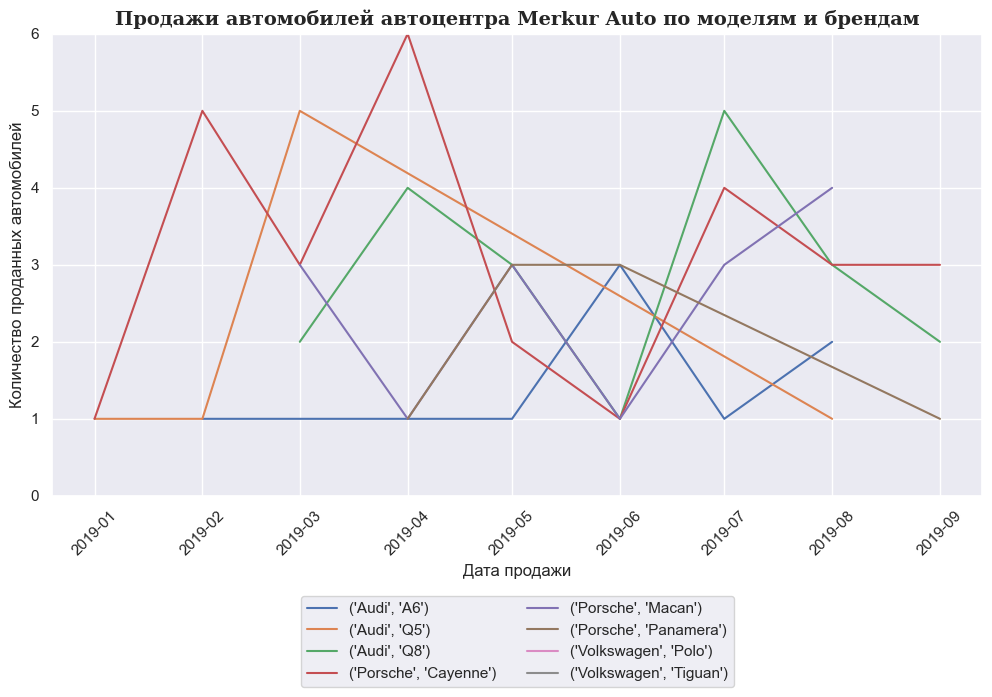

In [155]:
# группировка данных и агрегация
grouped_df = merkur.groupby(['brand', 'model', 'sale_date']).agg({'quantity': 'sum'}).reset_index()

# оставляем только данные, где общее количество проданных автомобилей больше или равно 8
filtered_grouped_df = grouped_df.groupby(['brand', 'model']).filter(lambda x: x['quantity'].sum() >= 8)

# построение графика
plt.figure(figsize=(12, 6))
for brand_model, data in filtered_grouped_df.groupby(['brand', 'model']):
    plt.plot(data['sale_date'], data['quantity'], label=brand_model)

plt.xlabel('Дата продажи')
plt.ylabel('Количество проданных автомобилей')
plt.title('Продажи автомобилей автоцентра Merkur Auto по моделям и брендам', font={'weight':'bold', 'size':14, 'family':'serif'})
plt.grid(True)
plt.xticks(rotation=45)
plt.ylim(0, 6)

# расположение легенды под графиком
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20), ncol=2)
plt.show()

In [156]:
# еще раз посмотрим на марки автомобилей, которые продавались в Меркур Авто на протяжении 2019 года и 
# общее количество которых по бренду более 8 проданных авто
grouped_data.head(9)

brand     model  quantity  sell_price_usd  perc_sell_price_usd  \
16  Volkswagen      Polo       440            6.42                33.16   
10     Porsche   Cayenne        28            2.86                14.76   
18  Volkswagen    Tiguan        81            2.64                13.65   
7         Audi        Q8        20            1.79                 9.26   
12     Porsche  Panamera         8            1.08                 5.58   
11     Porsche     Macan        15            1.02                 5.25   
2         Audi        A6         8            0.61                 3.14   
4         Audi        A8         5            0.56                 2.88   
5         Audi        Q5         8            0.43                 2.24   

    perc_cnt  рейтинг  
16     67.69        1  
10      4.31        2  
18     12.46        3  
7       3.08        4  
12      1.23        5  
11      2.31        6  
2       1.23        7  
4       0.77        8  
5       1.23        9

**Вывод по анализу положения `Меркур Авто`**

**Из представленных данных видно, что закат компании `Меркур Авто` произошел из-за того, что в июне перестали продавать автомобили:**
* `Фольксваген Поло`  
  *  Общая сумма продаж 6.42 млн долларов - 33,16% от всего объема продаж `Меркур Авто`  
  *  Общее количество проданных автомобилей 440 - 67,69% от всего автомобильного рынка `Меркур Авто`
* `Фольксваген Тигуан`  
  *  Общая сумма продаж 2.64 млн долларов - 13,65% от всего объема продаж `Меркур Авто`  
  *  Общее количество проданных автомобилей 81 - 12,46% от всего автомобильного рынка `Меркур Авто`
  
**После злополучного июня в августе пришла вторая волна кризиса, которая определила дальнейшую судьбу Меркур Авто:**
* `Порш Макан`  
  * Общая сумма продаж 1.02 млн долларов - 5,25% от всего объема продаж `Меркур Авто`   
  * Общее количество проданных автомобилей 15 - 2,31% от всего автомобильного рынка `Меркур Авто`  
* `Ауди А6`  
  * Общая сумма продаж 0.61 млн долларов - 3,14% от всего объема продаж `Меркур Авто`   
  * Общее количество проданных автомобилей 8 - 1,23% от всего автомобильного рынка `Меркур Авто` 
* `Ауди Q5`  
  * Общая сумма продаж 0.43 млн долларов - 2,24% от всего объема продаж `Меркур Авто`   
  * Общее количество проданных автомобилей 8 - 1,23% от всего автомобильного рынка `Меркур Авто`

# Общий вывод по проекту Анализ рынка автомобилей в Казахстане

Проект "Анализ рынка автомобилей в Казахстане" после проведения предобработки данных исследовании эволюции автомобильного рынка с 2019 года по сентябрь 2019 года привел к следующим ключевым выводам:

### Выводы после предобработки данных:

- Оценена информация в датасете на предмет пропусков и выполнены методы их заполнения.
- Столбцы приведены к корректному типу данных, что помогло оптимизировать вычислительные ресурсы и уменьшить время выполнения операций.
- Изменены названия значений на разных языках для согласованности данных.
- Проведено исследование уникальных значений, что помогло выявить и исправить некорректные записи.
- Добавлен столбец с категориями по объему двигателя для дальнейшего анализа.

### Выводы по исследовательскому анализу данных:

- Общее количество проданных автомобилей составляет 53870 штук, на сумму 1,349,016,452 USD.
- 33 бренда представлены на рынке, где большинство компаний многобрендовые.
- БИПЭК АВТО является лидером по количеству моделей, а КАМАЗ – по количеству моделей на бренд.
- Продажи растут с марта 2019 года, достигая пика в июле.
- Наиболее популярные двигатели имеют объем 2 литра.
- Средняя цена автомобиля составляет около 22,500 USD.
- Региональные предпочтения в приводе автомобилей различны.

### Выводы по разделу анализа рынка Казахстана:

- Физические лица тратят больше на автомобили, чем юридические лица.
- Лидеры на рынке коммерческих автомобилей – КАМАЗ, GAZ и ANKAI, а некоммерческих – TOYOTA, Hyundai и Lada.
- Июль 2019 года характеризовался наибольшим спросом на автомобили, что снизило их цены.
- Некоммерческие предпочитают автомобили с автоматической КП, в то время как коммерческие – с механической.

### Вывод по разделу анализ положения Меркур Авто

- Закат компании Меркур Авто произошел из-за того, что в июне перестали продавать автомобили `Фольксваген Поло` и `Фольксваген Тигуан` составляющих 46,81 процента от продаж данного диллера или 9,06 млн долларов. Последней каплей, которая отправила компанию в небытиё стало прекращение продаж `Порш Макан`, `Ауди А6` и `Ауди Q5` составляющих 10,63 процента от продаж данного диллера или 2,06 млн долларов. 

Анализ данных показал динамичность и разнообразие автомобильного рынка Казахстана, что может быть ценно для разработки маркетинговых стратегий и развития индустрии. Эти выводы могут быть полезны для дальнейшего планирования и принятия стратегических решений. 🚗📊💡🔍